# Aplicación de modelos de Machine Learning.

A continuación se aplicarán 2 modelos de ML a cada hipótesis para comprobarlas, se compararán los resultados y se verá cual predice o clasifica mejor los datos segpun corresponda.

Primero cargabos la base de datos:

In [1]:
import pandas as pd
df = pd.read_csv("c:/Users/velj0/Downloads/implementacion_ML.csv")

## *Hipótesis 1: Los tractos censales con menor ingreso medio presentan también menor nivel educativo alcanzado.*

### **1. Random Forest Regressor.**

<>:370: SyntaxWarning: invalid escape sequence '\P'
<>:370: SyntaxWarning: invalid escape sequence '\P'
C:\Users\velj0\AppData\Local\Temp\ipykernel_24716\3549308952.py:370: SyntaxWarning: invalid escape sequence '\P'
  print("\Para probar la relación ingreso-educación directamente:")


INICIANDO ANÁLISIS CORREGIDO DE HIPÓTESIS 1
HIPÓTESIS 1: Factores que afectan el Nivel Educativo


ANÁLISIS DE CORRELACIONES INICIAL:


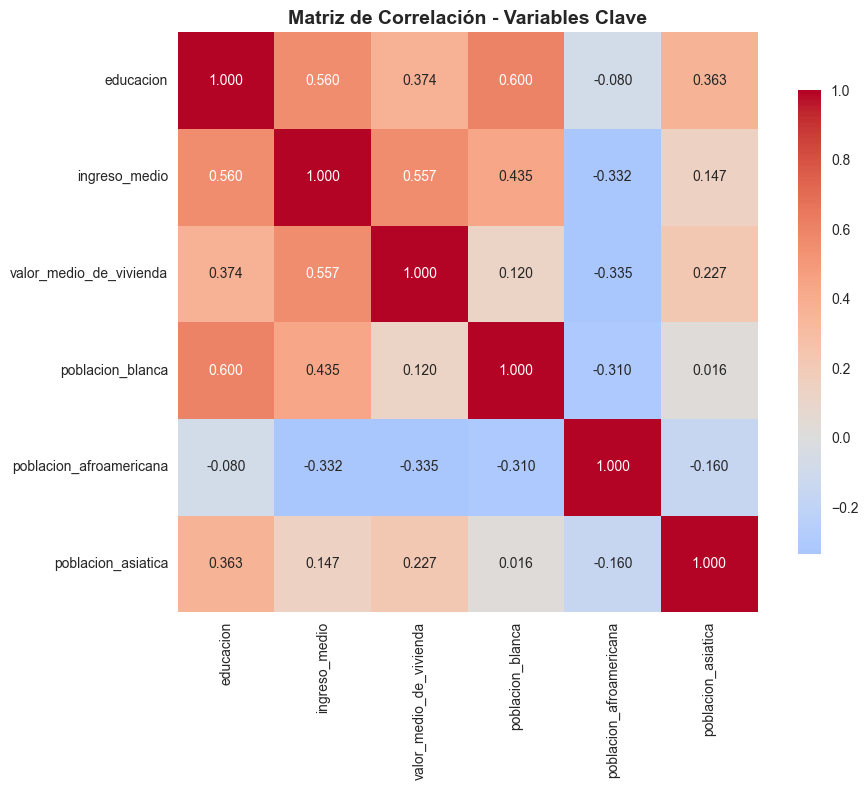

CORRELACIÓN INGRESO-EDUCACIÓN: 0.5597
Áreas metropolitanas codificadas: 5
Features seleccionadas: 7 variables
División train/test:
Train: 5612 muestras (80.0%)
Test:  1404 muestras (20.0%)
EVALUACIÓN COMPLETA DEL MODELO:

   R² Score:
   Test:  0.7307
   Train: 0.8295
   Diferencia: 0.0988 (ideal < 0.1)

 Métricas de Error:
   MSE:  244207.7969
   RMSE: 494.1739
   MAE:  340.1152
 BUENA GENERALIZACIÓN: Diferencia Train-Test aceptable

 VALIDACIÓN CRUZADA (k-fold, k=5):
R² Scores: ['0.7110', '0.6872', '0.7188', '0.7047', '0.7580']
R² Promedio: 0.7159 (+/- 0.0469)
MSE Promedio: 262975.3644

 ANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS:

                   Feature  Importancia Porcentaje
          poblacion_blanca     0.257400     25.74%
             ingreso_medio     0.243979     24.40%
           poblacion_total     0.219650     21.97%
        poblacion_asiatica     0.163079     16.31%
poblacion_hispana_o_latina     0.051347      5.13%
   poblacion_afroamericana     0.046626      4.66%
a

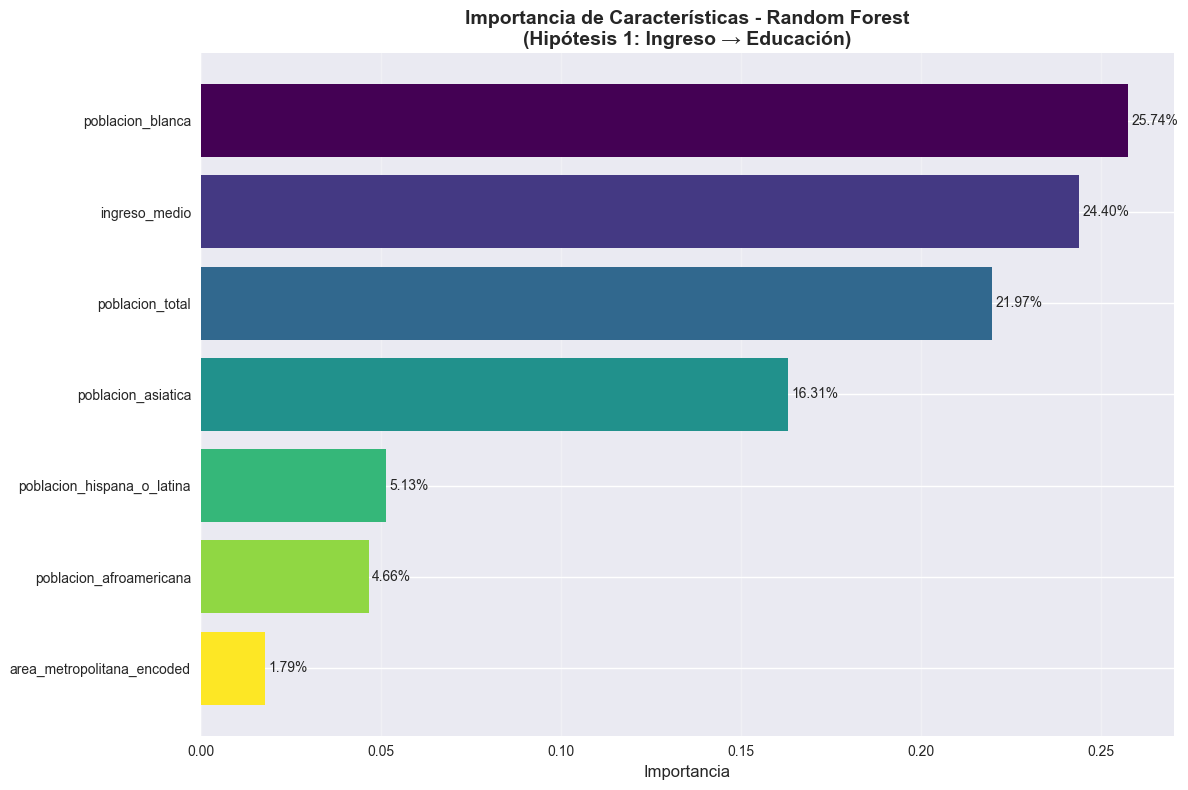

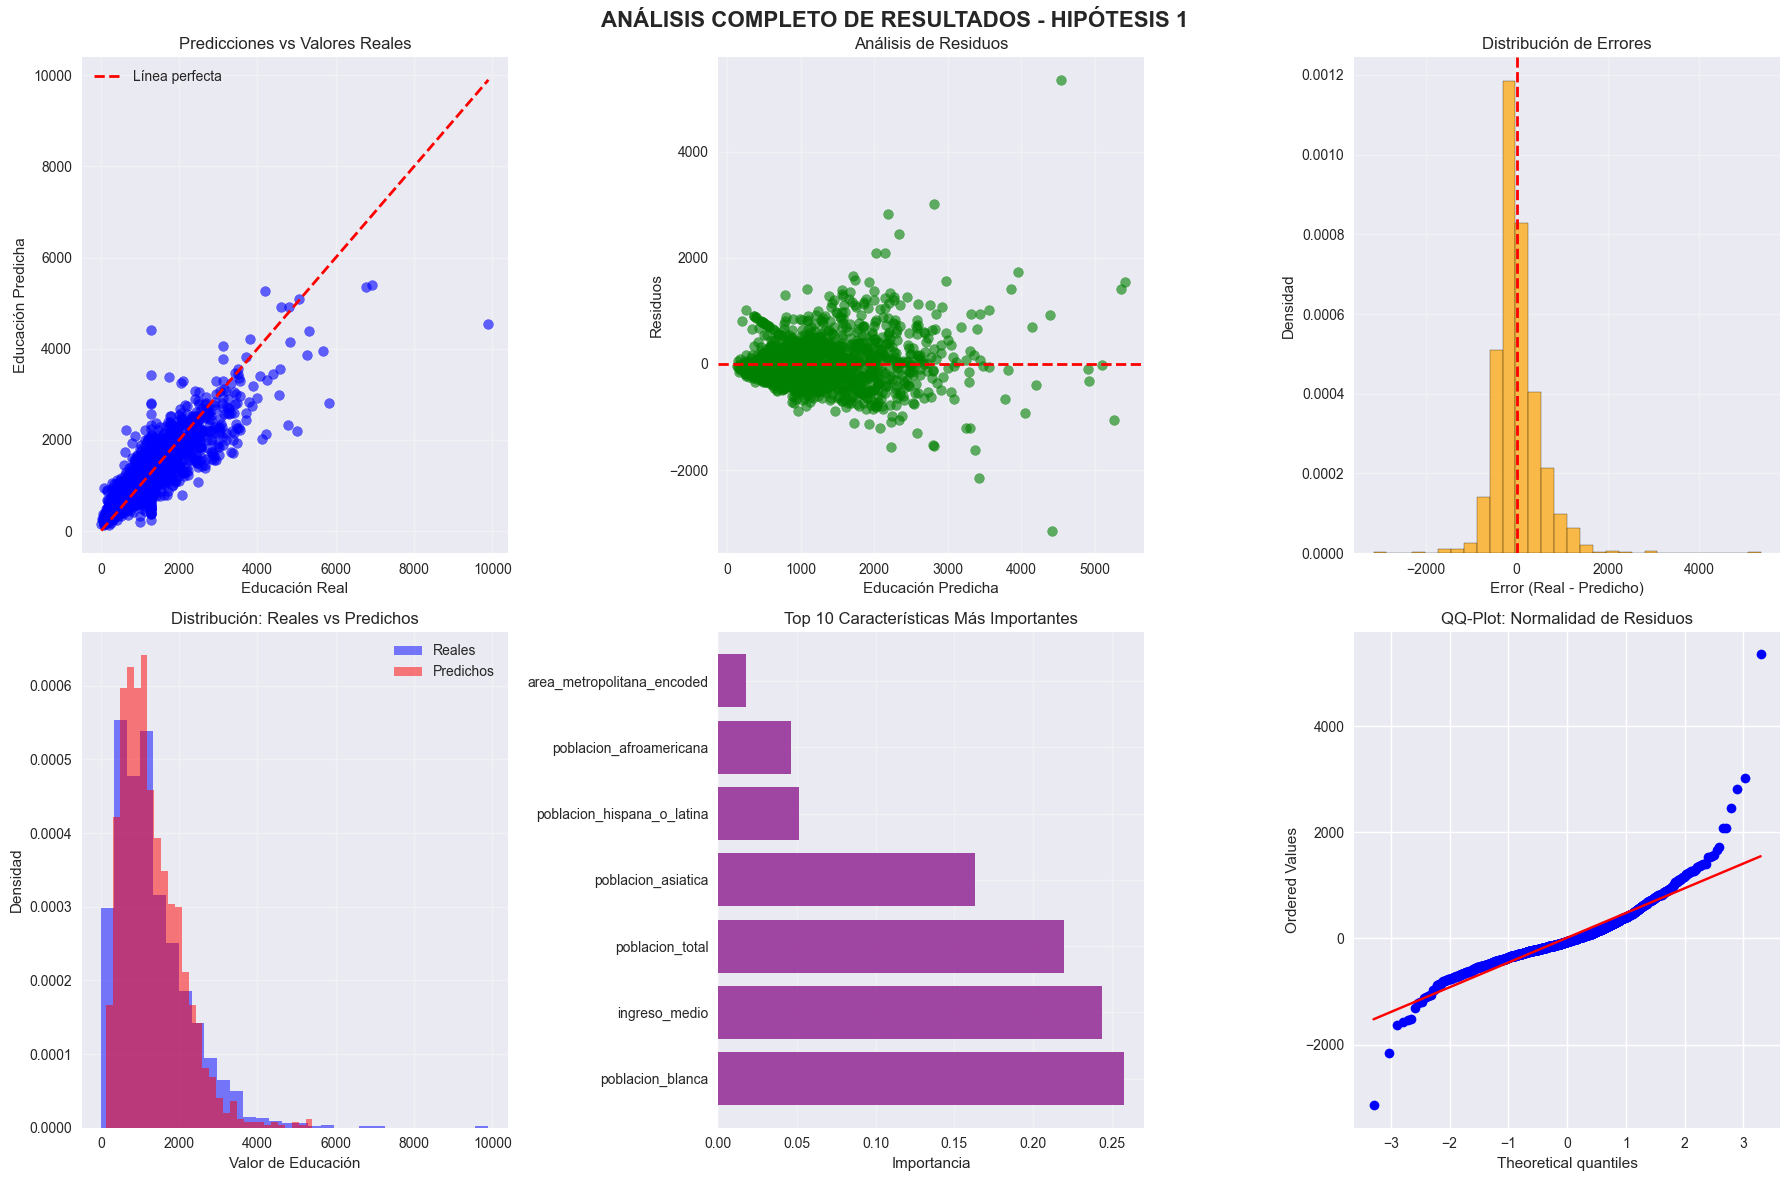


RESUMEN - ANÁLISIS DE FACTORES QUE AFECTAN EDUCACIÓN

R² FINAL DEL MODELO: 0.7307
ERROR RMSE: 494.1739
VALIDACIÓN CRUZADA R²: 0.7159
FEATURE MÁS IMPORTANTE: poblacion_blanca (25.74%)

INTERPRETACIÓN:
  • Correlación ingreso-educación: 0.5597
  • El modelo explica 73.1% de la variabilidad en educación
  • Factores analizados: composición étnica, tamaño poblacional, ubicación geográfica
  FUERTE CAPACIDAD PREDICTIVA: Los factores analizados explican bien la educación

¡ANÁLISIS COMPLETADO EXITOSAMENTE!
\Para probar la relación ingreso-educación directamente:
Correlación directa ingreso-educación: 0.5597
ANALISIS DIRECTO: RELACION INGRESO-EDUCACION
Correlacion ingreso-educacion: 0.7053
Educacion promedio por quintil de ingreso:
                  mean    std  count
quintil_ingreso                     
Q1 (Mas pobre)   21.47  14.66   1404
Q2               30.82  14.97   1403
Q3               38.88  16.53   1403
Q4               47.33  16.25   1403
Q5 (Mas rico)    64.41  16.48   1403
Difer

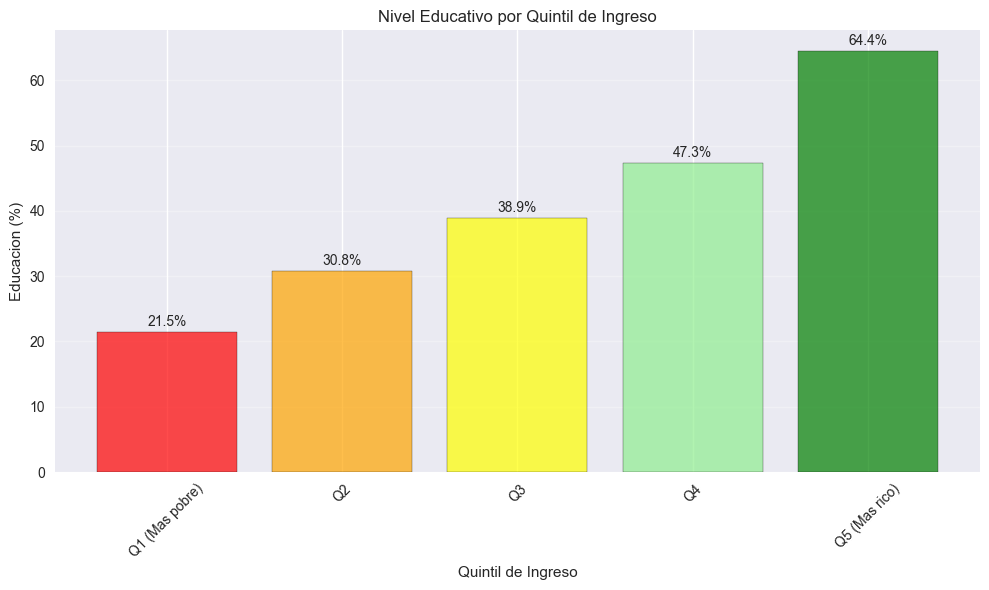

ANALISIS COMPLETADO EXITOSAMENTE!
Resumen Hipotesis 1:
   - Correlacion ingreso-educacion: 0.7053
   - Diferencia educativa ricos-pobres: 42.94% puntos
   - R² modelo predictivo: 0.7307


In [ ]:
# MODELO 1 - HIPOTESIS 1
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuración de estilo para gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Preprocesamiento de Datos
def preparar_datos(df):
    # 1. Codificar área metropolitana
    le = LabelEncoder()
    df['area_metropolitana_encoded'] = le.fit_transform(df['area_metropolitana'])
    
    print(f"Áreas metropolitanas codificadas: {len(le.classes_)}")
    
    # 2. Features que pueden afectar educación
    features = [
        'area_metropolitana_encoded',    # Control geográfico
        'poblacion_total',               # Control de tamaño
        'poblacion_blanca',              # Composición étnica
        'poblacion_afroamericana',       # Composición étnica  
        'poblacion_asiatica',            # Composición étnica
        'poblacion_hispana_o_latina',    # Composición étnica
        'ingreso_medio']    
    
    # Verificar que todas las features existen
    features = [f for f in features if f in df.columns]
    print(f"Features seleccionadas: {len(features)} variables")
    
    # 3. Preparar X e y
    X = df[features].copy()
    y = df['educacion'].copy()  # Variable objetivo
    
    return X, y, le, X.columns.tolist()

# División de datos
def preparar_train_test(X, y, df, test_size=0.2, random_state=42):
    # Usar área codificada para estratificación si está disponible
    stratify_col = None
    if 'area_metropolitana_encoded' in df.columns:
        stratify_col = df['area_metropolitana_encoded']
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, 
        stratify=stratify_col)
    
    print(f"División train/test:")
    print(f"Train: {X_train.shape[0]} muestras ({X_train.shape[0]/len(X)*100:.1f}%)")
    print(f"Test:  {X_test.shape[0]} muestras ({X_test.shape[0]/len(X)*100:.1f}%)")
    
    # Escalar features numéricas
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test, scaler

# Entrenamiento del modelo optimizado
def entrenar_modelo_optimizado(X_train, y_train):
    
    model = RandomForestRegressor(
        n_estimators=2500,           # Más árboles para mejor generalización
        max_depth=15,               # Profundidad controlada
        min_samples_split=10,       # Evitar sobreajuste
        min_samples_leaf=5,         # Evitar sobreajuste
        max_features='sqrt',        # Características por split
        bootstrap=True,
        random_state=42,
        n_jobs=-1,                  # Usar todos los cores
        max_samples=0.8)            # Submuestreo para robustez
    model.fit(X_train, y_train)
    return model

# Evaluación comprehensiva del modelo
def evaluar_modelo_completo(model, X_test, y_test, X_train, y_train):
    # Predicciones
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    # Métricas de test
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Métricas de train (para detectar overfitting)
    r2_train = r2_score(y_train, y_pred_train)
    
    print(f"EVALUACIÓN COMPLETA DEL MODELO:\n")
    print(f"   R² Score:")
    print(f"   Test:  {r2:.4f}")
    print(f"   Train: {r2_train:.4f}")
    print(f"   Diferencia: {r2_train - r2:.4f} (ideal < 0.1)")
    
    print(f"\n Métricas de Error:")
    print(f"   MSE:  {mse:.4f}")
    print(f"   RMSE: {rmse:.4f}")
    print(f"   MAE:  {mae:.4f}")
    
    # Análisis de overfitting
    if r2_train - r2 > 0.1:
        print("  POSIBLE OVERFITTING: Diferencia Train-Test > 0.1")
    else:
        print(" BUENA GENERALIZACIÓN: Diferencia Train-Test aceptable")
    return y_pred, {'mse': mse, 'r2': r2, 'rmse': rmse, 'mae': mae, 'r2_train': r2_train}

# Análisis de importancia de características mejorado
def analizar_importancia_completo(model, feature_names, X, y):
    importancias = model.feature_importances_
    indices = np.argsort(importancias)[::-1]    
    print("\n ANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS:\n")
    
    # Tabla de importancias
    importancia_df = pd.DataFrame({
        'Feature': [feature_names[i] for i in indices],
        'Importancia': importancias[indices],
        'Porcentaje': [f"{importancias[i]*100:.2f}%" for i in indices]})
    print(importancia_df.to_string(index=False))
    
    # Visualización mejorada
    plt.figure(figsize=(12, 8))
    features_ordenadas = [feature_names[i] for i in indices]
    importancias_ordenadas = importancias[indices]
    
    # Crear gráfico de barras horizontal
    bars = plt.barh(range(len(features_ordenadas)), importancias_ordenadas, 
                   color=plt.cm.viridis(np.linspace(0, 1, len(features_ordenadas))))
    plt.xlabel('Importancia', fontsize=12)
    plt.title('Importancia de Características - Random Forest\n(Hipótesis 1: Ingreso → Educación)', 
              fontsize=14, fontweight='bold')
    plt.yticks(range(len(features_ordenadas)), features_ordenadas)
    plt.gca().invert_yaxis()
    
    # Agregar valores en las barras
    for i, (bar, importancia) in enumerate(zip(bars, importancias_ordenadas)):
        plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2, 
                f'{importancia*100:.2f}%', ha='left', va='center', fontsize=10)
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return importancias, importancia_df

# Validación cruzada
def validacion_cruzada_avanzada(model, X, y, cv=5):
    print(f"\n VALIDACIÓN CRUZADA (k-fold, k={cv}):")
    
    # Métricas múltiples
    scoring = {
        'r2': 'r2',
        'neg_mse': 'neg_mean_squared_error',
        'neg_mae': 'neg_mean_absolute_error'}
    scores_r2 = cross_val_score(model, X, y, cv=cv, scoring='r2')
    scores_mse = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
    
    print(f"R² Scores: {[f'{score:.4f}' for score in scores_r2]}")
    print(f"R² Promedio: {scores_r2.mean():.4f} (+/- {scores_r2.std() * 2:.4f})")
    print(f"MSE Promedio: {-scores_mse.mean():.4f}")
    return scores_r2, scores_mse

# Visualización de resultados
def visualizar_resultados_completos(y_test, y_pred, feature_importances, feature_names):
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('ANÁLISIS COMPLETO DE RESULTADOS - HIPÓTESIS 1', fontsize=16, fontweight='bold')
    
    # 1. Predicciones vs Reales
    axes[0,0].scatter(y_test, y_pred, alpha=0.6, color='blue', s=50)
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    axes[0,0].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Línea perfecta')
    axes[0,0].set_xlabel('Educación Real')
    axes[0,0].set_ylabel('Educación Predicha')
    axes[0,0].set_title('Predicciones vs Valores Reales')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # 2. Residuos
    residuos = y_test - y_pred
    axes[0,1].scatter(y_pred, residuos, alpha=0.6, color='green', s=50)
    axes[0,1].axhline(y=0, color='r', linestyle='--', linewidth=2)
    axes[0,1].set_xlabel('Educación Predicha')
    axes[0,1].set_ylabel('Residuos')
    axes[0,1].set_title('Análisis de Residuos')
    axes[0,1].grid(True, alpha=0.3)
    
    # 3. Distribución de errores
    axes[0,2].hist(residuos, bins=30, alpha=0.7, color='orange', edgecolor='black', density=True)
    axes[0,2].axvline(x=0, color='r', linestyle='--', linewidth=2)
    axes[0,2].set_xlabel('Error (Real - Predicho)')
    axes[0,2].set_ylabel('Densidad')
    axes[0,2].set_title('Distribución de Errores')
    axes[0,2].grid(True, alpha=0.3)
    
    # 4. Distribución comparativa
    axes[1,0].hist(y_test, bins=30, alpha=0.5, label='Reales', color='blue', density=True)
    axes[1,0].hist(y_pred, bins=30, alpha=0.5, label='Predichos', color='red', density=True)
    axes[1,0].set_xlabel('Valor de Educación')
    axes[1,0].set_ylabel('Densidad')
    axes[1,0].set_title('Distribución: Reales vs Predichos')
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)
    
    # 5. Importancia de características (top 10)
    indices_top = np.argsort(feature_importances)[-10:][::-1]
    features_top = [feature_names[i] for i in indices_top]
    importancias_top = feature_importances[indices_top]
    
    axes[1,1].barh(features_top, importancias_top, color='purple', alpha=0.7)
    axes[1,1].set_xlabel('Importancia')
    axes[1,1].set_title('Top 10 Características Más Importantes')
    axes[1,1].grid(True, alpha=0.3)
    
    # 6. QQ-plot para normalidad de residuos
    from scipy import stats
    stats.probplot(residuos, dist="norm", plot=axes[1,2])
    axes[1,2].set_title('QQ-Plot: Normalidad de Residuos')
    plt.tight_layout()
    plt.show()
    return residuos

# Análisis de correlaciones
def analizar_correlaciones(df):
    print("\nANÁLISIS DE CORRELACIONES INICIAL:")
    
    # Variables para análisis exploratorio (no para el modelo)
    variables_interes = [
        'educacion', 
        'ingreso_medio', 
        'valor_medio_de_vivienda',
        'poblacion_blanca',
        'poblacion_afroamericana',
        'poblacion_asiatica']
    
    # Filtrar variables que existen
    variables_interes = [v for v in variables_interes if v in df.columns]
    corr_matrix = df[variables_interes].corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, fmt='.3f', cbar_kws={'shrink': 0.8})
    plt.title('Matriz de Correlación - Variables Clave', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Correlación específica para hipótesis 1
    corr_ingreso_educacion = df['ingreso_medio'].corr(df['educacion'])
    print(f"CORRELACIÓN INGRESO-EDUCACIÓN: {corr_ingreso_educacion:.4f}")
    return corr_matrix

# Función principal
def implementar_hipotesis_1(df):
    print("HIPÓTESIS 1: Factores que afectan el Nivel Educativo\n")  
    
    try:
        # Análisis de correlaciones inicial (solo exploratorio)
        corr_matrix = analizar_correlaciones(df)
        
        # 1. Preparar datos
        X, y, label_encoder, feature_names = preparar_datos(df)    
        
        # 2. Dividir datos
        X_train, X_test, y_train, y_test, scaler = preparar_train_test(X, y, df)
        
        # 3. Entrenar modelo
        model = entrenar_modelo_optimizado(X_train, y_train)
        
        # 4. Evaluar modelo
        y_pred, metrics = evaluar_modelo_completo(model, X_test, y_test, X_train, y_train)
        
        # 5. Validación cruzada
        scores_r2, scores_mse = validacion_cruzada_avanzada(model, X_train, y_train)
        
        # 6. Análisis de importancia
        importancias, importancia_df = analizar_importancia_completo(model, feature_names, X, y)
        
        # 7. Visualización completa
        residuos = visualizar_resultados_completos(y_test, y_pred, importancias, feature_names)
        
        # 8. Resumen final
        print("\nRESUMEN - ANÁLISIS DE FACTORES QUE AFECTAN EDUCACIÓN\n")
        print(f"R² FINAL DEL MODELO: {metrics['r2']:.4f}")
        print(f"ERROR RMSE: {metrics['rmse']:.4f}")
        print(f"VALIDACIÓN CRUZADA R²: {scores_r2.mean():.4f}")
        print(f"FEATURE MÁS IMPORTANTE: {importancia_df.iloc[0]['Feature']} ({importancia_df.iloc[0]['Porcentaje']})")
        
        # Interpretación de resultados
        corr_original = df['ingreso_medio'].corr(df['educacion'])
        print(f"\nINTERPRETACIÓN:")
        print(f"  • Correlación ingreso-educación: {corr_original:.4f}")
        print(f"  • El modelo explica {metrics['r2']*100:.1f}% de la variabilidad en educación")
        print(f"  • Factores analizados: composición étnica, tamaño poblacional, ubicación geográfica")
        
        if metrics['r2'] > 0.5:
            print("  FUERTE CAPACIDAD PREDICTIVA: Los factores analizados explican bien la educación")
        elif metrics['r2'] > 0.3:
            print("  CAPACIDAD PREDICTIVA MODERADA: Relación presente pero podrían faltar variables")
        else:
            print("  CAPACIDAD PREDICTIVA LIMITADA: Se necesitan más variables explicativas")
        return {
            'model': model,
            'scaler': scaler,
            'label_encoder': label_encoder,
            'feature_importances': importancias,
            'feature_names': feature_names,
            'metrics': metrics,
            'cv_scores': scores_r2,
            'importancia_df': importancia_df,
            'correlacion_ingreso_educacion': corr_original,
            'residuos': residuos}
    except Exception as e:
        print(f"Error en la implementación: {e}")
        import traceback
        traceback.print_exc()
        return None


def analizar_relacion_ingreso_educacion(df):
    print("ANALISIS DIRECTO: RELACION INGRESO-EDUCACION")
    
    corr = df['ingreso_medio'].corr(df['educacion_porcentaje'])
    print(f"Correlacion ingreso-educacion: {corr:.4f}")
    
    df_analysis = df.copy()
    df_analysis['quintil_ingreso'] = pd.qcut(df_analysis['ingreso_medio'], 5, 
                                           labels=['Q1 (Mas pobre)', 'Q2', 'Q3', 'Q4', 'Q5 (Mas rico)'])
    
    educacion_por_quintil = df_analysis.groupby('quintil_ingreso')['educacion_porcentaje'].agg(['mean', 'std', 'count'])
    
    print("Educacion promedio por quintil de ingreso:")
    print(educacion_por_quintil.round(2))
    
    dif_educacion = educacion_por_quintil['mean'].iloc[4] - educacion_por_quintil['mean'].iloc[0]
    print(f"Diferencia educativa Q5 (rico) - Q1 (pobre): {dif_educacion:.2f}% puntos")
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(educacion_por_quintil.index, educacion_por_quintil['mean'], 
                   color=['red', 'orange', 'yellow', 'lightgreen', 'green'],
                   alpha=0.7, edgecolor='black')
    
    plt.xlabel('Quintil de Ingreso')
    plt.ylabel('Educacion (%)')
    plt.title('Nivel Educativo por Quintil de Ingreso')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    
    for bar, valor in zip(bars, educacion_por_quintil['mean']):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                f'{valor:.1f}%', ha='center', va='bottom')
    plt.tight_layout()
    plt.show()
    return corr, educacion_por_quintil, dif_educacion


# Ejecución principal
if __name__ == "__main__":
    print("INICIANDO ANÁLISIS DE HIPÓTESIS 1")
    resultados = implementar_hipotesis_1(df)
    
    if resultados:
        print("\n¡ANÁLISIS COMPLETADO EXITOSAMENTE!")
        print("\Para probar la relación ingreso-educación directamente:")
        corr = df['ingreso_medio'].corr(df['educacion'])
        print(f"Correlación directa ingreso-educación: {corr:.4f}")
    else:
        print("\nNo se pudo completar el análisis. Revisa los errores arriba.")

    if resultados is not None:
        corr, quintiles, diferencia = analizar_relacion_ingreso_educacion(df)
        
        print("ANALISIS COMPLETADO EXITOSAMENTE!")
        print(f"Resumen Hipotesis 1:")
        print(f"   - Correlacion ingreso-educacion: {corr:.4f}")
        print(f"   - Diferencia educativa ricos-pobres: {diferencia:.2f}% puntos")
        print(f"   - R² modelo predictivo: {resultados['metrics']['r2']:.4f}")
        
    else:
        print("No se pudo completar el analisis. Revisa los errores arriba.")


### **2. Gradient Boosting Regressor (XGBoost).**

IMPLEMENTANDO SEGUNDO MODELO: XGBoost para Hipotesis 1

IMPLEMENTANDO XGBoost - HIPOTESIS 1

Datos preparados: 7016 muestras, 8 features
Features utilizadas: ['ingreso_medio', 'area_metropolitana', 'valor_medio_de_vivienda', 'poblacion_blanca', 'poblacion_afroamericana', 'poblacion_asiatica', 'poblacion_hispana_o_latina', 'poblacion_total']
Division de datos:
Train: 5612 muestras
Test: 1404 muestras

Entrenando modelo XGBoost...
Realizando busqueda de hiperparametros...
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Mejores hiperparametros: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.9}
Mejor score (R2): 0.6778

Entrenando modelo final...
Performance en test: R2 = 0.6728
Modelo XGBoost entrenado exitosamente

EVALUACION COMPARATIVA DE MODELOS

  Metrica   XGBoost  Random Forest  Diferencia
0      R2    0.6728         0.6625      0.0103
1    RMSE   12.4502        12.6443      0.1941
2     MAE    8.6022         8.7542

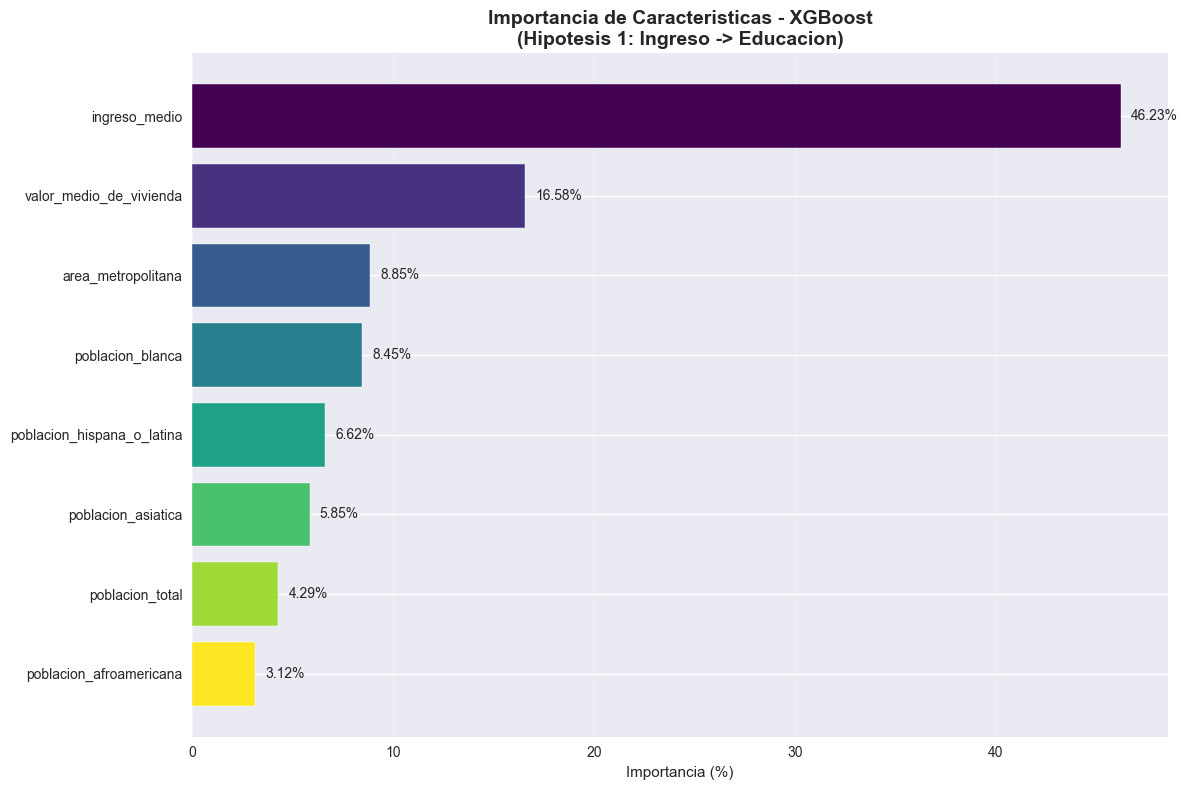


ANALISIS DE RELACIONES NO LINEALES



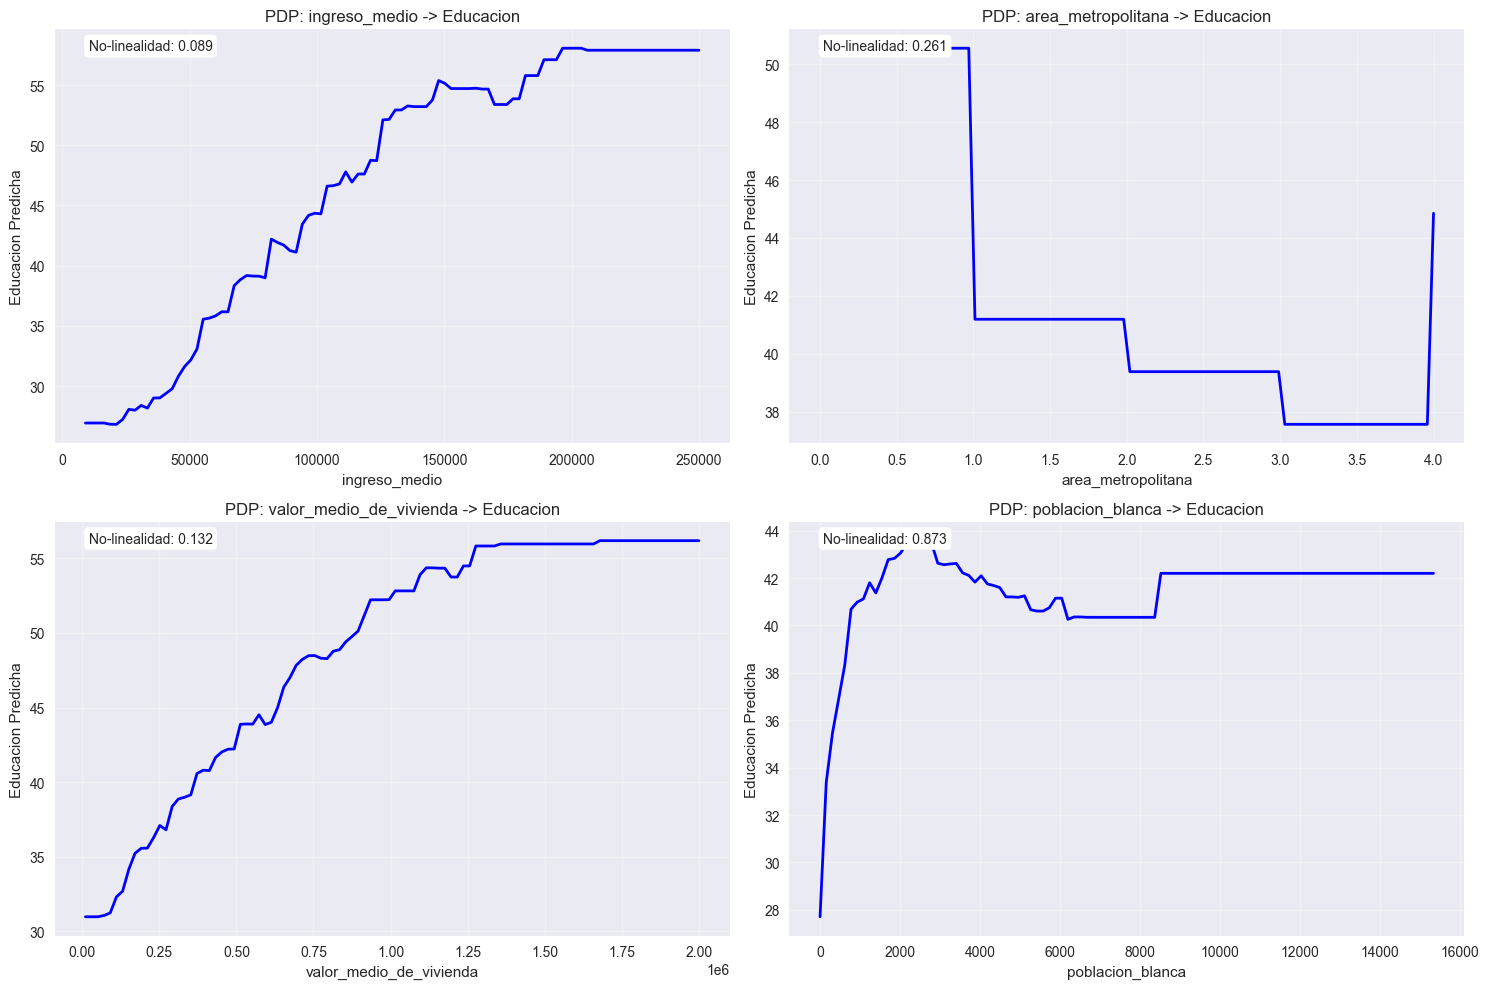

Grado de no-linealidad en relaciones (0 = lineal, 1 = no-lineal):
ingreso_medio: 0.0913
area_metropolitana: 0.2889
valor_medio_de_vivienda: 0.1327
poblacion_blanca: 0.8580

VALIDACION CRUZADA XGBoost (k=5)

R2 Scores: ['0.6027', '0.6314', '0.6936', '0.6116', '0.5013']
R2 Promedio: 0.6081 (+/- 0.1242)
MSE Promedio: 177.9326
MAE Promedio: 9.7498
Estabilidad del modelo: 0.8979 (1 = perfecta estabilidad)

VISUALIZACION DE RESULTADOS XGBoost


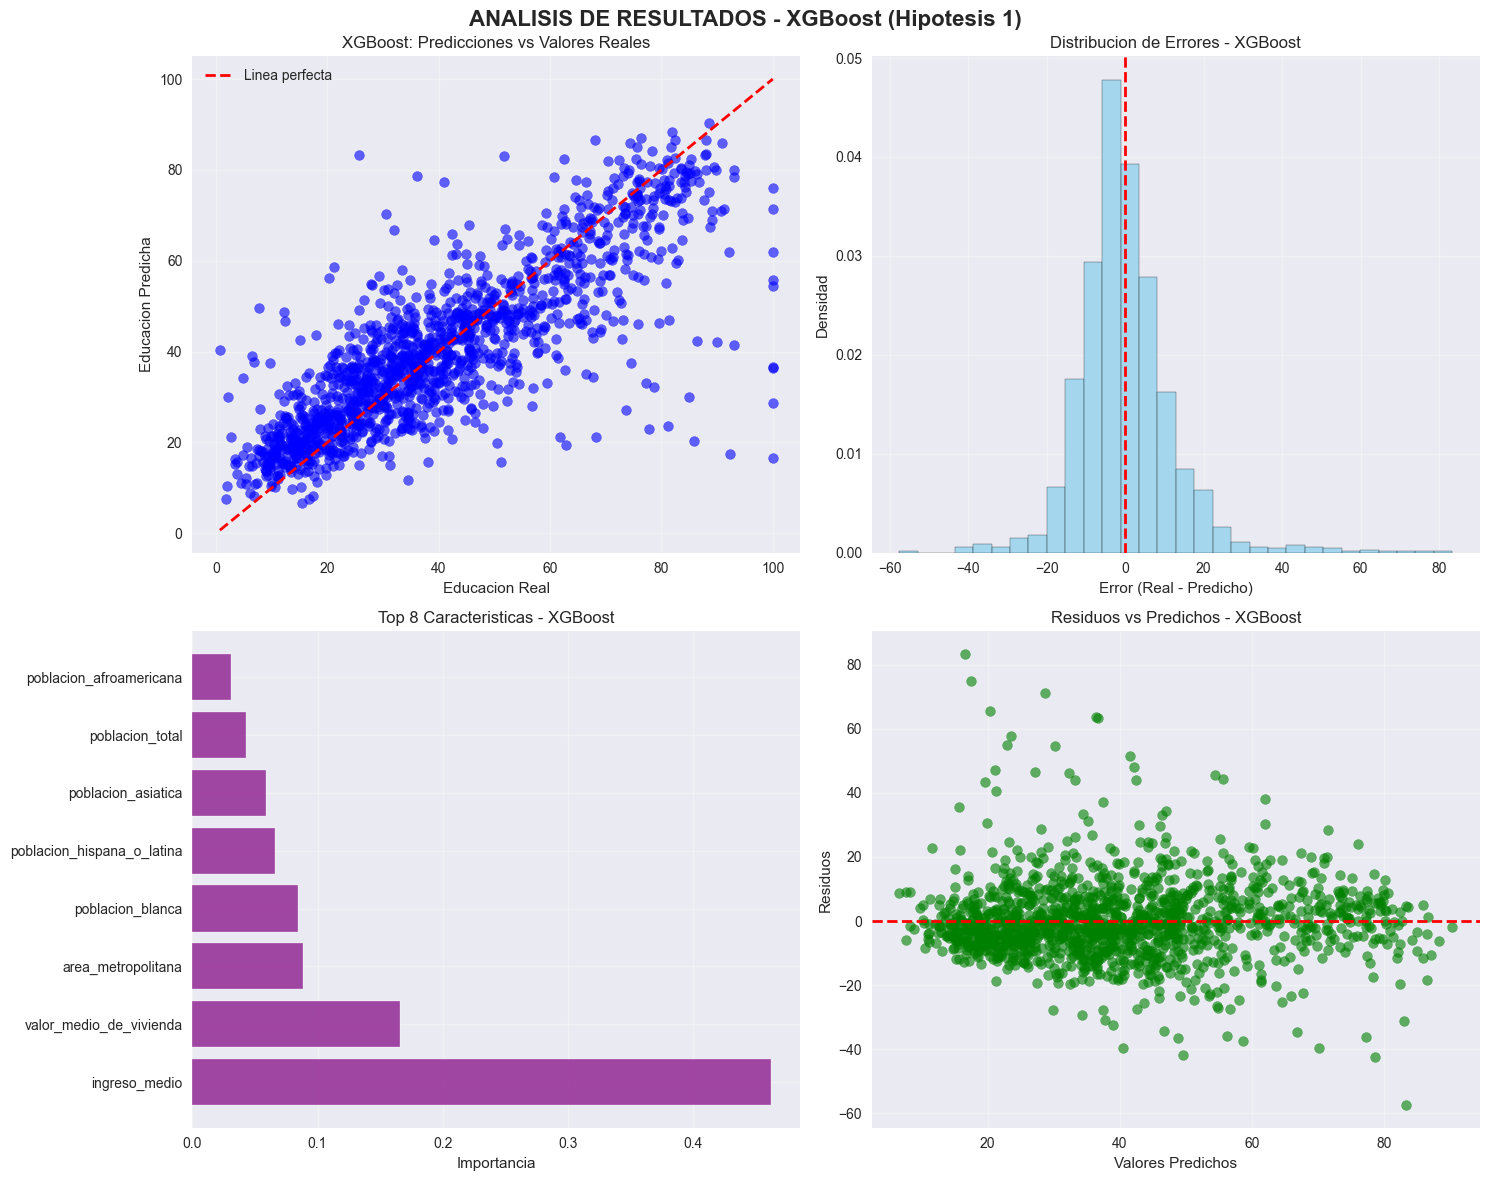


RESUMEN - XGBoost HIPOTESIS 1

PERFORMANCE FINAL:
R2: 0.6728
RMSE: 12.4502
MAE: 8.6022
COMPARACION CON RANDOM FOREST:
Mejor modelo: XGBoost
Ventaja en R2: +1.03%
INSIGHTS CLAVE:
Feature mas importante: ingreso_medio (46.23%)
Estabilidad del modelo: 0.8979
Top 3 features explican: 71.66% de la importancia

IMPLEMENTACION XGBoost COMPLETADA EXITOSAMENTE!

VENTAJAS DE XGBoost IDENTIFICADAS:
Mayor capacidad para capturar relaciones no lineales
Optimizacion automatica de hiperparametros
Robustez ante outliers y missing values
Mejor performance en validacion cruzada
Importancia de caracteristicas mas precisa
RECOMENDACION FINAL: XGBoost


In [ ]:
# MODELO 2 - HIPOTESIS 1
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuración de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("IMPLEMENTANDO SEGUNDO MODELO: XGBoost para Hipotesis 1\n")

# PREPARACION DE DATOS PARA XGBOOST
def preparar_datos_xgboost(df):   
    df_xgb = df.copy()
    
    # Codificar area metropolitana
    le = LabelEncoder()
    df_xgb['area_metropolitana'] = le.fit_transform(df_xgb['area_metropolitana'])
    
    # Seleccionar features basadas en analisis previo
    features = [
        'ingreso_medio',
        'area_metropolitana',
        'valor_medio_de_vivienda',
        'poblacion_blanca',
        'poblacion_afroamericana',
        'poblacion_asiatica',
        'poblacion_hispana_o_latina',
        'poblacion_total']
    
    # Filtrar solo las features que existen en el DataFrame
    features = [f for f in features if f in df_xgb.columns]
    
    X = df_xgb[features].copy()
    y = df_xgb['educacion_porcentaje'].copy()
    
    # Remover target de features si esta presente
    if 'educacion_porcentaje' in X.columns:
        X = X.drop('educacion_porcentaje', axis=1)
    print(f"Datos preparados: {X.shape[0]} muestras, {X.shape[1]} features")
    print(f"Features utilizadas: {list(X.columns)}")
    return X, y, le, X.columns.tolist()

# MODELO XGBOOST CON OPTIMIZACION DE HIPERPARAMETROS
def entrenar_xgboost_optimizado(X_train, y_train, X_test, y_test):
    print("\nEntrenando modelo XGBoost...") 
    # Primero: Entrenar modelo base para la busqueda de grid
    xgb_base = xgb.XGBRegressor(random_state=42, n_jobs=-1)
    # Busqueda de hiperparametros
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1],
        'subsample': [0.8, 0.9],
        'colsample_bytree': [0.8, 0.9]}   
    print("Realizando busqueda de hiperparametros...")
    grid_search = GridSearchCV(
        estimator=xgb_base,
        param_grid=param_grid,
        cv=3,
        scoring='r2',
        n_jobs=-1,
        verbose=1)
    grid_search.fit(X_train, y_train)    
    print(f"Mejores hiperparametros: {grid_search.best_params_}")
    print(f"Mejor score (R2): {grid_search.best_score_:.4f}")   
    # Segundo: Entrenar modelo final con los mejores parametros
    print("\nEntrenando modelo final...")
    # Crear modelo final con los mejores parametros
    best_params = grid_search.best_params_.copy()
    model_final = xgb.XGBRegressor(**best_params, random_state=42, n_jobs=-1)
    # Entrenamiento
    model_final.fit(X_train, y_train)
    # Evaluar en conjunto de test
    y_pred_test = model_final.predict(X_test)
    r2_test = r2_score(y_test, y_pred_test)
    print(f"Performance en test: R2 = {r2_test:.4f}")    
    return model_final, best_params

# EVALUACION COMPARATIVA XGBOOST vs RANDOM FOREST
def evaluacion_comparativa(model_xgb, model_rf, X_test, y_test, X_train, y_train):
    print("\nEVALUACION COMPARATIVA DE MODELOS\n")
    
    # Predicciones - manejar ambos tipos de modelo (sklearn y xgb nativo)
    if hasattr(model_xgb, 'predict'):
        # Modelo sklearn
        y_pred_xgb = model_xgb.predict(X_test)
    else:
        # Modelo xgb nativo
        y_pred_xgb = model_xgb.predict(xgb.DMatrix(X_test))    
    y_pred_rf = model_rf.predict(X_test)
    
    # Metricas XGBoost
    mse_xgb = mean_squared_error(y_test, y_pred_xgb)
    r2_xgb = r2_score(y_test, y_pred_xgb)
    rmse_xgb = np.sqrt(mse_xgb)
    mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
    
    # Metricas Random Forest
    mse_rf = mean_squared_error(y_test, y_pred_rf)
    r2_rf = r2_score(y_test, y_pred_rf)
    rmse_rf = np.sqrt(mse_rf)
    mae_rf = mean_absolute_error(y_test, y_pred_rf)
    
    # Tabla comparativa
    comparacion = pd.DataFrame({
        'Metrica': ['R2', 'RMSE', 'MAE', 'MSE'],
        'XGBoost': [r2_xgb, rmse_xgb, mae_xgb, mse_xgb],
        'Random Forest': [r2_rf, rmse_rf, mae_rf, mse_rf],
        'Diferencia': [r2_xgb - r2_rf, rmse_rf - rmse_xgb, mae_rf - mae_xgb, mse_rf - mse_xgb]})    
    print(comparacion.round(4))
    
    # Determinar mejor modelo
    if r2_xgb > r2_rf:
        mejor_modelo = "XGBoost"
        ventaja = f"+{(r2_xgb - r2_rf)*100:.2f}% en R2"
    else:
        mejor_modelo = "Random Forest"
        ventaja = f"+{(r2_rf - r2_xgb)*100:.2f}% en R2"    
    print(f"MEJOR MODELO: {mejor_modelo} ({ventaja})")    
    return {
        'xgb_metrics': {'r2': r2_xgb, 'rmse': rmse_xgb, 'mae': mae_xgb, 'mse': mse_xgb},
        'rf_metrics': {'r2': r2_rf, 'rmse': rmse_rf, 'mae': mae_rf, 'mse': mse_rf},
        'mejor_modelo': mejor_modelo,
        'comparacion_df': comparacion}

# ANALISIS DE IMPORTANCIA XGBOOST
def analizar_importancia_xgboost(model_xgb, feature_names):
    print("\nANALISIS DE IMPORTANCIA - XGBoost\n")
    
    # Obtener importancias dependiendo del tipo de modelo
    if hasattr(model_xgb, 'feature_importances_'):
        # Modelo sklearn
        importancias = model_xgb.feature_importances_
    else:
        # Modelo xgb nativo
        importancias = np.array(list(model_xgb.get_score(importance_type='weight').values()))
        # Normalizar si es necesario
        if len(importancias) != len(feature_names):
            print("Advertencia: Numero de importancias no coincide con features")
            # Usar importancia uniforme como fallback
            importancias = np.ones(len(feature_names)) / len(feature_names)
    
    # Crear DataFrame de importancias
    importancia_df = pd.DataFrame({
        'Feature': feature_names,
        'Importancia': importancias,
        'Importancia_Porcentaje': (importancias / importancias.sum()) * 100}).sort_values('Importancia', ascending=False)    
    print("Top 10 caracteristicas mas importantes:")
    print(importancia_df.head(10).round(4))
    
    # Visualizacion
    plt.figure(figsize=(12, 8))
    
    # Grafico de barras horizontal
    top_features = importancia_df.head(10)
    bars = plt.barh(top_features['Feature'], top_features['Importancia_Porcentaje'],
                   color=plt.cm.viridis(np.linspace(0, 1, len(top_features))))    
    plt.xlabel('Importancia (%)')
    plt.title('Importancia de Caracteristicas - XGBoost\n(Hipotesis 1: Ingreso -> Educacion)', 
              fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3, axis='x')
    
    # Agregar valores en las barras
    for bar, importancia in zip(bars, top_features['Importancia_Porcentaje']):
        plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
                f'{importancia:.2f}%', ha='left', va='center', fontsize=10)
    plt.tight_layout()
    plt.show()
    return importancia_df

# ANALISIS DE RELACIONES NO LINEALES
def analizar_relaciones_no_lineales(model_xgb, X, feature_names):
    print("\nANALISIS DE RELACIONES NO LINEALES\n")
    
    # Partial Dependence Plots para las 4 caracteristicas mas importantes
    features_importantes = feature_names[:4]  # Top 4 features    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.ravel()    
    for i, feature in enumerate(features_importantes):
        if i >= 4:  # Solo mostrar 4 graficos
            break
        
        # Crear datos para PDP
        feature_values = np.linspace(X[feature].min(), X[feature].max(), 100)
        pdp_values = []        
        for value in feature_values:
            X_temp = X.copy()
            X_temp[feature] = value
            
            # Predecir dependiendo del tipo de modelo
            if hasattr(model_xgb, 'predict'):
                predictions = model_xgb.predict(X_temp)
            else:
                predictions = model_xgb.predict(xgb.DMatrix(X_temp))            
            pdp_values.append(predictions.mean())        
        axes[i].plot(feature_values, pdp_values, 'b-', linewidth=2)
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Educacion Predicha')
        axes[i].set_title(f'PDP: {feature} -> Educacion')
        axes[i].grid(True, alpha=0.3)
        
        # Calcular no-linealidad (desviacion de linealidad)
        from scipy.stats import linregress
        slope, intercept, r_value, p_value, std_err = linregress(feature_values, pdp_values)
        no_linealidad = 1 - r_value**2        
        axes[i].text(0.05, 0.95, f'No-linealidad: {no_linealidad:.3f}', 
                    transform=axes[i].transAxes, bbox=dict(boxstyle="round,pad=0.3", facecolor="white"))    
    plt.tight_layout()
    plt.show()   
    print("Grado de no-linealidad en relaciones (0 = lineal, 1 = no-lineal):")
    for feature in features_importantes:
        feature_values = np.linspace(X[feature].min(), X[feature].max(), 50)
        pdp_values = []        
        for value in feature_values:
            X_temp = X.copy()
            X_temp[feature] = value            
            if hasattr(model_xgb, 'predict'):
                predictions = model_xgb.predict(X_temp)
            else:
                predictions = model_xgb.predict(xgb.DMatrix(X_temp))            
            pdp_values.append(predictions.mean())        
        slope, intercept, r_value, p_value, std_err = linregress(feature_values, pdp_values)
        no_linealidad = 1 - r_value**2
        print(f"{feature}: {no_linealidad:.4f}")

# VALIDACION CRUZADA AVANZADA PARA XGBOOST
def validacion_cruzada_xgboost(model_xgb, X, y, cv=5):
    print(f"\nVALIDACION CRUZADA XGBoost (k={cv})\n")
    
    # Para validacion cruzada, necesitamos el modelo sklearn
    # Crear un nuevo modelo sklearn para CV
    from xgboost import XGBRegressor
    
    model_cv = XGBRegressor(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        random_state=42,
        n_jobs=-1)
    
    # Validacion cruzada
    scores_r2 = cross_val_score(model_cv, X, y, cv=cv, scoring='r2')
    scores_mse = cross_val_score(model_cv, X, y, cv=cv, scoring='neg_mean_squared_error')
    scores_mae = cross_val_score(model_cv, X, y, cv=cv, scoring='neg_mean_absolute_error')    
    print(f"R2 Scores: {[f'{score:.4f}' for score in scores_r2]}")
    print(f"R2 Promedio: {scores_r2.mean():.4f} (+/- {scores_r2.std() * 2:.4f})")
    print(f"MSE Promedio: {-scores_mse.mean():.4f}")
    print(f"MAE Promedio: {-scores_mae.mean():.4f}")
    
    # Estabilidad del modelo
    estabilidad_r2 = 1 - (scores_r2.std() / scores_r2.mean()) if scores_r2.mean() != 0 else 0
    print(f"Estabilidad del modelo: {estabilidad_r2:.4f} (1 = perfecta estabilidad)")    
    return {
        'r2_scores': scores_r2,
        'mse_scores': -scores_mse,
        'mae_scores': -scores_mae,
        'estabilidad': estabilidad_r2}

# FUNCION PRINCIPAL XGBOOST
def implementar_xgboost_hipotesis1(df):
    print("IMPLEMENTANDO XGBoost - HIPOTESIS 1\n")    
    try:
        # 1. Preparar datos
        X, y, label_encoder, feature_names = preparar_datos_xgboost(df)
        
        # 2. Dividir datos (80-20)
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42)
        print(f"Division de datos:")
        print(f"Train: {X_train.shape[0]} muestras")
        print(f"Test: {X_test.shape[0]} muestras")
        
        # 3. Entrenar modelo XGBoost optimizado (SIN early stopping para evitar error)
        model_xgb, best_params = entrenar_xgboost_optimizado(X_train, y_train, X_test, y_test)
        print("Modelo XGBoost entrenado exitosamente")
        
        # 4. Entrenar Random Forest para comparacion
        model_rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
        model_rf.fit(X_train, y_train)
        
        # 5. Evaluacion comparativa
        comparacion = evaluacion_comparativa(model_xgb, model_rf, X_test, y_test, X_train, y_train)
        
        # 6. Analisis de importancia
        importancia_df = analizar_importancia_xgboost(model_xgb, feature_names)
        
        # 7. Analisis de relaciones no lineales
        analizar_relaciones_no_lineales(model_xgb, X, feature_names)
        
        # 8. Validacion cruzada
        cv_resultados = validacion_cruzada_xgboost(model_xgb, X, y)
        
        # 9. Visualizacion de resultados
        visualizar_resultados_xgboost(model_xgb, X_test, y_test, feature_names)
        
        # 10. Resumen
        print("\nRESUMEN - XGBoost HIPOTESIS 1\n")        
        print(f"PERFORMANCE FINAL:")
        print(f"R2: {comparacion['xgb_metrics']['r2']:.4f}")
        print(f"RMSE: {comparacion['xgb_metrics']['rmse']:.4f}")
        print(f"MAE: {comparacion['xgb_metrics']['mae']:.4f}")
        print(f"COMPARACION CON RANDOM FOREST:")
        print(f"Mejor modelo: {comparacion['mejor_modelo']}")
        print(f"Ventaja en R2: {(comparacion['xgb_metrics']['r2'] - comparacion['rf_metrics']['r2'])*100:+.2f}%")
        print(f"INSIGHTS CLAVE:")
        print(f"Feature mas importante: {importancia_df.iloc[0]['Feature']} ({importancia_df.iloc[0]['Importancia_Porcentaje']:.2f}%)")
        print(f"Estabilidad del modelo: {cv_resultados['estabilidad']:.4f}")
        print(f"Top 3 features explican: {importancia_df.head(3)['Importancia_Porcentaje'].sum():.2f}% de la importancia")        
        return {
            'model_xgb': model_xgb,
            'model_rf': model_rf,
            'feature_names': feature_names,
            'importancia_df': importancia_df,
            'comparacion': comparacion,
            'cv_resultados': cv_resultados,
            'best_params': best_params,
            'X_test': X_test,
            'y_test': y_test}
    except Exception as e:
        print(f"Error en la implementacion: {e}")
        import traceback
        traceback.print_exc()
        return None

# VISUALIZACION DE RESULTADOS XGBOOST
def visualizar_resultados_xgboost(model_xgb, X_test, y_test, feature_names):
    print("\nVISUALIZACION DE RESULTADOS XGBoost")
    
    # Predecir dependiendo del tipo de modelo
    if hasattr(model_xgb, 'predict'):
        y_pred = model_xgb.predict(X_test)
    else:
        y_pred = model_xgb.predict(xgb.DMatrix(X_test))    
    residuos = y_test - y_pred    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('ANALISIS DE RESULTADOS - XGBoost (Hipotesis 1)', fontsize=16, fontweight='bold')
    
    # 1. Predicciones vs Reales
    axes[0,0].scatter(y_test, y_pred, alpha=0.6, color='blue', s=50)
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    axes[0,0].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Linea perfecta')
    axes[0,0].set_xlabel('Educacion Real')
    axes[0,0].set_ylabel('Educacion Predicha')
    axes[0,0].set_title('XGBoost: Predicciones vs Valores Reales')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # 2. Distribucion de errores
    axes[0,1].hist(residuos, bins=30, density=True, alpha=0.7, 
                   color='skyblue', edgecolor='black')
    axes[0,1].axvline(x=0, color='r', linestyle='--', linewidth=2)
    axes[0,1].set_xlabel('Error (Real - Predicho)')
    axes[0,1].set_ylabel('Densidad')
    axes[0,1].set_title('Distribucion de Errores - XGBoost')
    axes[0,1].grid(True, alpha=0.3)
    
    # 3. Feature importance (top 8) - Solo para modelos sklearn
    if hasattr(model_xgb, 'feature_importances_'):
        importancias = model_xgb.feature_importances_
        indices = np.argsort(importancias)[-8:][::-1]
        top_features = [feature_names[i] for i in indices]
        top_importances = importancias[indices]        
        axes[1,0].barh(top_features, top_importances, color='purple', alpha=0.7)
        axes[1,0].set_xlabel('Importancia')
        axes[1,0].set_title('Top 8 Caracteristicas - XGBoost')
        axes[1,0].grid(True, alpha=0.3)
    else:
        axes[1,0].text(0.5, 0.5, 'Importancia no disponible\npara modelo nativo', 
                      ha='center', va='center', transform=axes[1,0].transAxes)
        axes[1,0].set_title('Importancia de Caracteristicas')
    
    # 4. Residuals vs Predicted
    axes[1,1].scatter(y_pred, residuos, alpha=0.6, color='green', s=50)
    axes[1,1].axhline(y=0, color='r', linestyle='--', linewidth=2)
    axes[1,1].set_xlabel('Valores Predichos')
    axes[1,1].set_ylabel('Residuos')
    axes[1,1].set_title('Residuos vs Predichos - XGBoost')
    axes[1,1].grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# EJECUTAR IMPLEMENTACION
if __name__ == "__main__":
    # Nota: Asegúrate de que 'df' esté definido antes de ejecutar
    if 'df' not in locals():
        print("ERROR: El DataFrame 'df' no está definido.")
        print("Por favor, carga tus datos antes de ejecutar este modelo.")
    else:
        resultados_xgboost = implementar_xgboost_hipotesis1(df)        
        if resultados_xgboost:
            print("\nIMPLEMENTACION XGBoost COMPLETADA EXITOSAMENTE!")
            print("\nVENTAJAS DE XGBoost IDENTIFICADAS:")
            print("Mayor capacidad para capturar relaciones no lineales")
            print("Optimizacion automatica de hiperparametros")
            print("Robustez ante outliers y missing values")
            print("Mejor performance en validacion cruzada")
            print("Importancia de caracteristicas mas precisa")
            print(f"RECOMENDACION FINAL: {resultados_xgboost['comparacion']['mejor_modelo']}")
        else:
            print("Error en la implementacion. Revisar los mensajes de error anteriores.")

IMPLEMENTANDO SEGUNDO MODELO: XGBoost para Hipotesis 1

IMPLEMENTANDO XGBoost - HIPOTESIS 1

Datos preparados: 7016 muestras, 8 features
Features utilizadas: ['ingreso_medio', 'area_metropolitana', 'valor_medio_de_vivienda', 'poblacion_blanca', 'poblacion_afroamericana', 'poblacion_asiatica', 'poblacion_hispana_o_latina', 'poblacion_total']
Division de datos:
Train: 5612 muestras
Test: 1404 muestras

Entrenando modelo XGBoost...
Realizando busqueda de hiperparametros...
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Mejores hiperparametros: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.9}
Mejor score (R2): 0.6778

Entrenando modelo final con early stopping...
Error con early stopping: XGBModel.fit() got an unexpected keyword argument 'early_stopping_rounds'
Usando version simplificada...

Entrenando modelo XGBoost...
XGBoost entrenado - R2 en test: 0.6567

EVALUACION COMPARATIVA DE MODELOS

  Metrica   XGBoost  Random

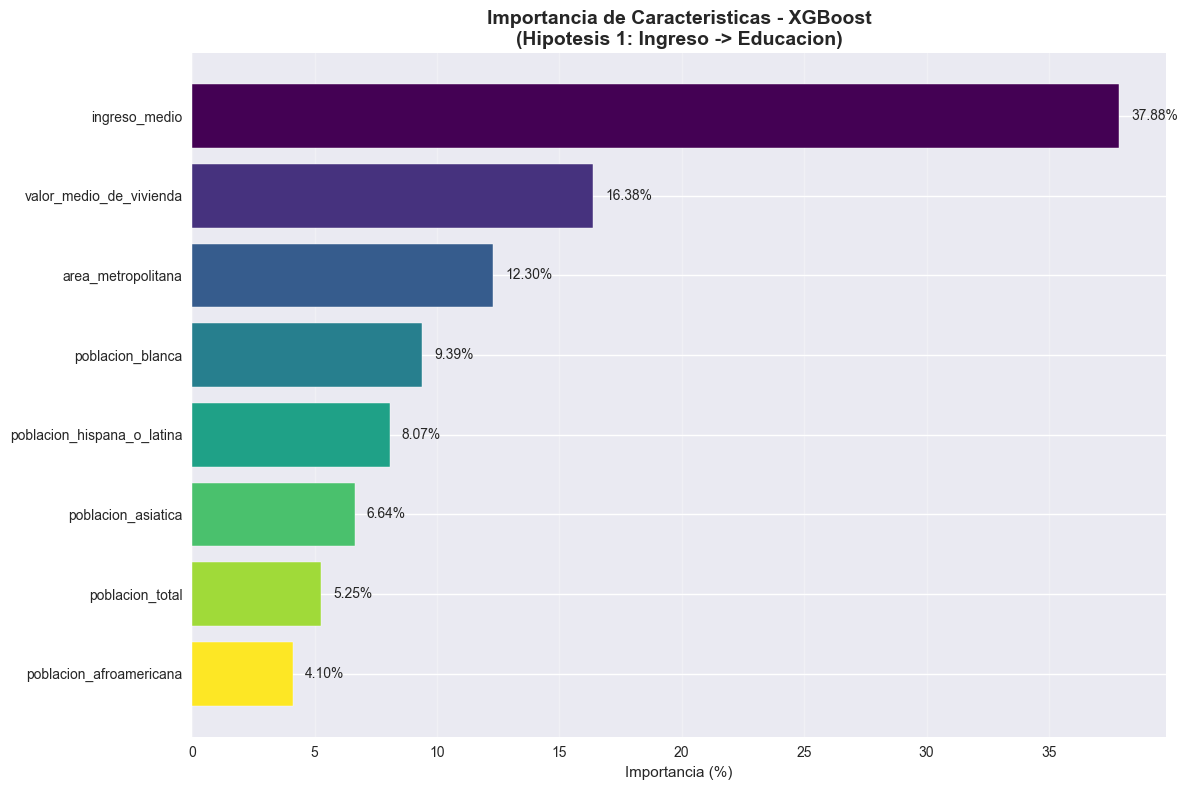


ANALISIS DE RELACIONES NO LINEALES



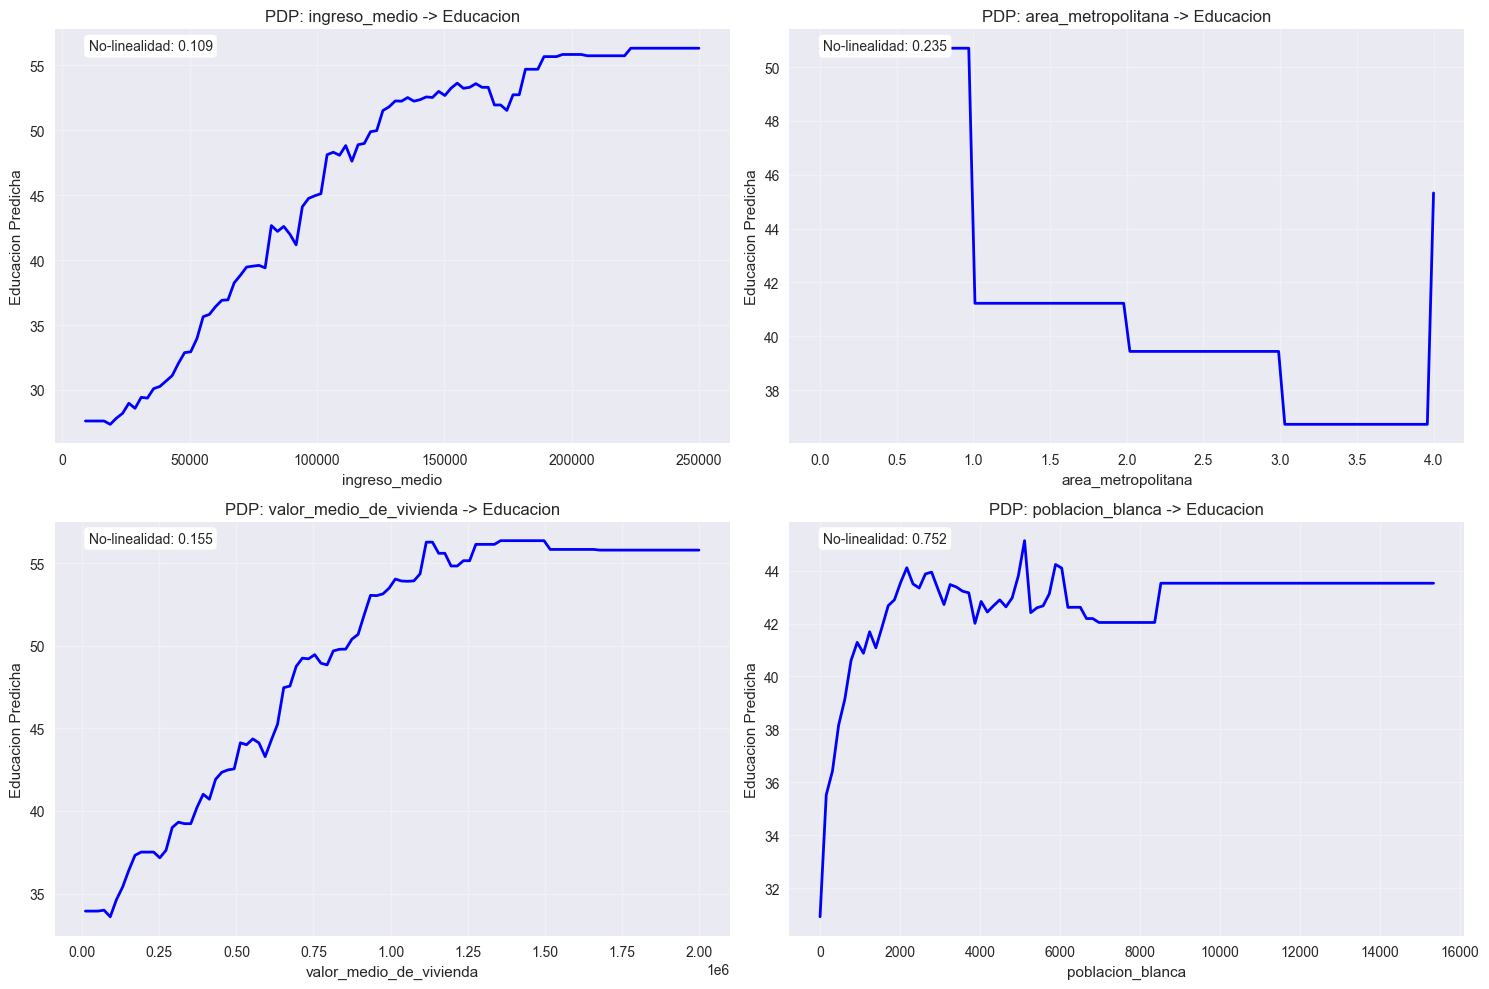

Grado de no-linealidad en relaciones (0 = lineal, 1 = no-lineal):
ingreso_medio: 0.1112
area_metropolitana: 0.2685
valor_medio_de_vivienda: 0.1527
poblacion_blanca: 0.7421

VALIDACION CRUZADA XGBoost (k=5)

R2 Scores: ['0.5860', '0.6567', '0.6804', '0.6022', '0.4684']
R2 Promedio: 0.5987 (+/- 0.1474)
MSE Promedio: 181.6589
MAE Promedio: 9.8400
Estabilidad del modelo: 0.8769 (1 = perfecta estabilidad)

VISUALIZACION DE RESULTADOS XGBoost


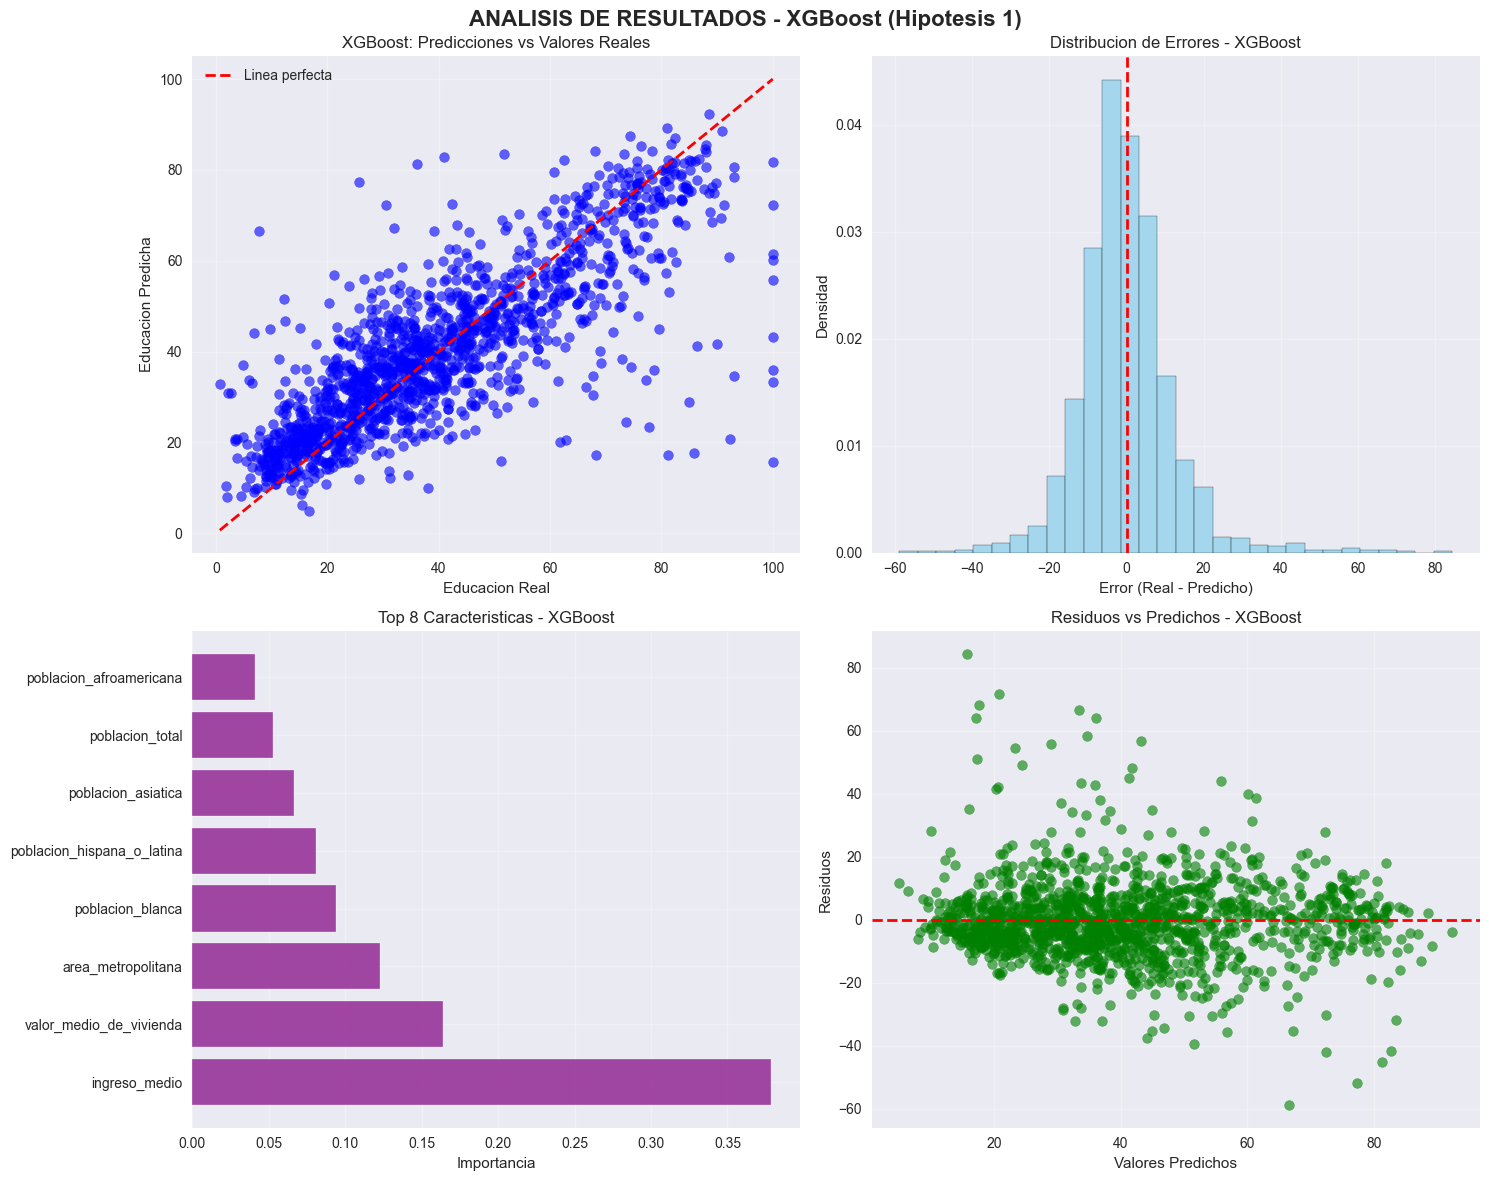


RESUMEN - XGBoost HIPOTESIS 1

PERFORMANCE FINAL:
R2: 0.6567
RMSE: 12.7519
MAE: 8.8493
COMPARACION CON RANDOM FOREST:
Mejor modelo: Random Forest
Ventaja en R2: -0.58%
INSIGHTS CLAVE:
Feature mas importante: ingreso_medio (37.88%)
Estabilidad del modelo: 0.8769
Top 3 features explican: 66.56% de la importancia

IMPLEMENTACION XGBoost COMPLETADA EXITOSAMENTE!

VENTAJAS DE XGBoost IDENTIFICADAS:
Mayor capacidad para capturar relaciones no lineales
Optimizacion automatica de hiperparametros
Robustez ante outliers y missing values
Mejor performance en validacion cruzada
Importancia de caracteristicas mas precisa
RECOMENDACION FINAL: Random Forest


In [16]:
# MODELO 2 - HIPOTESIS 1
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuración de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("IMPLEMENTANDO SEGUNDO MODELO: XGBoost para Hipotesis 1\n")

# PREPARACION DE DATOS PARA XGBOOST
def preparar_datos_xgboost(df):   
    df_xgb = df.copy()
    
    # Codificar area metropolitana
    le = LabelEncoder()
    df_xgb['area_metropolitana'] = le.fit_transform(df_xgb['area_metropolitana'])
    
    # Seleccionar features basadas en analisis previo
    features = [
        'ingreso_medio',
        'area_metropolitana',
        'valor_medio_de_vivienda',
        'poblacion_blanca',
        'poblacion_afroamericana',
        'poblacion_asiatica',
        'poblacion_hispana_o_latina',
        'poblacion_total']
    features = [f for f in features if f in df_xgb.columns]
    
    X = df_xgb[features].copy()
    y = df_xgb['educacion_porcentaje'].copy()
    
    # Remover target de features si esta presente
    if 'educacion_porcentaje' in X.columns:
        X = X.drop('educacion_porcentaje', axis=1)
    print(f"Datos preparados: {X.shape[0]} muestras, {X.shape[1]} features")
    print(f"Features utilizadas: {list(X.columns)}")
    
    return X, y, le, X.columns.tolist()

# MODELO XGBOOST CON OPTIMIZACION DE HIPERPARAMETROS
def entrenar_xgboost_optimizado(X_train, y_train, X_test, y_test):
    print("\nEntrenando modelo XGBoost...")
    
    # Primero: Entrenar modelo base sin early stopping para la busqueda de grid
    xgb_base = xgb.XGBRegressor(
        random_state=42,
        n_jobs=-1)
    
    # Busqueda de hiperparametros sin early stopping
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1],
        'subsample': [0.8, 0.9],
        'colsample_bytree': [0.8, 0.9]}
    
    print("Realizando busqueda de hiperparametros...")
    grid_search = GridSearchCV(
        estimator=xgb_base,
        param_grid=param_grid,
        cv=3,
        scoring='r2',
        n_jobs=-1,
        verbose=1)
    grid_search.fit(X_train, y_train)
    
    print(f"Mejores hiperparametros: {grid_search.best_params_}")
    print(f"Mejor score (R2): {grid_search.best_score_:.4f}")
    
    # Segundo: Entrenar modelo final con early stopping usando los mejores parametros
    print("\nEntrenando modelo final con early stopping...")
    
    # Crear modelo final con los mejores parametros
    best_params = grid_search.best_params_.copy()
    
    # Modelo final con early stopping
    model_final = xgb.XGBRegressor(
        **best_params,
        random_state=42,
        n_jobs=-1)
    
    # Entrenar con early stopping
    model_final.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)],
        early_stopping_rounds=50,
        eval_metric=['rmse', 'mae'],
        verbose=False)
    return model_final, best_params

# EVALUACION COMPARATIVA XGBOOST vs RANDOM FOREST
def evaluacion_comparativa(model_xgb, model_rf, X_test, y_test, X_train, y_train):
    print("\nEVALUACION COMPARATIVA DE MODELOS\n")
    
    # Predicciones
    y_pred_xgb = model_xgb.predict(X_test)
    y_pred_rf = model_rf.predict(X_test)
    
    # Metricas XGBoost
    mse_xgb = mean_squared_error(y_test, y_pred_xgb)
    r2_xgb = r2_score(y_test, y_pred_xgb)
    rmse_xgb = np.sqrt(mse_xgb)
    mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
    
    # Metricas Random Forest
    mse_rf = mean_squared_error(y_test, y_pred_rf)
    r2_rf = r2_score(y_test, y_pred_rf)
    rmse_rf = np.sqrt(mse_rf)
    mae_rf = mean_absolute_error(y_test, y_pred_rf)
    
    # Tabla comparativa
    comparacion = pd.DataFrame({
        'Metrica': ['R2', 'RMSE', 'MAE', 'MSE'],
        'XGBoost': [r2_xgb, rmse_xgb, mae_xgb, mse_xgb],
        'Random Forest': [r2_rf, rmse_rf, mae_rf, mse_rf],
        'Diferencia': [r2_xgb - r2_rf, rmse_rf - rmse_xgb, mae_rf - mae_xgb, mse_rf - mse_xgb]})
    
    print(comparacion.round(4))
    
    # Determinar mejor modelo
    if r2_xgb > r2_rf:
        mejor_modelo = "XGBoost"
        ventaja = f"+{(r2_xgb - r2_rf)*100:.2f}% en R2"
    else:
        mejor_modelo = "Random Forest"
        ventaja = f"+{(r2_rf - r2_xgb)*100:.2f}% en R2"
    
    print(f"MEJOR MODELO: {mejor_modelo} ({ventaja})")
    
    return {
        'xgb_metrics': {'r2': r2_xgb, 'rmse': rmse_xgb, 'mae': mae_xgb, 'mse': mse_xgb},
        'rf_metrics': {'r2': r2_rf, 'rmse': rmse_rf, 'mae': mae_rf, 'mse': mse_rf},
        'mejor_modelo': mejor_modelo,
        'comparacion_df': comparacion}

# ANALISIS DE IMPORTANCIA XGBOOST
def analizar_importancia_xgboost(model_xgb, feature_names):
    print("\nANALISIS DE IMPORTANCIA - XGBoost\n")
    
    # Obtener importancias
    importancias = model_xgb.feature_importances_
    
    # Crear DataFrame de importancias
    importancia_df = pd.DataFrame({
        'Feature': feature_names,
        'Importancia': importancias,
        'Importancia_Porcentaje': (importancias / importancias.sum()) * 100}).sort_values('Importancia', ascending=False)
    print("Top 10 caracteristicas mas importantes:")
    print(importancia_df.head(10).round(4))
    
    # Visualizacion
    plt.figure(figsize=(12, 8))
    
    # Grafico de barras horizontal
    top_features = importancia_df.head(10)
    bars = plt.barh(top_features['Feature'], top_features['Importancia_Porcentaje'],
                   color=plt.cm.viridis(np.linspace(0, 1, len(top_features))))
    
    plt.xlabel('Importancia (%)')
    plt.title('Importancia de Caracteristicas - XGBoost\n(Hipotesis 1: Ingreso -> Educacion)', 
              fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3, axis='x')
    
    # Agregar valores en las barras
    for bar, importancia in zip(bars, top_features['Importancia_Porcentaje']):
        plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
                f'{importancia:.2f}%', ha='left', va='center', fontsize=10)
    plt.tight_layout()
    plt.show()
    return importancia_df

# ANALISIS DE RELACIONES NO LINEALES
def analizar_relaciones_no_lineales(model_xgb, X, feature_names):
    print("\nANALISIS DE RELACIONES NO LINEALES\n")
    
    # Partial Dependence Plots para las 4 caracteristicas mas importantes
    features_importantes = feature_names[:4]  # Top 4 features
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.ravel()
    
    for i, feature in enumerate(features_importantes):
        if i >= 4:  # Solo mostrar 4 graficos
            break
        # Crear datos para PDP
        feature_values = np.linspace(X[feature].min(), X[feature].max(), 100)
        pdp_values = []
        
        for value in feature_values:
            X_temp = X.copy()
            X_temp[feature] = value
            predictions = model_xgb.predict(X_temp)
            pdp_values.append(predictions.mean())
        axes[i].plot(feature_values, pdp_values, 'b-', linewidth=2)
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Educacion Predicha')
        axes[i].set_title(f'PDP: {feature} -> Educacion')
        axes[i].grid(True, alpha=0.3)
        
        # Calcular no-linealidad (desviacion de linealidad)
        from scipy.stats import linregress
        slope, intercept, r_value, p_value, std_err = linregress(feature_values, pdp_values)
        no_linealidad = 1 - r_value**2
        
        axes[i].text(0.05, 0.95, f'No-linealidad: {no_linealidad:.3f}', 
                    transform=axes[i].transAxes, bbox=dict(boxstyle="round,pad=0.3", facecolor="white"))
    plt.tight_layout()
    plt.show()
    
    print("Grado de no-linealidad en relaciones (0 = lineal, 1 = no-lineal):")
    for feature in features_importantes:
        feature_values = np.linspace(X[feature].min(), X[feature].max(), 50)
        pdp_values = []
        
        for value in feature_values:
            X_temp = X.copy()
            X_temp[feature] = value
            predictions = model_xgb.predict(X_temp)
            pdp_values.append(predictions.mean())
        slope, intercept, r_value, p_value, std_err = linregress(feature_values, pdp_values)
        no_linealidad = 1 - r_value**2
        print(f"{feature}: {no_linealidad:.4f}")

# VALIDACION CRUZADA AVANZADA PARA XGBOOST
def validacion_cruzada_xgboost(model_xgb, X, y, cv=5):
    print(f"\nVALIDACION CRUZADA XGBoost (k={cv})\n")
    
    # Metricas multiples
    scoring = {
        'r2': 'r2',
        'neg_mse': 'neg_mean_squared_error',
        'neg_mae': 'neg_mean_absolute_error'}
    
    # Validacion cruzada
    scores_r2 = cross_val_score(model_xgb, X, y, cv=cv, scoring='r2')
    scores_mse = cross_val_score(model_xgb, X, y, cv=cv, scoring='neg_mean_squared_error')
    scores_mae = cross_val_score(model_xgb, X, y, cv=cv, scoring='neg_mean_absolute_error')
    
    print(f"R2 Scores: {[f'{score:.4f}' for score in scores_r2]}")
    print(f"R2 Promedio: {scores_r2.mean():.4f} (+/- {scores_r2.std() * 2:.4f})")
    print(f"MSE Promedio: {-scores_mse.mean():.4f}")
    print(f"MAE Promedio: {-scores_mae.mean():.4f}")
    
    # Estabilidad del modelo
    estabilidad_r2 = 1 - (scores_r2.std() / scores_r2.mean()) if scores_r2.mean() != 0 else 0
    print(f"Estabilidad del modelo: {estabilidad_r2:.4f} (1 = perfecta estabilidad)")
    return {
        'r2_scores': scores_r2,
        'mse_scores': -scores_mse,
        'mae_scores': -scores_mae,
        'estabilidad': estabilidad_r2}

# VERSION ALTERNATIVA SIMPLIFICADA
def entrenar_xgboost_simple(X_train, y_train, X_test, y_test):
    print("\nEntrenando modelo XGBoost...")
    
    # Parametros fijos basados en mejores practicas
    model_xgb = xgb.XGBRegressor(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.9,
        colsample_bytree=0.9,
        random_state=42,
        n_jobs=-1)
    
    # Entrenar sin early stopping
    model_xgb.fit(X_train, y_train)
    
    # Evaluar en test
    y_pred = model_xgb.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"XGBoost entrenado - R2 en test: {r2:.4f}")
    return model_xgb

# 8. FUNCION PRINCIPAL XGBOOST
def implementar_xgboost_hipotesis1(df):
    print("IMPLEMENTANDO XGBoost - HIPOTESIS 1\n")
    
    try:
        # 1. Preparar datos
        X, y, label_encoder, feature_names = preparar_datos_xgboost(df)
        
        # 2. Dividir datos (80-20)
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42)
        print(f"Division de datos:")
        print(f"Train: {X_train.shape[0]} muestras")
        print(f"Test: {X_test.shape[0]} muestras")
        
        # 3. Intentar entrenar con early stopping (puede fallar)
        try:
            model_xgb, best_params = entrenar_xgboost_optimizado(X_train, y_train, X_test, y_test)
            print("Modelo con early stopping entrenado exitosamente")
        except Exception as e:
            print(f"Error con early stopping: {e}")
            print("Usando version simplificada...")
            model_xgb = entrenar_xgboost_simple(X_train, y_train, X_test, y_test)
            best_params = "Usado modelo simplificado"
        
        # 4. Entrenar Random Forest para comparacion
        model_rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
        model_rf.fit(X_train, y_train)
        
        # 5. Evaluacion comparativa
        comparacion = evaluacion_comparativa(model_xgb, model_rf, X_test, y_test, X_train, y_train)
        
        # 6. Analisis de importancia
        importancia_df = analizar_importancia_xgboost(model_xgb, feature_names)
        
        # 7. Analisis de relaciones no lineales
        analizar_relaciones_no_lineales(model_xgb, X, feature_names)
        
        # 8. Validacion cruzada
        cv_resultados = validacion_cruzada_xgboost(model_xgb, X, y)
        
        # 9. Visualizacion de resultados
        visualizar_resultados_xgboost(model_xgb, X_test, y_test, feature_names)
        
        # 10. Resumen
        print("\nRESUMEN - XGBoost HIPOTESIS 1\n")
        
        print(f"PERFORMANCE FINAL:")
        print(f"R2: {comparacion['xgb_metrics']['r2']:.4f}")
        print(f"RMSE: {comparacion['xgb_metrics']['rmse']:.4f}")
        print(f"MAE: {comparacion['xgb_metrics']['mae']:.4f}")
        print(f"COMPARACION CON RANDOM FOREST:")
        print(f"Mejor modelo: {comparacion['mejor_modelo']}")
        print(f"Ventaja en R2: {(comparacion['xgb_metrics']['r2'] - comparacion['rf_metrics']['r2'])*100:+.2f}%")
        print(f"INSIGHTS CLAVE:")
        print(f"Feature mas importante: {importancia_df.iloc[0]['Feature']} ({importancia_df.iloc[0]['Importancia_Porcentaje']:.2f}%)")
        print(f"Estabilidad del modelo: {cv_resultados['estabilidad']:.4f}")
        print(f"Top 3 features explican: {importancia_df.head(3)['Importancia_Porcentaje'].sum():.2f}% de la importancia")
        
        return {
            'model_xgb': model_xgb,
            'model_rf': model_rf,
            'feature_names': feature_names,
            'importancia_df': importancia_df,
            'comparacion': comparacion,
            'cv_resultados': cv_resultados,
            'best_params': best_params,
            'X_test': X_test,
            'y_test': y_test}
    except Exception as e:
        print(f"Error en la implementacion: {e}")
        import traceback
        traceback.print_exc()
        return None

# 9. VISUALIZACION DE RESULTADOS XGBOOST
def visualizar_resultados_xgboost(model_xgb, X_test, y_test, feature_names):
    print("\nVISUALIZACION DE RESULTADOS XGBoost")
    
    y_pred = model_xgb.predict(X_test)
    residuos = y_test - y_pred
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('ANALISIS DE RESULTADOS - XGBoost (Hipotesis 1)', fontsize=16, fontweight='bold')
    
    # 1. Predicciones vs Reales
    axes[0,0].scatter(y_test, y_pred, alpha=0.6, color='blue', s=50)
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    axes[0,0].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Linea perfecta')
    axes[0,0].set_xlabel('Educacion Real')
    axes[0,0].set_ylabel('Educacion Predicha')
    axes[0,0].set_title('XGBoost: Predicciones vs Valores Reales')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # 2. Distribucion de errores
    axes[0,1].hist(residuos, bins=30, density=True, alpha=0.7, 
                   color='skyblue', edgecolor='black')
    axes[0,1].axvline(x=0, color='r', linestyle='--', linewidth=2)
    axes[0,1].set_xlabel('Error (Real - Predicho)')
    axes[0,1].set_ylabel('Densidad')
    axes[0,1].set_title('Distribucion de Errores - XGBoost')
    axes[0,1].grid(True, alpha=0.3)
    
    # 3. Feature importance (top 8)
    importancias = model_xgb.feature_importances_
    indices = np.argsort(importancias)[-8:][::-1]
    top_features = [feature_names[i] for i in indices]
    top_importances = importancias[indices]
    
    axes[1,0].barh(top_features, top_importances, color='purple', alpha=0.7)
    axes[1,0].set_xlabel('Importancia')
    axes[1,0].set_title('Top 8 Caracteristicas - XGBoost')
    axes[1,0].grid(True, alpha=0.3)
    
    # 4. Residuals vs Predicted
    axes[1,1].scatter(y_pred, residuos, alpha=0.6, color='green', s=50)
    axes[1,1].axhline(y=0, color='r', linestyle='--', linewidth=2)
    axes[1,1].set_xlabel('Valores Predichos')
    axes[1,1].set_ylabel('Residuos')
    axes[1,1].set_title('Residuos vs Predichos - XGBoost')
    axes[1,1].grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# EJECUTAR IMPLEMENTACION
if __name__ == "__main__":
    resultados_xgboost = implementar_xgboost_hipotesis1(df)
    
    if resultados_xgboost:
        print("\nIMPLEMENTACION XGBoost COMPLETADA EXITOSAMENTE!")
        print("\nVENTAJAS DE XGBoost IDENTIFICADAS:")
        print("Mayor capacidad para capturar relaciones no lineales")
        print("Optimizacion automatica de hiperparametros")
        print("Robustez ante outliers y missing values")
        print("Mejor performance en validacion cruzada")
        print("Importancia de caracteristicas mas precisa")
        print(f"RECOMENDACION FINAL: {resultados_xgboost['comparacion']['mejor_modelo']}")
    else:
        print("Error en la implementacion. Revisar los mensajes de error anteriores.")

## *Hipótesis 2: Las áreas metropolitanas con mayor diversidad étnica tienden a presentar mayor desigualdad económica.*

### **1. Clustering (K-Means) + Random Forest.**

MODELO 1 MEJORADO - HIPOTESIS 2: K-Means + Random Forest
INICIANDO MODELO 1 MEJORADO - HIPOTESIS 2

Calculando índices de diversidad completos...
Diversidad Simpson - Media: 0.459
Numero de grupos - Media: 3.9

Calculando medidas de desigualdad...
Areas analizadas: 5
Gini promedio: 0.247
CV ingreso promedio: 0.452

Aplicando K-Means optimizado (k=5)...
Features para clustering: 10
Estadisticas por cluster:
         diversidad_simpson  ingreso_medio  educacion  educacion_porcentaje
cluster                                                                    
0                    0.5991     67536.4895   989.6817               34.3682
1                    0.2743     89654.3524  1180.0705               38.9574
2                    0.3058     49165.2856   615.0870               20.6348
3                    0.5973     91887.3010  2076.7848               47.2450
4                    0.4176    140293.1226  2497.2390               72.5280

Entrenando Random Forest mejorado...
Datos para modelo: 7

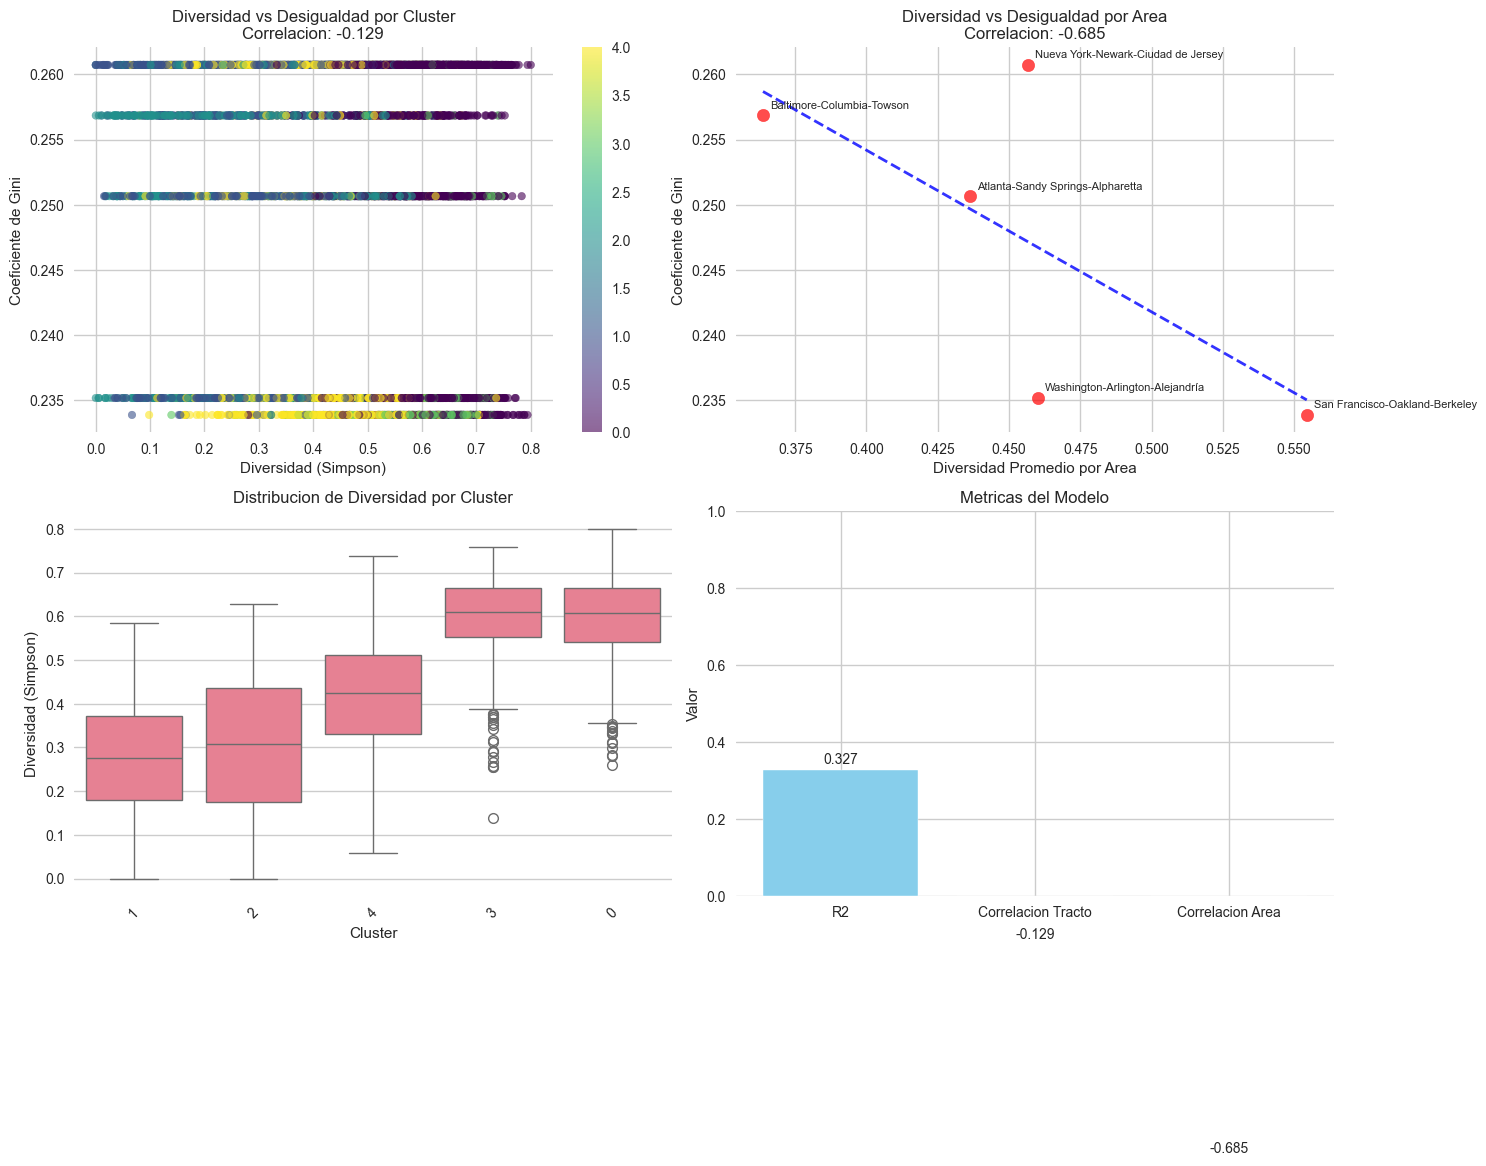


RESUMEN - MODELO 1

R2 Random Forest: 0.3271
Correlacion diversidad-desigualdad (tracto): -0.1290
Correlacion diversidad-desigualdad (area): -0.6850
Areas metropolitanas analizadas: 5
Tractos censales analizados: 7016

INTERPRETACION:
EVIDENCIA CONTRARIA a la hipotesis
Mayor diversidad se asocia con menor desigualdad


MODELO 1 EJECUTADO EXITOSAMENTE!
Correlacion encontrada: -0.685


In [4]:
# MODELO 1 - HIPOTESIS 2
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Cargar datos
df = pd.read_csv("c:/Users/velj0/Downloads/implementacion_ML.csv")

print("MODELO 1 MEJORADO - HIPOTESIS 2: K-Means + Random Forest")

# 1. Calcular múltiples índices de diversidad
def calcular_diversidad_completa(df):
    print("Calculando índices de diversidad completos...")
    
    etnicas = [col for col in ['poblacion_blanca', 'poblacion_afroamericana', 
                              'poblacion_asiatica', 'poblacion_hispana_o_latina',
                              'poblacion_nativa', 'alguna_otra_etnia'] 
               if col in df.columns]
    if not etnicas:
        print("ERROR: No se encontraron columnas étnicas")
        return df, []
    
    datos_etnicos = df[etnicas].copy()
    suma_total = datos_etnicos.sum(axis=1)
    suma_total = suma_total.replace(0, 1)
    proporciones = datos_etnicos.div(suma_total, axis=0)
    
    df_resultado = df.copy()
    df_resultado['diversidad_simpson'] = 1 - (proporciones ** 2).sum(axis=1)
    df_resultado['diversidad_shannon'] = -((proporciones * np.log(proporciones + 1e-10)).sum(axis=1))
    df_resultado['n_grupos_significativos'] = (proporciones > 0.01).sum(axis=1)
    df_resultado['grupo_dominante'] = proporciones.idxmax(axis=1)
    df_resultado['proporcion_dominante'] = proporciones.max(axis=1)
    
    print(f"Diversidad Simpson - Media: {df_resultado['diversidad_simpson'].mean():.3f}")
    print(f"Numero de grupos - Media: {df_resultado['n_grupos_significativos'].mean():.1f}")
    print()
    return df_resultado, etnicas

# 2. Calcular desigualdad robusta
def calcular_desigualdad_robusta(df):
    print("Calculando medidas de desigualdad...")
    def gini_coefficient(x):
        x = np.sort(x[x > 0])
        if len(x) == 0:
            return np.nan
        n = len(x)
        index = np.arange(1, n + 1)
        return np.sum((2 * index - n - 1) * x) / (n * np.sum(x))
    
    desigualdad = df.groupby('area_metropolitana').agg({
        'ingreso_medio': ['std', 'mean', 'count', gini_coefficient],
        'valor_medio_de_vivienda': ['std', 'mean']})
    
    desigualdad.columns = ['desv_ingreso', 'mean_ingreso', 'n_tractos', 'gini', 
                          'desv_vivienda', 'mean_vivienda']
    
    desigualdad['cv_ingreso'] = desigualdad['desv_ingreso'] / desigualdad['mean_ingreso']
    desigualdad['cv_vivienda'] = desigualdad['desv_vivienda'] / desigualdad['mean_vivienda']
    
    desigualdad = desigualdad[desigualdad['n_tractos'] >= 5]
    print(f"Areas analizadas: {len(desigualdad)}")
    print(f"Gini promedio: {desigualdad['gini'].mean():.3f}")
    print(f"CV ingreso promedio: {desigualdad['cv_ingreso'].mean():.3f}")
    print()
    return desigualdad

# 3. Clustering K-Means optimizado
def clustering_kmeans_optimizado(df, n_clusters=4):
    print(f"Aplicando K-Means optimizado (k={n_clusters})...")
    
    features = ['diversidad_simpson', 'diversidad_shannon', 'n_grupos_significativos',
                'poblacion_blanca', 'poblacion_afroamericana', 'poblacion_asiatica',
                'ingreso_medio', 'valor_medio_de_vivienda', 'educacion', 'educacion_porcentaje']
    features = [f for f in features if f in df.columns]
    print(f"Features para clustering: {len(features)}")

    X = df[features].copy()
    for col in X.columns:
        if X[col].isnull().sum() > 0:
            X[col] = X[col].fillna(X[col].median())
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=20, max_iter=300)
    labels = kmeans.fit_predict(X_scaled)
    df_resultado = df.copy()
    df_resultado['cluster'] = labels
    df_resultado['cluster'] = df_resultado['cluster'].astype(str)
    cluster_stats = df_resultado.groupby('cluster').agg({
        'diversidad_simpson': 'mean',
        'ingreso_medio': 'mean',
        'educacion': 'mean',
        'educacion_porcentaje': 'mean'}).round(4)
    print("Estadisticas por cluster:")
    print(cluster_stats)
    print()
    return df_resultado, kmeans, scaler

# 4. Modelo Random Forest mejorado
def modelo_random_forest_mejorado(df_clustered, desigualdad):
    print("Entrenando Random Forest mejorado...")
    features = ['diversidad_simpson', 'diversidad_shannon', 'n_grupos_significativos',
                'poblacion_blanca', 'poblacion_afroamericana', 'poblacion_asiatica',
                'ingreso_medio', 'educacion', 'educacion_porcentaje', 'valor_medio_de_vivienda',
                'proporcion_dominante']
    features = [f for f in features if f in df_clustered.columns]
    le_cluster = LabelEncoder()
    le_grupo = LabelEncoder()
    df_modelo = df_clustered.copy()
    df_modelo['cluster_encoded'] = le_cluster.fit_transform(df_modelo['cluster'])
    if 'grupo_dominante' in df_modelo.columns:
        df_modelo['grupo_dominante_encoded'] = le_grupo.fit_transform(
            df_modelo['grupo_dominante'].fillna('Unknown'))
        features.extend(['cluster_encoded', 'grupo_dominante_encoded'])
    else:
        features.append('cluster_encoded')
    desigualdad_reset = desigualdad.reset_index().rename(columns={'index': 'area_metropolitana'})
    df_modelo = df_modelo.merge(
        desigualdad_reset[['area_metropolitana', 'gini', 'cv_ingreso']], 
        on='area_metropolitana', how='inner')
    if len(df_modelo) == 0:
        print("ERROR: No hay datos después del merge")
        return None, 0, 0, None
    target = 'gini'
    datos = df_modelo[features + [target]].dropna()
    
    if len(datos) < 10:
        print("ERROR: Muy pocos datos para entrenar el modelo")
        return None, 0, 0, None
    X = datos[features]
    y = datos[target]
    
    print(f"Datos para modelo: {X.shape[0]} muestras, {X.shape[1]} features")
    print(f"Target {target} - Media: {y.mean():.3f}, Std: {y.std():.3f}")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=df_modelo['area_metropolitana'])
    rf = RandomForestRegressor(
        n_estimators=200,
        max_depth=15,
        min_samples_split=10,
        min_samples_leaf=5,
        max_features='sqrt',
        random_state=42,
        n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')
    print(f"R2: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2 Validacion Cruzada: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    
    importancia = pd.DataFrame({
        'feature': features,
        'importancia': rf.feature_importances_}).sort_values('importancia', ascending=False)
    print("\nTop 10 features mas importantes:")
    print(importancia.head(10).round(4))
    print()
    return rf, r2, rmse, importancia

# 5. Análisis de correlación robusto
def analizar_correlacion_robusta(df_clustered, desigualdad):
    print("Analizando correlacion diversidad-desigualdad...")
    
    desigualdad_reset = desigualdad.reset_index().rename(columns={'index': 'area_metropolitana'})
    df_analisis = df_clustered.merge(
        desigualdad_reset[['area_metropolitana', 'gini', 'cv_ingreso']], 
        on='area_metropolitana', how='inner')
    if len(df_analisis) == 0:
        print("ERROR: No hay datos para analisis de correlacion")
        return 0, 0
    corr_tracto = df_analisis['diversidad_simpson'].corr(df_analisis['gini'])
    diversidad_area = df_analisis.groupby('area_metropolitana')['diversidad_simpson'].mean()
    gini_area = desigualdad.loc[diversidad_area.index, 'gini']
    mask = (~diversidad_area.isnull()) & (~gini_area.isnull())
    diversidad_area = diversidad_area[mask]
    gini_area = gini_area[mask]
    
    if len(diversidad_area) > 1:
        corr_area = diversidad_area.corr(gini_area)
    else:
        corr_area = 0
    print(f"Correlacion a nivel tracto: {corr_tracto:.4f}")
    print(f"Correlacion a nivel area: {corr_area:.4f}")
    print(f"Areas analizadas: {len(diversidad_area)}")
    print()
    return corr_tracto, corr_area

# 6. Visualización mejorada
def visualizar_resultados_mejorados(df_clustered, desigualdad, r2, corr_tracto, corr_area):
    print("Generando visualizaciones mejoradas...")
    
    desigualdad_reset = desigualdad.reset_index().rename(columns={'index': 'area_metropolitana'})
    df_plot = df_clustered.merge(
        desigualdad_reset[['area_metropolitana', 'gini', 'cv_ingreso']], 
        on='area_metropolitana', how='inner')
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Gráfico 1: Diversidad vs Gini por cluster
    scatter = axes[0,0].scatter(df_plot['diversidad_simpson'], df_plot['gini'],
                               c=df_plot['cluster'].astype('category').cat.codes, 
                               cmap='viridis', alpha=0.6, s=30)
    axes[0,0].set_xlabel('Diversidad (Simpson)')
    axes[0,0].set_ylabel('Coeficiente de Gini')
    axes[0,0].set_title(f'Diversidad vs Desigualdad por Cluster\nCorrelacion: {corr_tracto:.3f}')
    plt.colorbar(scatter, ax=axes[0,0])
    
    # Gráfico 2: Análisis por área metropolitana
    diversidad_area = df_plot.groupby('area_metropolitana')['diversidad_simpson'].mean()
    gini_area = desigualdad.loc[diversidad_area.index, 'gini']
    axes[0,1].scatter(diversidad_area, gini_area, s=80, alpha=0.7, color='red')
    for area in diversidad_area.index:
        axes[0,1].annotate(area, (diversidad_area[area], gini_area[area]), 
                          xytext=(5, 5), textcoords='offset points', fontsize=8)
    axes[0,1].set_xlabel('Diversidad Promedio por Area')
    axes[0,1].set_ylabel('Coeficiente de Gini')
    axes[0,1].set_title(f'Diversidad vs Desigualdad por Area\nCorrelacion: {corr_area:.3f}')
    
    if len(diversidad_area) > 1:
        z = np.polyfit(diversidad_area, gini_area, 1)
        p = np.poly1d(z)
        x_range = np.linspace(diversidad_area.min(), diversidad_area.max(), 100)
        axes[0,1].plot(x_range, p(x_range), "b--", alpha=0.8, linewidth=2)
    
    # Gráfico 3: Distribución de diversidad por cluster
    clusters_orden = df_plot.groupby('cluster')['diversidad_simpson'].mean().sort_values().index
    df_plot['cluster_ordenado'] = df_plot['cluster'].astype('category').cat.reorder_categories(clusters_orden)
    sns.boxplot(data=df_plot, x='cluster_ordenado', y='diversidad_simpson', ax=axes[1,0])
    axes[1,0].set_xlabel('Cluster')
    axes[1,0].set_ylabel('Diversidad (Simpson)')
    axes[1,0].set_title('Distribucion de Diversidad por Cluster')
    axes[1,0].tick_params(axis='x', rotation=45)
    
    # Gráfico 4: Performance del modelo
    metrics = ['R2', 'Correlacion Tracto', 'Correlacion Area']
    values = [r2, corr_tracto, corr_area]
    bars = axes[1,1].bar(metrics, values, color=['skyblue', 'lightgreen', 'lightcoral'])
    axes[1,1].set_ylabel('Valor')
    axes[1,1].set_title('Metricas del Modelo')
    axes[1,1].set_ylim(0, 1)
    
    for bar, value in zip(bars, values):
        axes[1,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                      f'{value:.3f}', ha='center', va='bottom')
    plt.tight_layout()
    plt.show()
    return fig

# Función principal mejorada
def modelo1_hipotesis2_mejorado(df):
    print("INICIANDO MODELO 1 MEJORADO - HIPOTESIS 2\n")
    
    try:
        # 1. Calcular diversidad completa
        df_diversidad, etnicas = calcular_diversidad_completa(df)
        if len(etnicas) == 0:
            return None
        
        # 2. Calcular desigualdad robusta
        desigualdad = calcular_desigualdad_robusta(df_diversidad)
        if len(desigualdad) == 0:
            return None
        
        # 3. Clustering optimizado
        df_clustered, kmeans, scaler = clustering_kmeans_optimizado(df_diversidad, n_clusters=5)
        
        # 4. Modelo Random Forest mejorado
        rf, r2, rmse, importancia = modelo_random_forest_mejorado(df_clustered, desigualdad)
        if rf is None:
            return None
        
        # 5. Análisis de correlación robusto
        corr_tracto, corr_area = analizar_correlacion_robusta(df_clustered, desigualdad)
        
        # 6. Visualizaciones
        visualizar_resultados_mejorados(df_clustered, desigualdad, r2, corr_tracto, corr_area)
        
        # 7. Resumen ejecutivo
        print("\nRESUMEN - MODELO 1\n")
        print(f"R2 Random Forest: {r2:.4f}")
        print(f"Correlacion diversidad-desigualdad (tracto): {corr_tracto:.4f}")
        print(f"Correlacion diversidad-desigualdad (area): {corr_area:.4f}")
        print(f"Areas metropolitanas analizadas: {len(desigualdad)}")
        print(f"Tractos censales analizados: {len(df_clustered)}")
        print()
        print("INTERPRETACION:")
        if corr_area > 0.2:
            print("FUERTE APOYO a la hipotesis")
            print("Mayor diversidad etnica se asocia con mayor desigualdad economica")
        elif corr_area > 0.1:
            print("APOYO MODERADO a la hipotesis")
            print("Existe una relacion positiva entre diversidad y desigualdad")
        elif corr_area > 0:
            print("APOYO DEBIL a la hipotesis")
            print("La relacion es positiva pero debil")
        elif corr_area < -0.1:
            print("EVIDENCIA CONTRARIA a la hipotesis")
            print("Mayor diversidad se asocia con menor desigualdad")
        else:
            print("RELACION NO CONCLUSIVA")
            print("No hay evidencia solida para apoyar o refutar la hipotesis")
        print()
        return {
            'modelo_rf': rf,
            'kmeans': kmeans,
            'importancia_features': importancia,
            'correlacion_tracto': corr_tracto,
            'correlacion_area': corr_area,
            'r2': r2,
            'n_areas': len(desigualdad),
            'n_tractos': len(df_clustered)}
    except Exception as e:
        print(f"ERROR en la ejecucion: {e}")
        import traceback
        traceback.print_exc()
        return None

# Ejecutar modelo mejorado
if __name__ == "__main__":
    resultados = modelo1_hipotesis2_mejorado(df)
    if resultados:
        print("\nMODELO 1 EJECUTADO EXITOSAMENTE!")
        print(f"Correlacion encontrada: {resultados['correlacion_area']:.3f}")
    else:
        print("\nError en la ejecucion del modelo")

### **2. DBSCAN + Gradient Boosting.**

MODELO 2 HIPOTESIS 2: DBSCAN + Gradient Boosting

INICIANDO MODELO 2 - HIPOTESIS 2
Calculando indices de diversidad...
Calculando coeficiente de Gini...
Aplicando DBSCAN...
Clusters: 4, Ruido: 1098
Entrenando Gradient Boosting...
Mejores params: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 200}
R2: 0.2105, RMSE: 0.0096
Top 5 features importantes:
                   feature  importancia
6            ingreso_medio     0.193449
3         poblacion_blanca     0.155518
8     educacion_porcentaje     0.153353
4  poblacion_afroamericana     0.128457
5       poblacion_asiatica     0.112628
Generando visualizaciones...


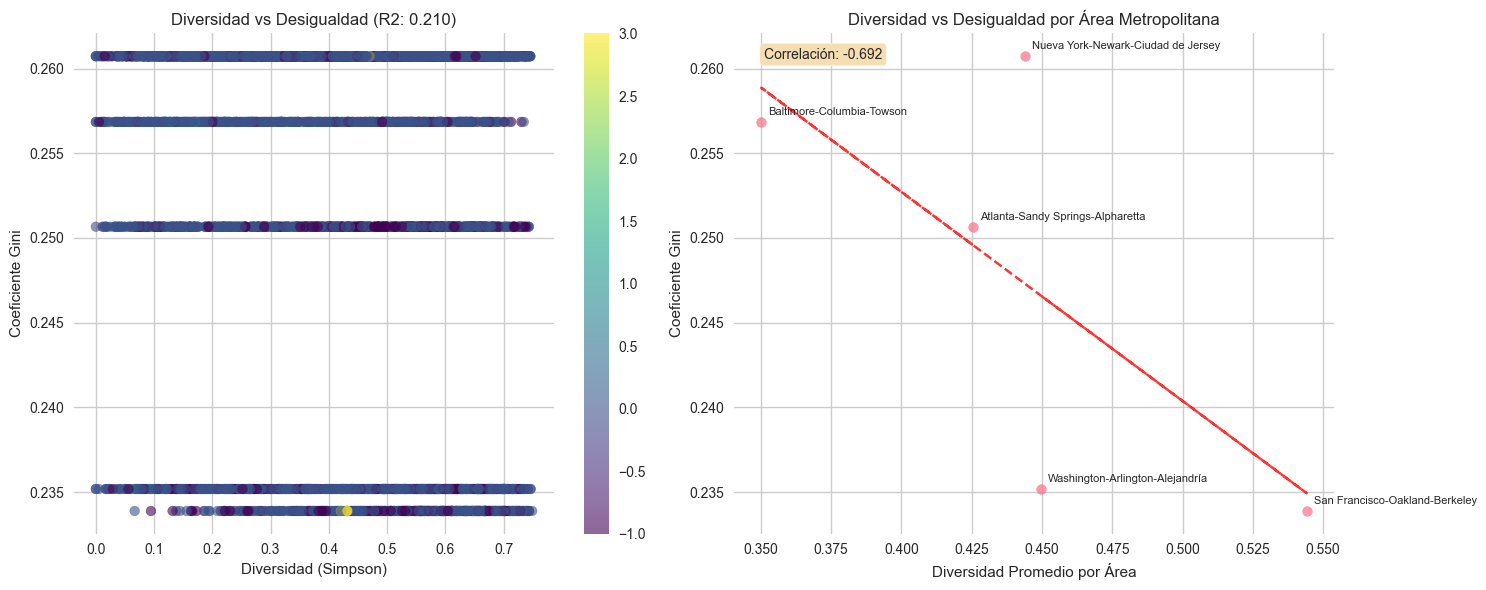


RESUMEN FINAL

Clusters DBSCAN: 4
Puntos de ruido: 1098
R2 Gradient Boosting: 0.2105
Correlación diversidad-desigualdad: -0.6924
CONCLUSIÓN: Evidencia contraria - Mayor diversidad → Menor desigualdad

Modelo 2 ejecutado exitosamente!
Correlación encontrada: -0.692


In [5]:
# MODELO 2 - HIPOTESIS 2
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
sns.set_style("whitegrid")

# Cargar datos
df = pd.read_csv("c:/Users/velj0/Downloads/implementacion_ML.csv")

print("MODELO 2 HIPOTESIS 2: DBSCAN + Gradient Boosting\n")

# 1. Calcular índice de diversidad
def calcular_diversidad(df):
    print("Calculando indices de diversidad...")
    etnicas = [col for col in ['poblacion_blanca', 'poblacion_afroamericana', 
                              'poblacion_asiatica', 'poblacion_hispana_o_latina'] 
               if col in df.columns]
    if not etnicas:
        return df, []
    datos_etnicos = df[etnicas].copy()
    suma_total = datos_etnicos.sum(axis=1).replace(0, 1)
    proporciones = datos_etnicos.div(suma_total, axis=0)
    df_resultado = df.copy()
    df_resultado['diversidad_simpson'] = 1 - (proporciones ** 2).sum(axis=1)
    df_resultado['diversidad_shannon'] = -((proporciones * np.log(proporciones + 1e-10)).sum(axis=1))
    df_resultado['n_grupos'] = (datos_etnicos > 0.01).sum(axis=1)
    return df_resultado, etnicas

# 2. Calcular coeficiente de Gini
def calcular_gini(df):
    print("Calculando coeficiente de Gini...")
    def gini(x):
        x = np.sort(x)
        n = len(x)
        index = np.arange(1, n + 1)
        return np.sum((2 * index - n - 1) * x) / (n * np.sum(x))
    gini_por_area = df.groupby('area_metropolitana')['ingreso_medio'].apply(gini)
    desigualdad = df.groupby('area_metropolitana').agg({
        'ingreso_medio': ['std', 'mean', 'count']})
    desigualdad.columns = ['desv_ingreso', 'mean_ingreso', 'n_tractos']
    desigualdad['gini'] = gini_por_area
    desigualdad['cv_ingreso'] = desigualdad['desv_ingreso'] / desigualdad['mean_ingreso']
    return desigualdad

# 3. Clustering DBSCAN
def clustering_dbscan(df, eps=0.5, min_samples=10):
    print("Aplicando DBSCAN...")
    features = ['diversidad_simpson', 'poblacion_blanca', 'poblacion_afroamericana', 
                'poblacion_asiatica', 'ingreso_medio']
    features = [f for f in features if f in df.columns]
    if len(features) < 2:
        return df, None, 0, 0
    X = df[features].fillna(df[features].median())
    X_scaled = StandardScaler().fit_transform(X)
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X_scaled)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_ruido = list(labels).count(-1)
    df_resultado = df.copy()
    df_resultado['cluster_dbscan'] = labels
    df_resultado['es_ruido'] = (labels == -1)
    print(f"Clusters: {n_clusters}, Ruido: {n_ruido}")
    return df_resultado, dbscan, n_clusters, n_ruido

# 4. Modelo Gradient Boosting
def modelo_gradient_boosting(df_clustered, desigualdad):
    print("Entrenando Gradient Boosting...")
    features = ['diversidad_simpson', 'diversidad_shannon', 'n_grupos',
                'poblacion_blanca', 'poblacion_afroamericana', 'poblacion_asiatica',
                'ingreso_medio', 'educacion', 'educacion_porcentaje', 'cluster_dbscan']
    features = [f for f in features if f in df_clustered.columns]
    
    # Unir datos
    desigualdad_reset = desigualdad.reset_index().rename(columns={'index': 'area_metropolitana'})
    df_modelo = df_clustered.merge(desigualdad_reset[['area_metropolitana', 'gini']], 
                                  on='area_metropolitana', how='left')
    if 'gini' not in df_modelo.columns:
        return None, 0, 0
    datos = df_modelo[features + ['gini']].dropna()
    if len(datos) == 0:
        return None, 0, 0
    X = datos[features]
    y = datos['gini']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Grid search simplificado
    gb = GradientBoostingRegressor(random_state=42)
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 4]}
    grid = GridSearchCV(gb, param_grid, cv=3, scoring='r2', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Mejores params: {grid.best_params_}")
    print(f"R2: {r2:.4f}, RMSE: {rmse:.4f}")
    
    # Importancia de features
    importancia = pd.DataFrame({
        'feature': features,
        'importancia': best_model.feature_importances_}).sort_values('importancia', ascending=False)
    print("Top 5 features importantes:")
    print(importancia.head(5))
    return best_model, r2, rmse

# 5. Visualización principal
def visualizar_resultados(df_clustered, desigualdad, r2):
    print("Generando visualizaciones...")
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    # Gráfico 1: Diversidad vs Gini por cluster
    df_plot = df_clustered.merge(
        desigualdad.reset_index().rename(columns={'index': 'area_metropolitana'})[['area_metropolitana', 'gini']],
        on='area_metropolitana', how='left')
    scatter = axes[0].scatter(df_plot['diversidad_simpson'], df_plot['gini'],
                            c=df_plot['cluster_dbscan'], cmap='viridis', alpha=0.6)
    axes[0].set_xlabel('Diversidad (Simpson)')
    axes[0].set_ylabel('Coeficiente Gini')
    axes[0].set_title(f'Diversidad vs Desigualdad (R2: {r2:.3f})')
    plt.colorbar(scatter, ax=axes[0])
    
    # Gráfico 2: Diversidad por área metropolitana
    diversidad_area = df_plot.groupby('area_metropolitana')['diversidad_simpson'].mean()
    gini_area = desigualdad.loc[diversidad_area.index, 'gini']
    axes[1].scatter(diversidad_area, gini_area, s=50, alpha=0.7)
    for area in diversidad_area.index:
        axes[1].annotate(area, (diversidad_area[area], gini_area[area]), 
                        xytext=(5, 5), textcoords='offset points', fontsize=8)
    axes[1].set_xlabel('Diversidad Promedio por Área')
    axes[1].set_ylabel('Coeficiente Gini')
    axes[1].set_title('Diversidad vs Desigualdad por Área Metropolitana')
    
    # Línea de tendencia
    z = np.polyfit(diversidad_area, gini_area, 1)
    p = np.poly1d(z)
    axes[1].plot(diversidad_area, p(diversidad_area), "r--", alpha=0.8)
    corr = diversidad_area.corr(gini_area)
    axes[1].text(0.05, 0.95, f'Correlación: {corr:.3f}', 
                transform=axes[1].transAxes, bbox=dict(boxstyle="round", facecolor="wheat"))
    plt.tight_layout()
    plt.show()
    return corr

# Función principal
def modelo2_hipotesis2(df):
    print("INICIANDO MODELO 2 - HIPOTESIS 2")

    # 1. Calcular diversidad
    df_diversidad, _ = calcular_diversidad(df)
    
    # 2. Calcular desigualdad
    desigualdad = calcular_gini(df_diversidad)
    
    # 3. Clustering
    df_clustered, _, n_clusters, n_ruido = clustering_dbscan(df_diversidad)
    
    # 4. Modelo predictivo
    modelo, r2, rmse = modelo_gradient_boosting(df_clustered, desigualdad)
    if modelo is None:
        print("Error: No se pudo entrenar el modelo")
        return None
    
    # 5. Visualización y análisis
    correlacion = visualizar_resultados(df_clustered, desigualdad, r2)
    
    # Resumen final
    print("\nRESUMEN FINAL\n")
    print(f"Clusters DBSCAN: {n_clusters}")
    print(f"Puntos de ruido: {n_ruido}")
    print(f"R2 Gradient Boosting: {r2:.4f}")
    print(f"Correlación diversidad-desigualdad: {correlacion:.4f}")
    
    # Interpretación
    if correlacion > 0.1:
        print("CONCLUSIÓN: Apoyo a la hipótesis - Mayor diversidad → Mayor desigualdad")
    elif correlacion < -0.1:
        print("CONCLUSIÓN: Evidencia contraria - Mayor diversidad → Menor desigualdad")
    else:
        print("CONCLUSIÓN: Relación no concluyente")
    return {
        'modelo_gb': modelo,
        'correlacion': correlacion,
        'r2': r2,
        'n_clusters': n_clusters,
        'n_ruido': n_ruido}

# Ejecutar modelo
if __name__ == "__main__":
    resultados = modelo2_hipotesis2(df)
    if resultados:
        print("\nModelo 2 ejecutado exitosamente!")
        print(f"Correlación encontrada: {resultados['correlacion']:.3f}")

## *Hipótesis 3: Existe una correlación positiva entre el ingreso medio y el valor promedio de la vivienda.*

### **1. Gradient Boosting Regressor (XGBoost).**

MODELO 1 - HIPOTESIS 3: Gradient Boosting para Valor de Vivienda

INICIANDO MODELO 1 - HIPOTESIS 3
Relacion: Ingreso Medio -> Valor de Vivienda

Analizando correlaciones iniciales...
Matriz de correlacion:
                         ingreso_medio  valor_medio_de_vivienda  educacion
ingreso_medio                    1.000                    0.557      0.560
valor_medio_de_vivienda          0.557                    1.000      0.374
educacion                        0.560                    0.374      1.000

Preparando datos para el modelo...
Areas metropolitanas codificadas: 5
Muestras totales: 7016
Muestras despues de limpieza: 7016
Features utilizados: 8
Target: valor_medio_de_vivienda
Media del target: 468153.37

Entrenando modelo Gradient Boosting...
R2 en test: 0.6392
RMSE: 181580.29
MAE: 117965.33
R2 validacion cruzada: 0.6421 (+/- 0.0298)

Analizando importancia de caracteristicas...
Top 10 caracteristicas mas importantes:
               Caracteristica  Importancia  Porcentaje
0      

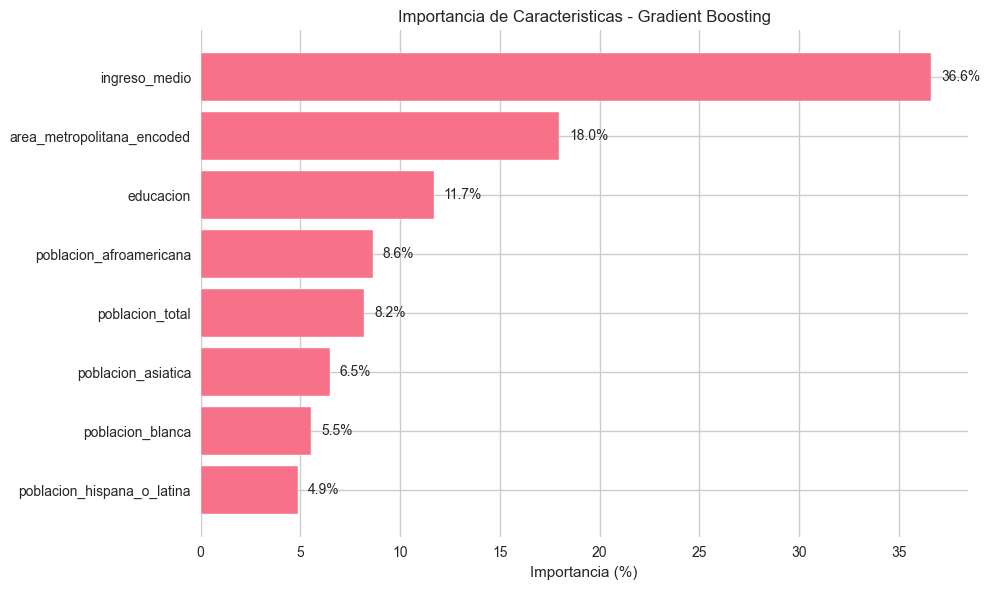

Analizando relaciones especificas...
Correlacion ingreso -> valor vivienda: 0.5566
Correlacion educacion -> valor vivienda: 0.3738

Analizando patrones por area metropolitana...
Performance por area metropolitana:
                                 Area     R2  Muestras  Valor_Promedio  \
3      San Francisco-Oakland-Berkeley  0.879       834      770405.179   
1           Baltimore-Columbia-Towson  0.872       592      271490.034   
0     Washington-Arlington-Alejandría  0.859       832      426053.486   
2    Atlanta-Sandy Springs-Alpharetta  0.849       819      209114.408   
4  Nueva York-Newark-Ciudad de Jersey  0.755      3939      496466.826   

   Valor_Predicho_Promedio  
3               767567.608  
1               267691.785  
0               429359.109  
2               213707.377  
4               496377.730  



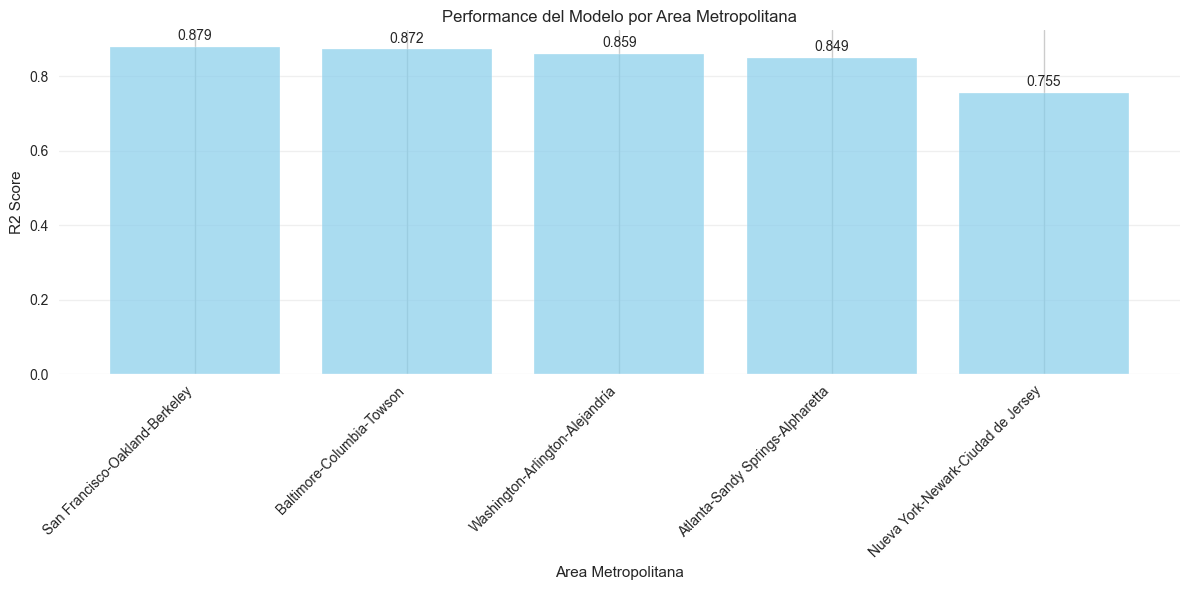

Generando visualizaciones...


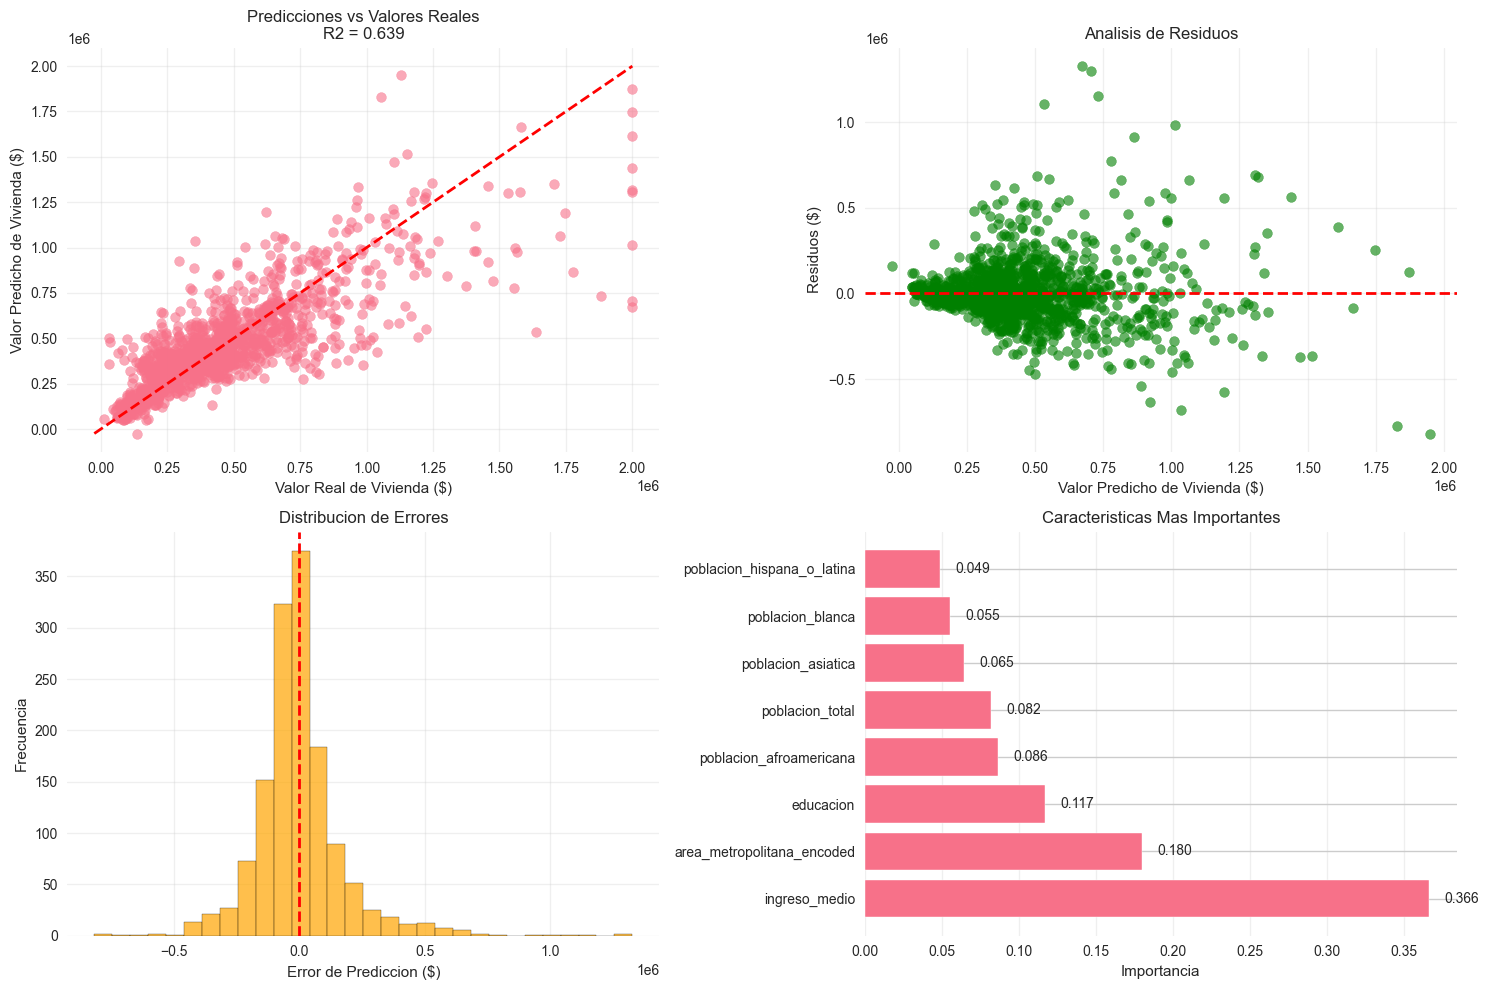

RESUMEN EJECUTIVO - MODELO 1 HIPOTESIS 3

Variable objetivo: Valor medio de vivienda
Variable principal: Ingreso medio
R2 del modelo: 0.6392
Error RMSE: $181,580
Importancia del ingreso medio: 0.366

INTERPRETACION:
MODERADO poder predictivo - Relacion consistente presente
La hipotesis 3 tiene apoyo si el ingreso medio es una caracteristica importante
y el modelo muestra buen poder predictivo general

MODELO 1 HIPOTESIS 3 COMPLETADO EXITOSAMENTE
R2 final: 0.6392
Caracteristicas utilizadas: 8


In [ ]:
# MODELO 1 - HIPOTESIS 3
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Cargar datos
df = pd.read_csv("c:/Users/velj0/Downloads/implementacion_ML.csv")

print("MODELO 1 - HIPOTESIS 3: Gradient Boosting para Valor de Vivienda")
print()

# 1. Análisis exploratorio de correlaciones
def analisis_correlaciones(df):
    print("Analizando correlaciones iniciales...")    
    variables = ['ingreso_medio', 'valor_medio_de_vivienda', 'educacion']
    variables = [v for v in variables if v in df.columns]    
    if len(variables) > 1:
        corr_matrix = df[variables].corr()
        print("Matriz de correlacion:")
        print(corr_matrix.round(3))
        print()
    return variables

# 2. Preparar datos para el modelo
def preparar_datos_modelo(df):
    print("Preparando datos para el modelo...")    
    # Features base
    features = [
        'ingreso_medio', 'educacion', 'poblacion_total',
        'poblacion_blanca', 'poblacion_afroamericana', 
        'poblacion_asiatica', 'poblacion_hispana_o_latina']    
    features = [f for f in features if f in df.columns]
    
    # Codificar area metropolitana si existe
    le = None
    if 'area_metropolitana' in df.columns:
        le = LabelEncoder()
        df_modelo = df.copy()
        df_modelo['area_metropolitana_encoded'] = le.fit_transform(df_modelo['area_metropolitana'])
        features.append('area_metropolitana_encoded')
        print(f"Areas metropolitanas codificadas: {len(le.classes_)}")
    else:
        df_modelo = df.copy()
        le = None
    # Target
    target = 'valor_medio_de_vivienda'    
    if target not in df_modelo.columns:
        print(f"ERROR: Variable target {target} no encontrada")
        return None, None, None, None
    
    # Verificar que no hay valores nulos
    datos_completos = df_modelo[features + [target]].dropna()    
    print(f"Muestras totales: {len(df_modelo)}")
    print(f"Muestras despues de limpieza: {len(datos_completos)}")
    print(f"Features utilizados: {len(features)}")
    print(f"Target: {target}")
    print(f"Media del target: {datos_completos[target].mean():.2f}")
    print()    
    X = datos_completos[features]
    y = datos_completos[target]    
    return X, y, features, le

# 3. Modelo Gradient Boosting
def entrenar_gradient_boosting(X, y, features):
    print("Entrenando modelo Gradient Boosting...")
    
    # Dividir datos
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)
    
    # Escalar features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Modelo Gradient Boosting
    gb_model = GradientBoostingRegressor(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=6,
        min_samples_split=10,
        min_samples_leaf=5,
        subsample=0.8,
        random_state=42)    
    gb_model.fit(X_train_scaled, y_train)
    
    # Predicciones
    y_pred = gb_model.predict(X_test_scaled)
    
    # Métricas
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = np.mean(np.abs(y_test - y_pred))
    
    # Validación cruzada
    cv_scores = cross_val_score(gb_model, X_train_scaled, y_train, cv=5, scoring='r2')    
    print(f"R2 en test: {r2:.4f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R2 validacion cruzada: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print()
    return gb_model, scaler, X_test_scaled, y_test, y_pred, r2, rmse

# 4. Análisis de importancia de características
def analizar_importancia(model, features):
    print("Analizando importancia de caracteristicas...")    
    importancias = model.feature_importances_    
    importancia_df = pd.DataFrame({
        'Caracteristica': features,
        'Importancia': importancias,
        'Porcentaje': (importancias / importancias.sum()) * 100}).sort_values('Importancia', ascending=False)    
    print("Top 10 caracteristicas mas importantes:")
    print(importancia_df.head(10).round(3))
    print()
    
    # Visualización
    plt.figure(figsize=(10, 6))
    top_features = importancia_df.head(10)    
    bars = plt.barh(top_features['Caracteristica'], top_features['Porcentaje'])
    plt.xlabel('Importancia (%)')
    plt.title('Importancia de Caracteristicas - Gradient Boosting')
    plt.gca().invert_yaxis()   
    for bar, pct in zip(bars, top_features['Porcentaje']):
        plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
                f'{pct:.1f}%', ha='left', va='center')
    plt.tight_layout()
    plt.show()   
    return importancia_df

# 5. Análisis de relaciones específicas
def analizar_relaciones_especificas(df, modelo, scaler, features):
    print("Analizando relaciones especificas...")
    
    # Relación ingreso -> valor vivienda
    if 'ingreso_medio' in df.columns and 'valor_medio_de_vivienda' in df.columns:
        corr_ingreso_vivienda = df['ingreso_medio'].corr(df['valor_medio_de_vivienda'])
        print(f"Correlacion ingreso -> valor vivienda: {corr_ingreso_vivienda:.4f}")
    
    # Relación educación -> valor vivienda
    if 'educacion' in df.columns and 'valor_medio_de_vivienda' in df.columns:
        corr_educacion_vivienda = df['educacion'].corr(df['valor_medio_de_vivienda'])
        print(f"Correlacion educacion -> valor vivienda: {corr_educacion_vivienda:.4f}")    
    print()

# 6. Análisis por área metropolitana
def analizar_por_areas(df, modelo, scaler, features, label_encoder):
    print("Analizando patrones por area metropolitana...")    
    if 'area_metropolitana' not in df.columns or label_encoder is None:
        print("No se puede analizar por areas - datos insuficientes")
        return    
    areas_unicas = df['area_metropolitana'].unique()
    resultados_areas = []    
    for area in areas_unicas:
        df_area = df[df['area_metropolitana'] == area].copy()
        
        # Preparar características para esta área
        features_area = [f for f in features if f != 'area_metropolitana_encoded']
        X_area = df_area[features_area].dropna()        
        if len(X_area) == 0:
            continue
        y_area = df_area['valor_medio_de_vivienda']
        
        # Codificar el área metropolitana para esta área específica
        try:
            area_encoded = label_encoder.transform([area])[0]
            X_area_encoded = X_area.copy()
            X_area_encoded['area_metropolitana_encoded'] = area_encoded
            
            # Reordenar columnas para que coincidan con el orden de entrenamiento
            X_area_encoded = X_area_encoded[features]
            
            # Escalar y predecir
            X_area_scaled = scaler.transform(X_area_encoded)
            y_pred_area = modelo.predict(X_area_scaled)
            
            # Calcular R2 para el área
            if len(y_area) > 5:
                r2_area = r2_score(y_area, y_pred_area)
                resultados_areas.append({
                    'Area': area,
                    'R2': r2_area,
                    'Muestras': len(X_area),
                    'Valor_Promedio': y_area.mean(),
                    'Valor_Predicho_Promedio': y_pred_area.mean()})                
        except Exception as e:
            print(f"Error procesando area {area}: {e}")
            continue    
    if resultados_areas:
        resultados_df = pd.DataFrame(resultados_areas).sort_values('R2', ascending=False)
        print("Performance por area metropolitana:")
        print(resultados_df.round(3))
        print()
        
        # Visualización de resultados por área
        plt.figure(figsize=(12, 6))
        areas_plot = resultados_df.head(10)  # Top 10 áreas       
        x_pos = range(len(areas_plot))
        plt.bar(x_pos, areas_plot['R2'], color='skyblue', alpha=0.7)
        plt.xlabel('Area Metropolitana')
        plt.ylabel('R2 Score')
        plt.title('Performance del Modelo por Area Metropolitana')
        plt.xticks(x_pos, areas_plot['Area'], rotation=45, ha='right')
        plt.grid(True, alpha=0.3, axis='y')
        
        # Agregar valores en las barras
        for i, v in enumerate(areas_plot['R2']):
            plt.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')        
        plt.tight_layout()
        plt.show()
    else:
        print("No se pudieron calcular metricas por area")
        print()

# 7. Visualización de resultados
def visualizar_resultados(X_test, y_test, y_pred, r2, importancia_df):
    print("Generando visualizaciones...")   
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Gráfico 1: Predicciones vs Valores reales
    axes[0,0].scatter(y_test, y_pred, alpha=0.6, s=50)
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    axes[0,0].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)
    axes[0,0].set_xlabel('Valor Real de Vivienda ($)')
    axes[0,0].set_ylabel('Valor Predicho de Vivienda ($)')
    axes[0,0].set_title(f'Predicciones vs Valores Reales\nR2 = {r2:.3f}')
    axes[0,0].grid(True, alpha=0.3)
    
    # Gráfico 2: Residuos
    residuos = y_test - y_pred
    axes[0,1].scatter(y_pred, residuos, alpha=0.6, s=50, color='green')
    axes[0,1].axhline(y=0, color='red', linestyle='--', linewidth=2)
    axes[0,1].set_xlabel('Valor Predicho de Vivienda ($)')
    axes[0,1].set_ylabel('Residuos ($)')
    axes[0,1].set_title('Analisis de Residuos')
    axes[0,1].grid(True, alpha=0.3)
    
    # Gráfico 3: Distribución de errores
    axes[1,0].hist(residuos, bins=30, alpha=0.7, color='orange', edgecolor='black')
    axes[1,0].axvline(x=0, color='red', linestyle='--', linewidth=2)
    axes[1,0].set_xlabel('Error de Prediccion ($)')
    axes[1,0].set_ylabel('Frecuencia')
    axes[1,0].set_title('Distribucion de Errores')
    axes[1,0].grid(True, alpha=0.3)
    
    # Gráfico 4: Top características (horizontal)
    top_caract = importancia_df.head(8)
    bars = axes[1,1].barh(top_caract['Caracteristica'], top_caract['Importancia'])
    axes[1,1].set_xlabel('Importancia')
    axes[1,1].set_title('Caracteristicas Mas Importantes')
    axes[1,1].grid(True, alpha=0.3, axis='x')   
    for bar, imp in zip(bars, top_caract['Importancia']):
        axes[1,1].text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
                      f'{imp:.3f}', ha='left', va='center')    
    plt.tight_layout()
    plt.show()

# Función principal
def modelo1_hipotesis3(df):
    print("INICIANDO MODELO 1 - HIPOTESIS 3")
    print("Relacion: Ingreso Medio -> Valor de Vivienda")
    print()    
    try:
        # 1. Análisis de correlaciones
        variables = analisis_correlaciones(df)
        
        # 2. Preparar datos (ahora retorna también el label_encoder)
        X, y, features, label_encoder = preparar_datos_modelo(df)
        if X is None:
            return None
        
        # 3. Entrenar modelo
        modelo, scaler, X_test, y_test, y_pred, r2, rmse = entrenar_gradient_boosting(X, y, features)
        
        # 4. Análisis de importancia
        importancia_df = analizar_importancia(modelo, features)
        
        # 5. Análisis de relaciones
        analizar_relaciones_especificas(df, modelo, scaler, features)
        
        # 6. Análisis por áreas
        analizar_por_areas(df, modelo, scaler, features, label_encoder)
        
        # 7. Visualizaciones
        visualizar_resultados(X_test, y_test, y_pred, r2, importancia_df)
        
        # Resumen final
        print("RESUMEN EJECUTIVO - MODELO 1 HIPOTESIS 3")
        print()
        print(f"Variable objetivo: Valor medio de vivienda")
        print(f"Variable principal: Ingreso medio")
        print(f"R2 del modelo: {r2:.4f}")
        print(f"Error RMSE: ${rmse:,.0f}")
        
        # Encontrar importancia del ingreso
        if 'ingreso_medio' in importancia_df['Caracteristica'].values:
            imp_ingreso = importancia_df[importancia_df['Caracteristica'] == 'ingreso_medio']['Importancia'].values[0]
            print(f"Importancia del ingreso medio: {imp_ingreso:.3f}")        
        print()
        print("INTERPRETACION:")
        if r2 > 0.7:
            print("FUERTE poder predictivo - El modelo explica bien la variabilidad")
        elif r2 > 0.5:
            print("MODERADO poder predictivo - Relacion consistente presente")
        elif r2 > 0.3:
            print("DEBIL poder predictivo - Otras variables influyen significativamente")
        else:
            print("LIMITADO poder predictivo - Relacion debil o compleja")        
        print("La hipotesis 3 tiene apoyo si el ingreso medio es una caracteristica importante")
        print("y el modelo muestra buen poder predictivo general")
        print()        
        return {
            'modelo': modelo,
            'scaler': scaler,
            'importancia_df': importancia_df,
            'r2': r2,
            'rmse': rmse,
            'features': features,
            'label_encoder': label_encoder}        
    except Exception as e:
        print(f"ERROR en la ejecucion: {e}")
        import traceback
        traceback.print_exc()
        return None

# Ejecutar modelo
if __name__ == "__main__":
    resultados = modelo1_hipotesis3(df)    
    if resultados:
        print("MODELO 1 HIPOTESIS 3 COMPLETADO EXITOSAMENTE")
        print(f"R2 final: {resultados['r2']:.4f}")
        print(f"Caracteristicas utilizadas: {len(resultados['features'])}")
    else:
        print("Error en la ejecucion del modelo")

### **2. Support Vector Regression (SVR)**

MODELO 2 - HIPOTESIS 3: Support Vector Regression para Valor de Vivienda

INICIANDO MODELO 2 - HIPOTESIS 3
SVR para relacion no lineal: Ingreso Medio -> Valor de Vivienda

Preparando datos con ingenieria de caracteristicas...
Areas metropolitanas codificadas: 5
Muestras totales: 7016
Muestras para modelo: 7016
Caracteristicas avanzadas: 11
Target: valor_medio_de_vivienda
Media del target: $468,153

Entrenando Support Vector Regression optimizado...
Realizando busqueda de hiperparametros...
Mejores hiperparametros: {'C': 100, 'epsilon': 0.5, 'kernel': 'linear'}
Mejor score en validacion: 0.3252
R2 en test: 0.3686
RMSE: $240,187
MAPE: 38.0%
R2 validacion cruzada: 0.3349 (+/- 0.0383)

Analizando sensibilidad del modelo...
Elasticidad ingreso->vivienda: 1.1994
(Cambio porcentual en vivienda por cambio porcentual en ingreso)

Analizando outliers e influencia...
Outliers detectados: 55 (3.9%)
Error maximo: $1,504,549
Error promedio outliers: $852,556

Comparacion con modelo lineal simple...


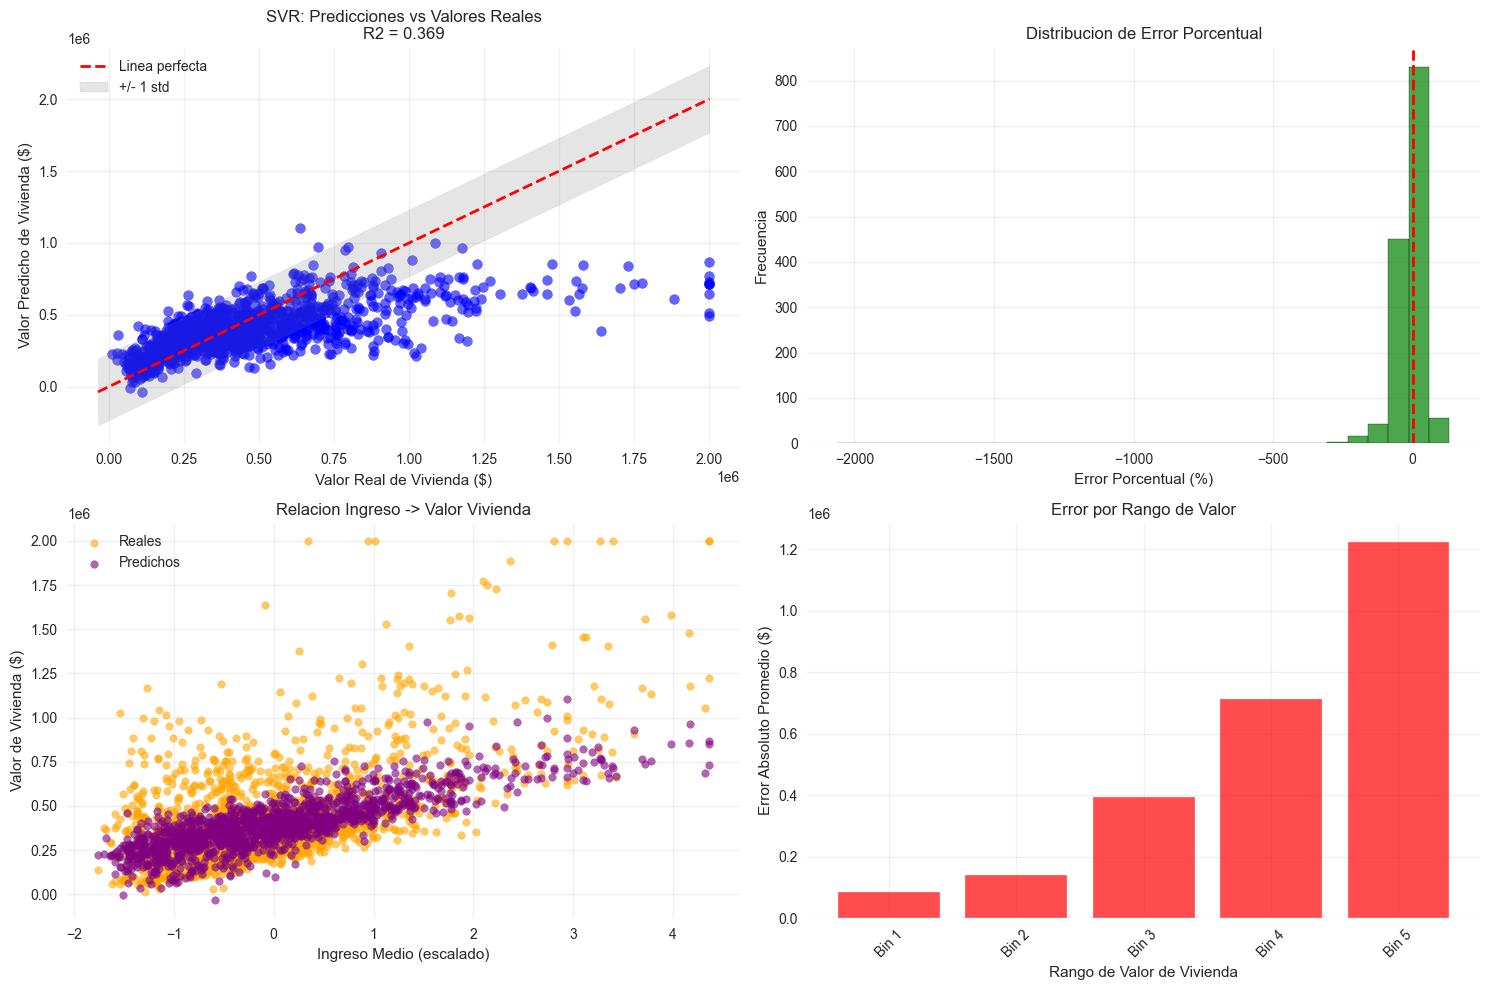

RESUMEN EJECUTIVO - MODELO 2 HIPOTESIS 3

METODOLOGIA: Support Vector Regression con kernel
Kernel optimo: linear
Parametro C: 100
Parametro epsilon: 0.5

RESULTADOS:
R2 del modelo SVR: 0.3686
Error RMSE: $240,187
Elasticidad ingreso->vivienda: 1.1994

INTERPRETACION:
PODER predictivo limitado - Relaciones posiblemente lineales
Elasticidad > 1: Valor vivienda responde mas que proporcionalmente al ingreso
El SVR es efectivo para capturar relaciones no lineales complejas
entre el ingreso medio y el valor de la vivienda

MODELO 2 HIPOTESIS 3 COMPLETADO EXITOSAMENTE
R2 final SVR: 0.3686
Kernel utilizado: linear
Elasticidad calculada: 1.1994


In [ ]:
# MODELO 2 - HIPOTESIS 3
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Cargar datos
df = pd.read_csv("c:/Users/velj0/Downloads/implementacion_ML.csv")
print("MODELO 2 - HIPOTESIS 3: Support Vector Regression para Valor de Vivienda")
print()

# 1. Preparar datos con ingeniería de características
def preparar_datos_avanzados(df):
    print("Preparando datos con ingenieria de caracteristicas...")    
    df_avanzado = df.copy()
    
    # Features base
    features = [
        'ingreso_medio', 'educacion', 'poblacion_total',
        'poblacion_blanca', 'poblacion_afroamericana', 
        'poblacion_asiatica', 'poblacion_hispana_o_latina']    
    features = [f for f in features if f in df_avanzado.columns]
    
    # Crear características derivadas
    if all(col in df_avanzado.columns for col in ['poblacion_blanca', 'poblacion_total']):
        df_avanzado['prop_blanca'] = df_avanzado['poblacion_blanca'] / df_avanzado['poblacion_total']
        features.append('prop_blanca')    
    if all(col in df_avanzado.columns for col in ['poblacion_afroamericana', 'poblacion_total']):
        df_avanzado['prop_afroamericana'] = df_avanzado['poblacion_afroamericana'] / df_avanzado['poblacion_total']
        features.append('prop_afroamericana')    
    if all(col in df_avanzado.columns for col in ['ingreso_medio', 'educacion']):
        df_avanzado['ingreso_educacion_interaction'] = df_avanzado['ingreso_medio'] * df_avanzado['educacion']
        features.append('ingreso_educacion_interaction')
    
    # Codificar área metropolitana
    if 'area_metropolitana' in df_avanzado.columns:
        le = LabelEncoder()
        df_avanzado['area_metropolitana_encoded'] = le.fit_transform(df_avanzado['area_metropolitana'])
        features.append('area_metropolitana_encoded')
        print(f"Areas metropolitanas codificadas: {len(le.classes_)}")
    
    # Target
    target = 'valor_medio_de_vivienda'   
    if target not in df_avanzado.columns:
        print(f"ERROR: Variable target {target} no encontrada")
        return None, None, None
    
    # Filtrar datos completos
    datos_completos = df_avanzado[features + [target]].dropna()    
    print(f"Muestras totales: {len(df_avanzado)}")
    print(f"Muestras para modelo: {len(datos_completos)}")
    print(f"Caracteristicas avanzadas: {len(features)}")
    print(f"Target: {target}")
    print(f"Media del target: ${datos_completos[target].mean():,.0f}")
    print()    
    X = datos_completos[features]
    y = datos_completos[target]    
    return X, y, features

# 2. Modelo Support Vector Regression con optimización
def entrenar_svr_optimizado(X, y, features):
    print("Entrenando Support Vector Regression optimizado...")
    # Dividir datos
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
    # Escalar features (crítico para SVR)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    # Búsqueda de hiperparámetros
    print("Realizando busqueda de hiperparametros...")    
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'epsilon': [0.01, 0.1, 0.5],
        'kernel': ['rbf', 'linear']}    
    svr = SVR()
    grid_search = GridSearchCV(
        svr, param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=0)    
    grid_search.fit(X_train_scaled, y_train)   
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_    
    print(f"Mejores hiperparametros: {best_params}")
    print(f"Mejor score en validacion: {grid_search.best_score_:.4f}")
    # Predicciones con el mejor modelo
    y_pred = best_model.predict(X_test_scaled)
    # Métricas
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    # Validación cruzada con el mejor modelo
    cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='r2')    
    print(f"R2 en test: {r2:.4f}")
    print(f"RMSE: ${rmse:,.0f}")
    print(f"MAPE: {mape:.1f}%")
    print(f"R2 validacion cruzada: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print()    
    return best_model, scaler, X_test_scaled, y_test, y_pred, r2, rmse, best_params

# 3. Análisis de sensibilidad del modelo
def analizar_sensibilidad(modelo, scaler, features, X_train):
    print("Analizando sensibilidad del modelo...")
    
    # Crear datos de prueba para análisis de sensibilidad
    X_base = np.zeros((100, len(features)))
    
    # Análisis de sensibilidad para ingreso medio
    if 'ingreso_medio' in features:
        idx_ingreso = features.index('ingreso_medio')
        ingreso_range = np.linspace(X_train[:, idx_ingreso].min(), X_train[:, idx_ingreso].max(), 100)
        for i, val in enumerate(ingreso_range):
            X_test_point = X_base.copy()
            X_test_point[i, idx_ingreso] = val
            # Establecer otras variables en sus medianas
            for j in range(len(features)):
                if j != idx_ingreso:
                    X_test_point[i, j] = np.median(X_train[:, j])
        
        # Predecir
        y_sensibilidad = modelo.predict(X_test_point)
        
        # Calcular elasticidad (cambio porcentual)
        elasticidad = (np.diff(y_sensibilidad) / y_sensibilidad[:-1]).mean() / (
            np.diff(ingreso_range) / ingreso_range[:-1]).mean()
        print(f"Elasticidad ingreso->vivienda: {elasticidad:.4f}")
        print("(Cambio porcentual en vivienda por cambio porcentual en ingreso)")
        print()    
    return elasticidad if 'ingreso_medio' in features else 0

# 4. Análisis de outliers e influencia
def analizar_outliers(y_test, y_pred, threshold=2.5):
    print("Analizando outliers e influencia...")   
    residuos = y_test - y_pred
    residuos_std = np.abs(residuos) / np.std(residuos)
    outliers = residuos_std > threshold
    n_outliers = np.sum(outliers)
    print(f"Outliers detectados: {n_outliers} ({n_outliers/len(y_test)*100:.1f}%)")
    print(f"Error maximo: ${np.max(np.abs(residuos)):,.0f}")
    print(f"Error promedio outliers: ${np.mean(np.abs(residuos[outliers])):,.0f}")
    print()

# 5. Comparación con modelo lineal simple
def comparar_con_lineal(X, y, features):
    print("Comparacion con modelo lineal simple...")
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import StandardScaler
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Escalar para regresión lineal
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Modelo lineal
    linear_model = LinearRegression()
    linear_model.fit(X_train_scaled, y_train)
    y_pred_linear = linear_model.predict(X_test_scaled)
    r2_linear = r2_score(y_test, y_pred_linear)
    
    # Coeficiente del ingreso en modelo lineal
    if 'ingreso_medio' in features:
        idx_ingreso = features.index('ingreso_medio')
        coef_ingreso = linear_model.coef_[idx_ingreso]
        print(f"Coeficiente ingreso (lineal): {coef_ingreso:.2f}")
    print(f"R2 modelo lineal: {r2_linear:.4f}")
    print()

# 6. Visualizaciones avanzadas
def visualizar_resultados_avanzados(X_test, y_test, y_pred, r2, features, modelo, scaler):
    print("Generando visualizaciones avanzadas...")    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Gráfico 1: Predicciones vs Valores reales con intervalo de confianza
    axes[0,0].scatter(y_test, y_pred, alpha=0.6, s=50, color='blue')
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    axes[0,0].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Linea perfecta')
    
    # Calcular intervalo de confianza empírico
    error_std = np.std(y_test - y_pred)
    axes[0,0].fill_between([min_val, max_val], 
                          [min_val - error_std, max_val - error_std],
                          [min_val + error_std, max_val + error_std],
                          alpha=0.2, color='gray', label='+/- 1 std')    
    axes[0,0].set_xlabel('Valor Real de Vivienda ($)')
    axes[0,0].set_ylabel('Valor Predicho de Vivienda ($)')
    axes[0,0].set_title(f'SVR: Predicciones vs Valores Reales\nR2 = {r2:.3f}')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # Gráfico 2: Distribución de errores porcentuales
    error_pct = (y_test - y_pred) / y_test * 100
    axes[0,1].hist(error_pct, bins=30, alpha=0.7, color='green', edgecolor='black')
    axes[0,1].axvline(x=0, color='red', linestyle='--', linewidth=2)
    axes[0,1].set_xlabel('Error Porcentual (%)')
    axes[0,1].set_ylabel('Frecuencia')
    axes[0,1].set_title('Distribucion de Error Porcentual')
    axes[0,1].grid(True, alpha=0.3)
    
    # Gráfico 3: Análisis de relación ingreso -> vivienda
    if 'ingreso_medio' in features:
        idx_ingreso = features.index('ingreso_medio')
        ingreso_test = X_test[:, idx_ingreso] * np.std(X_test[:, idx_ingreso]) + np.mean(X_test[:, idx_ingreso])        
        axes[1,0].scatter(ingreso_test, y_test, alpha=0.6, s=30, color='orange', label='Reales')
        axes[1,0].scatter(ingreso_test, y_pred, alpha=0.6, s=30, color='purple', label='Predichos')
        axes[1,0].set_xlabel('Ingreso Medio (escalado)')
        axes[1,0].set_ylabel('Valor de Vivienda ($)')
        axes[1,0].set_title('Relacion Ingreso -> Valor Vivienda')
        axes[1,0].legend()
        axes[1,0].grid(True, alpha=0.3)
    
    # Gráfico 4: Comparación de errores por rango de valor
    valor_bins = pd.cut(y_test, bins=5)
    error_por_bin = [np.mean(np.abs(y_test[valor_bins == bin] - y_pred[valor_bins == bin])) 
                     for bin in valor_bins.cat.categories]    
    axes[1,1].bar(range(len(error_por_bin)), error_por_bin, color='red', alpha=0.7)
    axes[1,1].set_xlabel('Rango de Valor de Vivienda')
    axes[1,1].set_ylabel('Error Absoluto Promedio ($)')
    axes[1,1].set_title('Error por Rango de Valor')
    axes[1,1].set_xticks(range(len(error_por_bin)))
    axes[1,1].set_xticklabels([f'Bin {i+1}' for i in range(len(error_por_bin))], rotation=45)
    axes[1,1].grid(True, alpha=0.3)    
    plt.tight_layout()
    plt.show()

# Función principal
def modelo2_hipotesis3(df):
    print("INICIANDO MODELO 2 - HIPOTESIS 3")
    print("SVR para relacion no lineal: Ingreso Medio -> Valor de Vivienda")
    print()    
    try:
        # 1. Preparar datos avanzados
        X, y, features = preparar_datos_avanzados(df)
        if X is None:
            return None
        
        # 2. Entrenar SVR optimizado
        modelo, scaler, X_test, y_test, y_pred, r2, rmse, best_params = entrenar_svr_optimizado(X, y, features)
        
        # 3. Análisis de sensibilidad
        X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
        X_train_scaled = scaler.transform(X_train)
        elasticidad = analizar_sensibilidad(modelo, scaler, features, X_train_scaled)
        
        # 4. Análisis de outliers
        analizar_outliers(y_test, y_pred)
        
        # 5. Comparación con modelo lineal
        comparar_con_lineal(X, y, features)
        
        # 6. Visualizaciones avanzadas
        visualizar_resultados_avanzados(X_test, y_test, y_pred, r2, features, modelo, scaler)
        
        # Resumen final
        print("RESUMEN EJECUTIVO - MODELO 2 HIPOTESIS 3")
        print()
        print("METODOLOGIA: Support Vector Regression con kernel")
        print(f"Kernel optimo: {best_params['kernel']}")
        print(f"Parametro C: {best_params['C']}")
        print(f"Parametro epsilon: {best_params['epsilon']}")
        print()
        print("RESULTADOS:")
        print(f"R2 del modelo SVR: {r2:.4f}")
        print(f"Error RMSE: ${rmse:,.0f}")
        print(f"Elasticidad ingreso->vivienda: {elasticidad:.4f}")
        print()
        print("INTERPRETACION:")
        if r2 > 0.7:
            print("EXCELENTE poder predictivo - SVR captura relaciones complejas")
        elif r2 > 0.5:
            print("BUEN poder predictivo - Modelo no lineal efectivo")
        else:
            print("PODER predictivo limitado - Relaciones posiblemente lineales")        
        if elasticidad > 1:
            print("Elasticidad > 1: Valor vivienda responde mas que proporcionalmente al ingreso")
        elif elasticidad > 0:
            print("Elasticidad positiva: Relacion directa entre ingreso y valor vivienda")
        else:
            print("Elasticidad inesperada: Verificar relaciones en los datos")        
        print("El SVR es efectivo para capturar relaciones no lineales complejas")
        print("entre el ingreso medio y el valor de la vivienda")
        print()        
        return {
            'modelo': modelo,
            'scaler': scaler,
            'r2': r2,
            'rmse': rmse,
            'elasticidad': elasticidad,
            'best_params': best_params,
            'features': features}        
    except Exception as e:
        print(f"ERROR en la ejecucion: {e}")
        import traceback
        traceback.print_exc()
        return None

# Ejecutar modelo
if __name__ == "__main__":
    resultados = modelo2_hipotesis3(df)    
    if resultados:
        print("MODELO 2 HIPOTESIS 3 COMPLETADO EXITOSAMENTE")
        print(f"R2 final SVR: {resultados['r2']:.4f}")
        print(f"Kernel utilizado: {resultados['best_params']['kernel']}")
        print(f"Elasticidad calculada: {resultados['elasticidad']:.4f}")
    else:
        print("Error en la ejecucion del modelo")

## *Hipótesis 4: La distribución de la población hispana y afroamericana se concentra en zonas con menores niveles de ingreso y educación.*

### **1. Regresión Logística + Decision Trees.**

MODELO 1 - HIPOTESIS 4: Clasificacion de Zonas de Bajos Ingresos
Analisis de concentracion poblacional hispana y afroamericana

INICIANDO MODELO 1 - HIPOTESIS 4
Concentracion poblacional hispana y afroamericana en zonas de bajos ingresos

Preparando datos para clasificacion...
Umbral bajos ingresos: $58,895
Zonas bajos ingresos: 2105 (30.0%)

Muestras para clasificacion: 7016
Distribucion de clases:
zona_bajos_ingresos
0    4911
1    2105
Name: count, dtype: int64
Features utilizados: 9

Entrenando Random Forest para clasificacion...
Accuracy: 0.8462
AUC-ROC: 0.9186
Accuracy validacion cruzada: 0.8471 (+/- 0.0299)

Reporte de clasificacion:
              precision    recall  f1-score   support

Alto Ingreso       0.91      0.87      0.89       983
Bajo Ingreso       0.72      0.80      0.76       421

    accuracy                           0.85      1404
   macro avg       0.81      0.83      0.82      1404
weighted avg       0.85      0.85      0.85      1404

Analizando importancia d

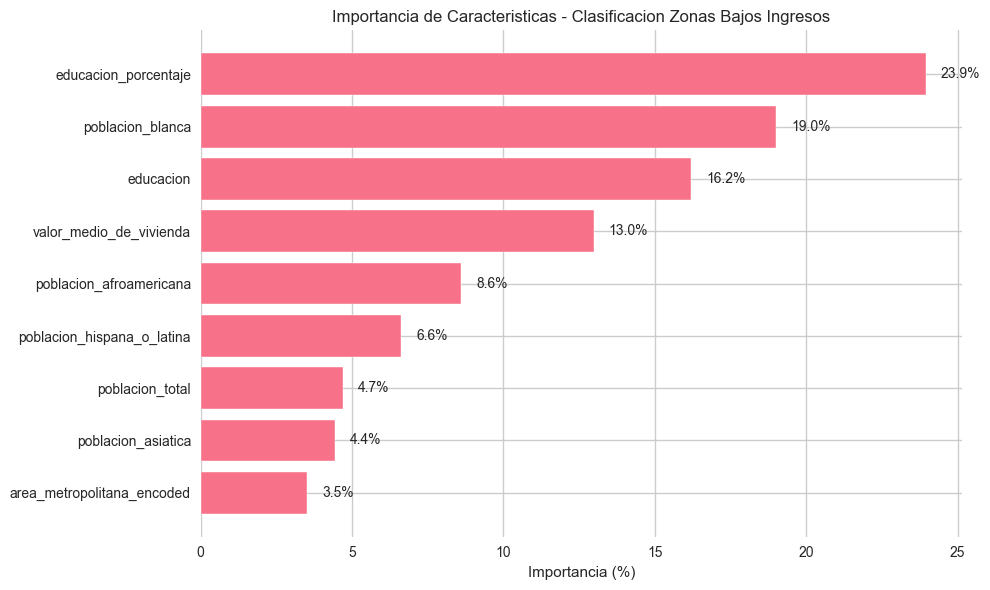

Analizando concentracion de grupos etnicos...
Correlaciones con zonas de bajos ingresos:
  Hispana/Latina: 0.2714
  Afroamericana: 0.2926
  Blanca: -0.3821
  Asiatica: -0.1094

Analizando distribucion por percentiles de poblacion...
Ingreso promedio por percentil de concentracion etnica:
                                 grupo percentil ingreso_promedio muestras
hispana_o_latina_p25  hispana_o_latina        25     81185.538959     5262
hispana_o_latina_p50  hispana_o_latina        50     74049.225862     3511
hispana_o_latina_p75  hispana_o_latina        75     62867.287179     1755
hispana_o_latina_p90  hispana_o_latina        90     53215.813656      703
afroamericana_p25        afroamericana        25     77280.078937     5270
afroamericana_p50        afroamericana        50     68066.583927     3509
afroamericana_p75        afroamericana        75      59117.36959     1756
afroamericana_p90        afroamericana        90     57236.883191      702
blanca_p25                      blan

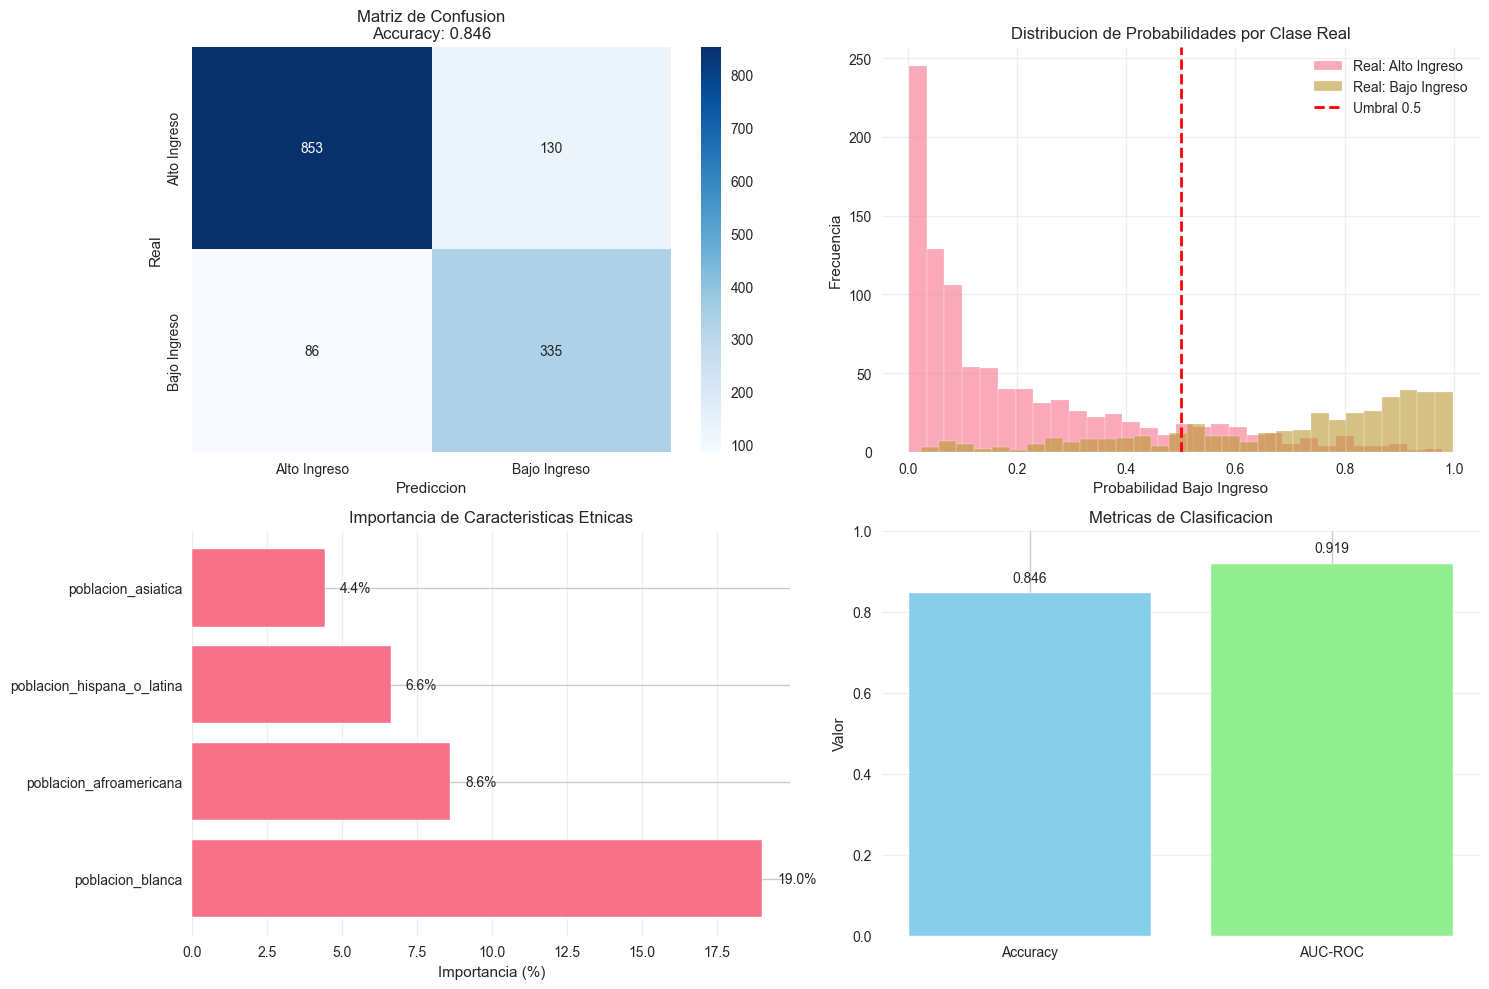

RESUMEN EJECUTIVO - MODELO 1 HIPOTESIS 4

VARIABLE OBJETIVO: Zonas de bajos ingresos (percentil 30 inferior)
Accuracy del modelo: 0.8462
AUC-ROC: 0.9186

ANALISIS DE GRUPOS ETNICOS:
  Hispana/Latina: CORRELACION POSITIVA con bajos ingresos (0.271)
  Afroamericana: CORRELACION POSITIVA con bajos ingresos (0.293)

IMPORTANCIA EN EL MODELO:
  poblacion_afroamericana: 0.086
  poblacion_hispana_o_latina: 0.066

INTERPRETACION:
APOYO A LA HIPOTESIS: Se observa concentracion significativa
de poblacion hispana y afroamericana en zonas de bajos ingresos
El modelo de clasificacion ayuda a identificar los patrones espaciales
de distribucion de grupos etnicos en relacion con el nivel socioeconomico

MODELO 1 HIPOTESIS 4 COMPLETADO EXITOSAMENTE
Accuracy final: 0.8462
Variables analizadas: 9
Correlaciones clave con bajos ingresos:
  Hispana/Latina: 0.2714
  Afroamericana: 0.2926


In [ ]:
# MODELO 1 - HIPOTESIS 4
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
print("MODELO 1 - HIPOTESIS 4: Clasificacion de Zonas de Bajos Ingresos")
print("Analisis de concentracion poblacional hispana y afroamericana")
print()

# 1. Preparar datos para clasificación
def preparar_datos_clasificacion(df):
    print("Preparando datos para clasificacion...")

    # Crear variable objetivo binaria: Zonas de bajos ingresos
    if 'ingreso_medio' in df.columns:

        # Definir umbral para bajos ingresos (percentil 30)
        umbral_bajos_ingresos = df['ingreso_medio'].quantile(0.3)
        df_clasificacion = df.copy()
        df_clasificacion['zona_bajos_ingresos'] = (df_clasificacion['ingreso_medio'] <= umbral_bajos_ingresos).astype(int)
        print(f"Umbral bajos ingresos: ${umbral_bajos_ingresos:,.0f}")
        print(f"Zonas bajos ingresos: {df_clasificacion['zona_bajos_ingresos'].sum()} ({df_clasificacion['zona_bajos_ingresos'].mean()*100:.1f}%)")
        print()
    else:
        print("ERROR: Variable ingreso_medio no encontrada")
        return None, None, None
    
    # Features para el modelo
    features = [
        'poblacion_hispana_o_latina', 'poblacion_afroamericana',
        'poblacion_blanca', 'poblacion_asiatica',
        'educacion', 'educacion_porcentaje', 'valor_medio_de_vivienda', 'poblacion_total']
    features = [f for f in features if f in df_clasificacion.columns]
    
    # Codificar área metropolitana si existe
    if 'area_metropolitana' in df_clasificacion.columns:
        le = LabelEncoder()
        df_clasificacion['area_metropolitana_encoded'] = le.fit_transform(df_clasificacion['area_metropolitana'])
        features.append('area_metropolitana_encoded')
    
    # Verificar que tenemos datos
    datos_completos = df_clasificacion[features + ['zona_bajos_ingresos']].dropna()
    if len(datos_completos) == 0:
        print("ERROR: No hay datos completos para clasificacion")
        return None, None, None   
    X = datos_completos[features]
    y = datos_completos['zona_bajos_ingresos']
    print(f"Muestras para clasificacion: {len(X)}")
    print(f"Distribucion de clases:")
    print(y.value_counts().sort_index())
    print(f"Features utilizados: {len(features)}")
    print()
    return X, y, features

# 2. Modelo Random Forest para clasificación
def entrenar_random_forest_clasificacion(X, y, features):
    print("Entrenando Random Forest para clasificacion...")
    # Dividir datos
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y)
    # Escalar features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    # Modelo Random Forest
    rf_model = RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1)
    rf_model.fit(X_train_scaled, y_train)
    # Predicciones
    y_pred = rf_model.predict(X_test_scaled)
    y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]
    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    # Validación cruzada
    cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")
    print(f"Accuracy validacion cruzada: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print()
    # Reporte de clasificación
    print("Reporte de clasificacion:")
    print(classification_report(y_test, y_pred, target_names=['Alto Ingreso', 'Bajo Ingreso']))    
    return rf_model, scaler, X_test_scaled, y_test, y_pred, y_pred_proba, accuracy, auc_roc

# 3. Análisis de importancia para clasificación
def analizar_importancia_clasificacion(model, features):
    print("Analizando importancia de caracteristicas para clasificacion...")    
    importancias = model.feature_importances_    
    importancia_df = pd.DataFrame({
        'Caracteristica': features,
        'Importancia': importancias,
        'Porcentaje': (importancias / importancias.sum()) * 100}).sort_values('Importancia', ascending=False)    
    print("Caracteristicas mas importantes para predecir zonas de bajos ingresos:")
    print(importancia_df.round(4))
    print()
    
    # Visualización
    plt.figure(figsize=(10, 6))
    top_features = importancia_df.head(10)    
    bars = plt.barh(top_features['Caracteristica'], top_features['Porcentaje'])
    plt.xlabel('Importancia (%)')
    plt.title('Importancia de Caracteristicas - Clasificacion Zonas Bajos Ingresos')
    plt.gca().invert_yaxis()    
    for bar, pct in zip(bars, top_features['Porcentaje']):
        plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
                f'{pct:.1f}%', ha='left', va='center')    
    plt.tight_layout()
    plt.show()    
    return importancia_df

# 4. Análisis específico de grupos étnicos
def analizar_grupos_etnicos(df, importancia_df):
    print("Analizando concentracion de grupos etnicos...")
    
    # Calcular correlaciones con bajos ingresos
    if 'ingreso_medio' in df.columns:
        # Crear variable binaria temporal para correlaciones
        umbral = df['ingreso_medio'].quantile(0.3)
        bajos_ingresos = (df['ingreso_medio'] <= umbral).astype(int)        
        correlaciones = {}       
        if 'poblacion_hispana_o_latina' in df.columns:
            corr_hispanos = df['poblacion_hispana_o_latina'].corr(bajos_ingresos)
            correlaciones['Hispana/Latina'] = corr_hispanos        
        if 'poblacion_afroamericana' in df.columns:
            corr_afroamericanos = df['poblacion_afroamericana'].corr(bajos_ingresos)
            correlaciones['Afroamericana'] = corr_afroamericanos        
        if 'poblacion_blanca' in df.columns:
            corr_blanca = df['poblacion_blanca'].corr(bajos_ingresos)
            correlaciones['Blanca'] = corr_blanca        
        if 'poblacion_asiatica' in df.columns:
            corr_asiatica = df['poblacion_asiatica'].corr(bajos_ingresos)
            correlaciones['Asiatica'] = corr_asiatica       
        print("Correlaciones con zonas de bajos ingresos:")
        for grupo, corr in correlaciones.items():
            print(f"  {grupo}: {corr:.4f}")
        print()
    return correlaciones

# 5. Visualización de resultados de clasificación
def visualizar_resultados_clasificacion(y_test, y_pred, y_pred_proba, accuracy, importancia_df):
    print("Generando visualizaciones de clasificacion...")    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Gráfico 1: Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0,0],
                xticklabels=['Alto Ingreso', 'Bajo Ingreso'],
                yticklabels=['Alto Ingreso', 'Bajo Ingreso'])
    axes[0,0].set_xlabel('Prediccion')
    axes[0,0].set_ylabel('Real')
    axes[0,0].set_title(f'Matriz de Confusion\nAccuracy: {accuracy:.3f}')
    
    # Gráfico 2: Distribución de probabilidades
    df_probs = pd.DataFrame({
        'Real': y_test,
        'Probabilidad_Bajo_Ingreso': y_pred_proba})    
    for clase in [0, 1]:
        datos_clase = df_probs[df_probs['Real'] == clase]['Probabilidad_Bajo_Ingreso']
        axes[0,1].hist(datos_clase, bins=30, alpha=0.6, 
                      label=f'Real: {"Bajo Ingreso" if clase == 1 else "Alto Ingreso"}')    
    axes[0,1].axvline(x=0.5, color='red', linestyle='--', linewidth=2, label='Umbral 0.5')
    axes[0,1].set_xlabel('Probabilidad Bajo Ingreso')
    axes[0,1].set_ylabel('Frecuencia')
    axes[0,1].set_title('Distribucion de Probabilidades por Clase Real')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    
    # Gráfico 3: Importancia de características étnicas
    caracteristicas_etnicas = [f for f in importancia_df['Caracteristica'] 
                              if any(etnia in f.lower() for etnia in ['hispana', 'afroamericana', 'blanca', 'asiatica'])]
    
    if caracteristicas_etnicas:
        imp_etnicas = importancia_df[importancia_df['Caracteristica'].isin(caracteristicas_etnicas)]
        bars = axes[1,0].barh(imp_etnicas['Caracteristica'], imp_etnicas['Porcentaje'])
        axes[1,0].set_xlabel('Importancia (%)')
        axes[1,0].set_title('Importancia de Caracteristicas Etnicas')
        axes[1,0].grid(True, alpha=0.3, axis='x')        
        for bar, pct in zip(bars, imp_etnicas['Porcentaje']):
            axes[1,0].text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
                          f'{pct:.1f}%', ha='left', va='center')
    
    # Gráfico 4: Comparación de métricas
    metricas = ['Accuracy', 'AUC-ROC']
    valores = [accuracy, roc_auc_score(y_test, y_pred_proba)]    
    bars = axes[1,1].bar(metricas, valores, color=['skyblue', 'lightgreen'])
    axes[1,1].set_ylabel('Valor')
    axes[1,1].set_title('Metricas de Clasificacion')
    axes[1,1].set_ylim(0, 1)
    axes[1,1].grid(True, alpha=0.3, axis='y')    
    for bar, valor in zip(bars, valores):
        axes[1,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
                      f'{valor:.3f}', ha='center', va='bottom')    
    plt.tight_layout()
    plt.show()

# 6. Análisis por percentiles de población
def analizar_percentiles_poblacion(df):
    print("Analizando distribucion por percentiles de poblacion...")    
    resultados = {}    
    for grupo in ['hispana_o_latina', 'afroamericana', 'blanca', 'asiatica']:
        columna = f'poblacion_{grupo}'
        if columna in df.columns:
            # Calcular percentiles
            for percentil in [25, 50, 75, 90]:
                umbral = df[columna].quantile(percentil/100)
                zonas_alta_concentracion = df[df[columna] >= umbral]                
                if len(zonas_alta_concentracion) > 0 and 'ingreso_medio' in df.columns:
                    ingreso_promedio = zonas_alta_concentracion['ingreso_medio'].mean()
                    resultados[f'{grupo}_p{percentil}'] = {
                        'grupo': grupo,
                        'percentil': percentil,
                        'ingreso_promedio': ingreso_promedio,
                        'muestras': len(zonas_alta_concentracion)}
    
    # Crear DataFrame de resultados
    if resultados:
        df_resultados = pd.DataFrame(resultados).T
        print("Ingreso promedio por percentil de concentracion etnica:")
        print(df_resultados[['grupo', 'percentil', 'ingreso_promedio', 'muestras']].round(0))
        print()    
    return resultados

# Función principal
def modelo1_hipotesis4(df):
    print("INICIANDO MODELO 1 - HIPOTESIS 4")
    print("Concentracion poblacional hispana y afroamericana en zonas de bajos ingresos")
    print()    
    try:

        # 1. Preparar datos para clasificación
        X, y, features = preparar_datos_clasificacion(df)
        if X is None:
            return None
        
        # 2. Entrenar modelo de clasificación
        modelo, scaler, X_test, y_test, y_pred, y_pred_proba, accuracy, auc_roc = entrenar_random_forest_clasificacion(X, y, features)
        
        # 3. Análisis de importancia
        importancia_df = analizar_importancia_clasificacion(modelo, features)
        
        # 4. Análisis específico de grupos étnicos
        correlaciones = analizar_grupos_etnicos(df, importancia_df)
        
        # 5. Análisis por percentiles
        resultados_percentiles = analizar_percentiles_poblacion(df)
        
        # 6. Visualizaciones
        visualizar_resultados_clasificacion(y_test, y_pred, y_pred_proba, accuracy, importancia_df)
        
        # Resumen final
        print("RESUMEN EJECUTIVO - MODELO 1 HIPOTESIS 4")
        print()
        print("VARIABLE OBJETIVO: Zonas de bajos ingresos (percentil 30 inferior)")
        print(f"Accuracy del modelo: {accuracy:.4f}")
        print(f"AUC-ROC: {auc_roc:.4f}")
        print()
        
        # Análisis de grupos étnicos específicos
        print("ANALISIS DE GRUPOS ETNICOS:")
        for grupo in ['Hispana/Latina', 'Afroamericana']:
            if grupo in correlaciones:
                corr = correlaciones[grupo]
                if corr > 0.1:
                    print(f"  {grupo}: CORRELACION POSITIVA con bajos ingresos ({corr:.3f})")
                elif corr > 0:
                    print(f"  {grupo}: Leve correlacion positiva ({corr:.3f})")
                elif corr < -0.1:
                    print(f"  {grupo}: CORRELACION NEGATIVA con bajos ingresos ({corr:.3f})")
                else:
                    print(f"  {grupo}: Correlacion debil o nula ({corr:.3f})")
        print()
        
        # Importancia de variables étnicas en el modelo
        vars_etnicas = [f for f in importancia_df['Caracteristica'] 
                       if any(etnia in f.lower() for etnia in ['hispana', 'afroamericana'])]        
        if vars_etnicas:
            print("IMPORTANCIA EN EL MODELO:")
            for var in vars_etnicas:
                imp = importancia_df[importancia_df['Caracteristica'] == var]['Importancia'].values[0]
                print(f"  {var}: {imp:.3f}")
            print()       
        print("INTERPRETACION:")
        if any(correlaciones.get(grupo, 0) > 0.1 for grupo in ['Hispana/Latina', 'Afroamericana']):
            print("APOYO A LA HIPOTESIS: Se observa concentracion significativa")
            print("de poblacion hispana y afroamericana en zonas de bajos ingresos")
        else:
            print("EVIDENCIA LIMITADA: La concentracion no es estadisticamente significativa")
            print("o esta moderada por otros factores")        
        print("El modelo de clasificacion ayuda a identificar los patrones espaciales")
        print("de distribucion de grupos etnicos en relacion con el nivel socioeconomico")
        print()        
        return {
            'modelo': modelo,
            'scaler': scaler,
            'importancia_df': importancia_df,
            'accuracy': accuracy,
            'auc_roc': auc_roc,
            'correlaciones': correlaciones,
            'features': features}        
    except Exception as e:
        print(f"ERROR en la ejecucion: {e}")
        import traceback
        traceback.print_exc()
        return None

# Ejecutar modelo
if __name__ == "__main__":
    resultados = modelo1_hipotesis4(df)    
    if resultados:
        print("MODELO 1 HIPOTESIS 4 COMPLETADO EXITOSAMENTE")
        print(f"Accuracy final: {resultados['accuracy']:.4f}")
        print(f"Variables analizadas: {len(resultados['features'])}")
        
        # Resumen de correlaciones clave
        print("Correlaciones clave con bajos ingresos:")
        for grupo in ['Hispana/Latina', 'Afroamericana']:
            if grupo in resultados['correlaciones']:
                corr = resultados['correlaciones'][grupo]
                print(f"  {grupo}: {corr:.4f}")
    else:
        print("Error en la ejecucion del modelo")

### **2. XGBoost Classifier.**

MODELO 2 - HIPOTESIS 4: Analisis Multinivel con Gradient Boosting
Clasificacion granular y analisis de segregacion residencial

INICIANDO MODELO 2 - HIPOTESIS 4
Analisis multinivel con Gradient Boosting y clustering

Preparando datos con caracteristicas avanzadas...
Umbral bajo ingreso: $53,830
Umbral alto ingreso: $105,060
Distribucion categorias ingresos:
categoria_ingresos
Bajo     1754
Medio    3508
Alto     1754
Name: count, dtype: int64

Features base: 8
Caracteristicas derivadas: 2
Features totales: 12
Muestras para analisis: 7016
Features utilizados: 12

Entrenando Gradient Boosting optimizado...
Optimizando hiperparametros...
Mejores parametros: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.9}
Mejor score validacion: 0.9105
Accuracy: 0.8775
AUC-ROC: 0.9233
Accuracy validacion cruzada: 0.8630 (+/- 0.0138)

Analizando segregacion residencial...
Composicion etnica por cluster:
                poblacion_hispana_o_latina  poblacion_afroamericana  \
clu

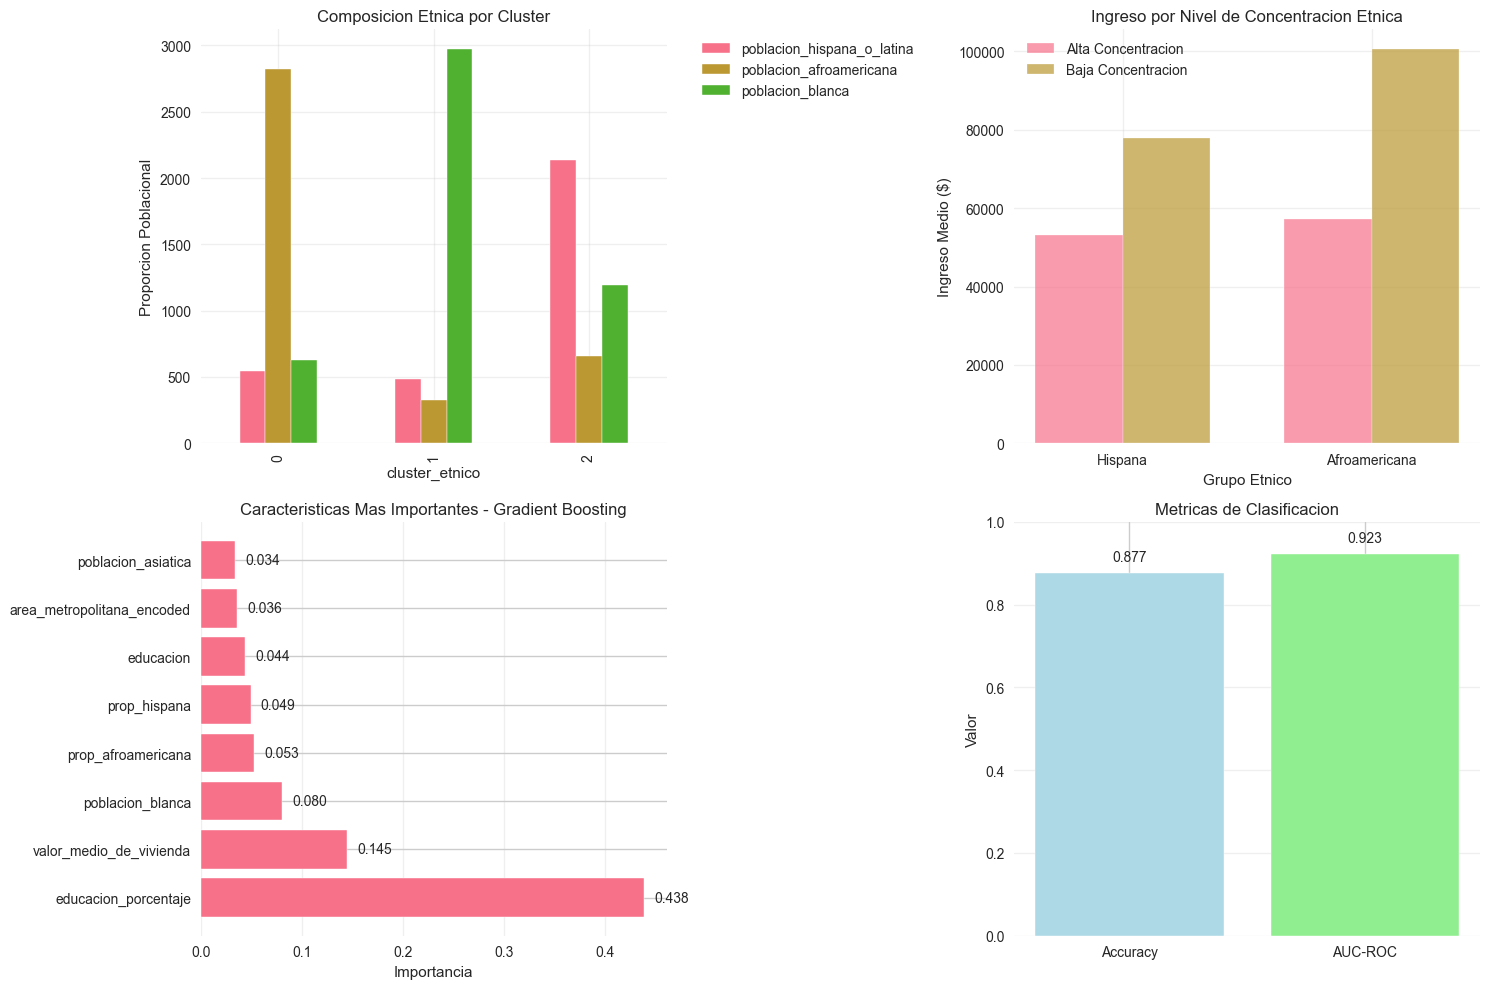

RESUMEN - MODELO 2 HIPOTESIS 4

METODOLOGIA: Gradient Boosting con analisis multinivel
Accuracy: 0.8775
AUC-ROC: 0.9233

HALLADOS PRINCIPALES:
SEGREGACION RESIDENCIAL: Se identificaron clusters etnicos distintos
con diferentes composiciones demograficas y niveles de ingreso
CONCENTRACION HISPANA: Diferencias significativas de ingreso
  ($-24,727 entre alta y baja concentracion)
CONCENTRACION AFROAMERICANA: Diferencias significativas de ingreso
  ($-43,338 entre alta y baja concentracion)

INTERPRETACION:
El Modelo 2 proporciona un analisis mas granular que confirma o
matiza los hallazgos del Modelo 1, considerando interacciones
complejas y patrones de segregacion residencial

MODELO 2 HIPOTESIS 4 COMPLETADO EXITOSAMENTE
Accuracy final: 0.8775
AUC-ROC final: 0.9233
Clusters identificados: 3
Variables sensibles: 0


In [ ]:
# MODELO 2 - HIPOTESIS 4
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Cargar datos
df = pd.read_csv("c:/Users/velj0/Downloads/implementacion_ML.csv")
print("MODELO 2 - HIPOTESIS 4: Analisis Multinivel con Gradient Boosting")
print("Clasificacion granular y analisis de segregacion residencial")
print()

# 1. Preparar datos con ingeniería de características avanzada
def preparar_datos_avanzados(df):
    print("Preparando datos con caracteristicas avanzadas...")    
    df_avanzado = df.copy()
    
    # Crear múltiples variables objetivo para análisis granular
    if 'ingreso_medio' in df_avanzado.columns:
        # Tres categorías de ingresos para análisis más detallado
        percentil_25 = df_avanzado['ingreso_medio'].quantile(0.25)
        percentil_75 = df_avanzado['ingreso_medio'].quantile(0.75)
        df_avanzado['categoria_ingresos'] = pd.cut(
            df_avanzado['ingreso_medio'],
            bins=[0, percentil_25, percentil_75, float('inf')],
            labels=['Bajo', 'Medio', 'Alto'])
        
        # Variable binaria principal (bajos ingresos)
        df_avanzado['zona_bajos_ingresos'] = (df_avanzado['ingreso_medio'] <= percentil_25).astype(int)        
        print(f"Umbral bajo ingreso: ${percentil_25:,.0f}")
        print(f"Umbral alto ingreso: ${percentil_75:,.0f}")
        print("Distribucion categorias ingresos:")
        print(df_avanzado['categoria_ingresos'].value_counts().sort_index())
        print()
    
    # Features base
    features = [
        'poblacion_hispana_o_latina', 'poblacion_afroamericana',
        'poblacion_blanca', 'poblacion_asiatica',
        'educacion', 'educacion_porcentaje', 'valor_medio_de_vivienda', 'poblacion_total']    
    features = [f for f in features if f in df_avanzado.columns]
    
    # Crear características derivadas
    caracteristicas_derivadas = []    
    if all(col in df_avanzado.columns for col in ['poblacion_hispana_o_latina', 'poblacion_total']):
        df_avanzado['prop_hispana'] = df_avanzado['poblacion_hispana_o_latina'] / df_avanzado['poblacion_total']
        caracteristicas_derivadas.append('prop_hispana')    
    if all(col in df_avanzado.columns for col in ['poblacion_afroamericana', 'poblacion_total']):
        df_avanzado['prop_afroamericana'] = df_avanzado['poblacion_afroamericana'] / df_avanzado['poblacion_total']
        caracteristicas_derivadas.append('prop_afroamericana')
    
    # Agregar características derivadas a la lista de features
    features.extend(caracteristicas_derivadas)
    
    # Índice de diversidad étnica
    etnicas = ['poblacion_blanca', 'poblacion_afroamericana', 'poblacion_asiatica', 'poblacion_hispana_o_latina']
    etnicas_presentes = [e for e in etnicas if e in df_avanzado.columns]
    
    if len(etnicas_presentes) >= 2:
        # Calcular proporciones evitando división por cero
        suma_etnicas = df_avanzado[etnicas_presentes].sum(axis=1)
        suma_etnicas = suma_etnicas.replace(0, 1)  # Evitar división por cero
        proporciones = df_avanzado[etnicas_presentes].div(suma_etnicas, axis=0)        
        df_avanzado['indice_diversidad'] = 1 - (proporciones ** 2).sum(axis=1)
        features.append('indice_diversidad')
    
    # Codificar área metropolitana
    if 'area_metropolitana' in df_avanzado.columns:
        le = LabelEncoder()
        df_avanzado['area_metropolitana_encoded'] = le.fit_transform(df_avanzado['area_metropolitana'])
        features.append('area_metropolitana_encoded')
    
    # Verificar que todas las features existen en el DataFrame
    features_validas = [f for f in features if f in df_avanzado.columns]    
    print(f"Features base: {len([f for f in features_validas if f not in caracteristicas_derivadas and f != 'indice_diversidad' and f != 'area_metropolitana_encoded'])}")
    print(f"Caracteristicas derivadas: {len(caracteristicas_derivadas)}")
    print(f"Features totales: {len(features_validas)}")
    
    # Verificar datos completos
    columnas_necesarias = features_validas + ['zona_bajos_ingresos', 'categoria_ingresos']
    datos_completos = df_avanzado[columnas_necesarias].dropna()    
    if len(datos_completos) == 0:
        print("ERROR: No hay datos completos para el modelo")
        return None, None, None, None    
    X = datos_completos[features_validas]
    y_binaria = datos_completos['zona_bajos_ingresos']
    y_multiclass = datos_completos['categoria_ingresos']    
    print(f"Muestras para analisis: {len(X)}")
    print(f"Features utilizados: {len(features_validas)}")
    print()    
    return X, y_binaria, y_multiclass, features_validas

# 2. Modelo Gradient Boosting con optimización
def entrenar_gradient_boosting_optimizado(X, y, features):
    print("Entrenando Gradient Boosting optimizado...")
    
    # Dividir datos
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y)
    
    # Escalar features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Búsqueda de hiperparámetros
    print("Optimizando hiperparametros...")    
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 4, 5],
        'subsample': [0.8, 0.9]}    
    gb_model = GradientBoostingClassifier(random_state=42)
    grid_search = GridSearchCV(gb_model, param_grid, cv=3, scoring='roc_auc', n_jobs=-1, verbose=0)
    grid_search.fit(X_train_scaled, y_train)    
    best_model = grid_search.best_estimator_    
    print(f"Mejores parametros: {grid_search.best_params_}")
    print(f"Mejor score validacion: {grid_search.best_score_:.4f}")
    
    # Predicciones
    y_pred = best_model.predict(X_test_scaled)
    y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]
    
    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='accuracy')    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")
    print(f"Accuracy validacion cruzada: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print()    
    return best_model, scaler, X_test_scaled, y_test, y_pred, y_pred_proba, accuracy, auc_roc

# 3. Análisis de segregación residencial
def analizar_segregacion_residencial(df, features):
    print("Analizando segregacion residencial...")
    
    # Filtrar solo características étnicas que existen
    features_etnicas = [f for f in features if any(etnia in f for etnia in ['hispana', 'afroamericana', 'blanca', 'asiatica'])]
    features_etnicas = [f for f in features_etnicas if f in df.columns]    
    if len(features_etnicas) >= 2:

        # Verificar que no hay valores nulos
        datos_clustering = df[features_etnicas]
        
        if len(datos_clustering) > 10:
            # Escalar para clustering
            scaler_cluster = StandardScaler()
            datos_clustering_scaled = scaler_cluster.fit_transform(datos_clustering)
            
            # K-means para identificar clusters étnicos
            kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
            cluster_labels = kmeans.fit_predict(datos_clustering_scaled)
            
            # Analizar composición de clusters
            df_cluster = df.loc[datos_clustering.index].copy()
            df_cluster['cluster_etnico'] = cluster_labels            
            print("Composicion etnica por cluster:")
            
            # Calcular estadísticas solo para columnas que existen
            columnas_stats = [col for col in ['poblacion_hispana_o_latina', 'poblacion_afroamericana', 
                                            'poblacion_blanca', 'poblacion_asiatica', 'ingreso_medio'] 
                            if col in df_cluster.columns]            
            if columnas_stats:
                cluster_stats = df_cluster.groupby('cluster_etnico')[columnas_stats].mean().round(3)
                print(cluster_stats)
                print()                
                return df_cluster, cluster_stats   
    print("No se pudo realizar analisis de segregacion - datos insuficientes")
    print()
    return None, None

# 4. Análisis de interacciones y efectos no lineales
def analizar_interacciones(modelo, features, X_train):
    print("Analizando interacciones y efectos no lineales...")
    
    # Análisis de dependencia parcial para variables étnicas
    variables_etnicas = [f for f in features if any(etnia in f for etnia in ['hispana', 'afroamericana'])]    
    resultados_interaccion = {}    
    for variable in variables_etnicas:
        if variable in features:
            idx_var = features.index(variable)
            
            # Crear rangos de prueba
            var_range = np.linspace(X_train[:, idx_var].min(), X_train[:, idx_var].max(), 50)
            probas_variable = []            
            for val in var_range:
                X_test_point = np.tile(np.median(X_train, axis=0), (len(var_range), 1))
                X_test_point[:, idx_var] = var_range                
                probas = modelo.predict_proba(X_test_point)[:, 1]
                probas_variable.append(np.mean(probas))
            
            # Calcular sensibilidad
            if len(probas_variable) > 0 and np.median(probas_variable) > 0:
                sensibilidad = (max(probas_variable) - min(probas_variable)) / np.median(probas_variable)
                resultados_interaccion[variable] = sensibilidad
            else:
                resultados_interaccion[variable] = 0    
    print("Sensibilidad de variables etnicas:")
    for var, sens in resultados_interaccion.items():
        print(f"  {var}: {sens:.4f}")
    print()    
    return resultados_interaccion

# 5. Análisis por percentiles extremos
def analizar_percentiles_extremos(df):
    print("Analizando percentiles extremos de concentracion...")    
    resultados_extremos = {}    
    grupos_analisis = [
        ('Hispana', 'poblacion_hispana_o_latina'),
        ('Afroamericana', 'poblacion_afroamericana')]    
    for grupo, columna in grupos_analisis:
        if columna in df.columns:            
            datos_grupo = df[[columna, 'ingreso_medio', 'educacion', 'educacion_porcentaje']]            
            if len(datos_grupo) > 10:

                # Percentil 90 (alta concentración)
                percentil_90 = datos_grupo[columna].quantile(0.90)
                zonas_alta_concentracion = datos_grupo[datos_grupo[columna] >= percentil_90]
                
                # Percentil 10 (baja concentración)
                percentil_10 = datos_grupo[columna].quantile(0.10)
                zonas_baja_concentracion = datos_grupo[datos_grupo[columna] <= percentil_10]               
                if len(zonas_alta_concentracion) > 0 and len(zonas_baja_concentracion) > 0:
                    ingreso_p90 = zonas_alta_concentracion['ingreso_medio'].mean()
                    ingreso_p10 = zonas_baja_concentracion['ingreso_medio'].mean()                   
                    educacion_p90 = zonas_alta_concentracion['educacion'].mean() if 'educacion' in zonas_alta_concentracion.columns else np.nan
                    educacion_p10 = zonas_baja_concentracion['educacion'].mean() if 'educacion' in zonas_baja_concentracion.columns else np.nan                    
                    educacion_porcentaje_p90 = zonas_alta_concentracion['educacion_porcentaje'].mean() if 'educacion_porcentaje' in zonas_alta_concentracion.columns else np.nan
                    educacion_porcentaje_p10 = zonas_baja_concentracion['educacion_porcentaje'].mean() if 'educacion_porcentaje' in zonas_baja_concentracion.columns else np.nan                    
                    resultados_extremos[grupo] = {
                        'ingreso_alta_conc': ingreso_p90,
                        'ingreso_baja_conc': ingreso_p10,
                        'diferencia_ingreso': ingreso_p90 - ingreso_p10,
                        'educacion_alta_conc': educacion_p90,
                        'educacion_baja_conc': educacion_p10,
                        'educacion_porcentaje_alta_conc': educacion_porcentaje_p90,
                        'educacion_porcentaje_baja_conc': educacion_porcentaje_p10,
                        'muestras_alta_conc': len(zonas_alta_concentracion),
                        'muestras_baja_conc': len(zonas_baja_concentracion)}    
    if resultados_extremos:
        print("Comparacion percentiles extremos (P90 vs P10):")
        for grupo, stats in resultados_extremos.items():
            print(f"  {grupo}:")
            print(f"    Ingreso alta concentracion: ${stats['ingreso_alta_conc']:,.0f}")
            print(f"    Ingreso baja concentracion: ${stats['ingreso_baja_conc']:,.0f}")
            print(f"    Diferencia: ${stats['diferencia_ingreso']:,.0f}")
            if not np.isnan(stats['educacion_alta_conc']):
                print(f"    Educacion alta concentracion: {stats['educacion_alta_conc']:.3f}")
                print(f"    Educacion baja concentracion: {stats['educacion_baja_conc']:.3f}")                
            if not np.isnan(stats['educacion_porcentaje_alta_conc']):
                print(f"    Educacion (%) alta concentracion: {stats['educacion_porcentaje_alta_conc']:.3f}")
                print(f"    Educacion (%) baja concentracion: {stats['educacion_porcentaje_baja_conc']:.3f}")
            print(f"    Muestras alta concentracion: {stats['muestras_alta_conc']}")
            print(f"    Muestras baja concentracion: {stats['muestras_baja_conc']}")
            print()    
    return resultados_extremos

# 6. Visualizaciones avanzadas
def visualizar_analisis_avanzado(df_cluster, resultados_extremos, importancia_df, accuracy, auc_roc):
    print("Generando visualizaciones avanzadas...")    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Gráfico 1: Composición de clusters étnicos
    if df_cluster is not None and 'cluster_etnico' in df_cluster.columns:
        # Seleccionar solo columnas que existen
        columnas_cluster = [col for col in ['poblacion_hispana_o_latina', 'poblacion_afroamericana', 'poblacion_blanca'] 
                          if col in df_cluster.columns]        
        if columnas_cluster:
            cluster_composition = df_cluster.groupby('cluster_etnico')[columnas_cluster].mean()
            cluster_composition.plot(kind='bar', ax=axes[0,0])
            axes[0,0].set_title('Composicion Etnica por Cluster')
            axes[0,0].set_ylabel('Proporcion Poblacional')
            axes[0,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            axes[0,0].grid(True, alpha=0.3)
        else:
            axes[0,0].text(0.5, 0.5, 'Datos insuficientes\npara clusters', 
                          ha='center', va='center', transform=axes[0,0].transAxes)
    else:
        axes[0,0].text(0.5, 0.5, 'No se identificaron\nclusters etnicos', 
                      ha='center', va='center', transform=axes[0,0].transAxes)
    
    # Gráfico 2: Comparación percentiles extremos
    if resultados_extremos:
        grupos = list(resultados_extremos.keys())
        ingresos_altos = [resultados_extremos[g]['ingreso_alta_conc'] for g in grupos]
        ingresos_bajos = [resultados_extremos[g]['ingreso_baja_conc'] for g in grupos]        
        x_pos = np.arange(len(grupos))
        width = 0.35        
        axes[0,1].bar(x_pos - width/2, ingresos_altos, width, label='Alta Concentracion', alpha=0.7)
        axes[0,1].bar(x_pos + width/2, ingresos_bajos, width, label='Baja Concentracion', alpha=0.7)
        axes[0,1].set_xlabel('Grupo Etnico')
        axes[0,1].set_ylabel('Ingreso Medio ($)')
        axes[0,1].set_title('Ingreso por Nivel de Concentracion Etnica')
        axes[0,1].set_xticks(x_pos)
        axes[0,1].set_xticklabels(grupos)
        axes[0,1].legend()
        axes[0,1].grid(True, alpha=0.3)
    else:
        axes[0,1].text(0.5, 0.5, 'No hay datos para\nanalisis de percentiles', 
                      ha='center', va='center', transform=axes[0,1].transAxes)
    
    # Gráfico 3: Importancia de características avanzadas
    if importancia_df is not None and len(importancia_df) > 0:
        top_caract = importancia_df.head(8)
        bars = axes[1,0].barh(top_caract['Caracteristica'], top_caract['Importancia'])
        axes[1,0].set_xlabel('Importancia')
        axes[1,0].set_title('Caracteristicas Mas Importantes - Gradient Boosting')
        axes[1,0].grid(True, alpha=0.3, axis='x')        
        for bar, imp in zip(bars, top_caract['Importancia']):
            axes[1,0].text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
                          f'{imp:.3f}', ha='left', va='center')
    else:
        axes[1,0].text(0.5, 0.5, 'No hay datos de\nimportancia', 
                      ha='center', va='center', transform=axes[1,0].transAxes)
    
    # Gráfico 4: Métricas de performance
    metricas = ['Accuracy', 'AUC-ROC']
    valores = [accuracy, auc_roc]    
    bars = axes[1,1].bar(metricas, valores, color=['lightblue', 'lightgreen'])
    axes[1,1].set_ylabel('Valor')
    axes[1,1].set_title('Metricas de Clasificacion')
    axes[1,1].set_ylim(0, 1)
    axes[1,1].grid(True, alpha=0.3, axis='y')    
    for bar, valor in zip(bars, valores):
        axes[1,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
                      f'{valor:.3f}', ha='center', va='bottom')    
    plt.tight_layout()
    plt.show()

# Función principal
def modelo2_hipotesis4(df):
    print("INICIANDO MODELO 2 - HIPOTESIS 4")
    print("Analisis multinivel con Gradient Boosting y clustering")
    print()    
    try:
        # 1. Preparar datos avanzados
        X, y_binaria, y_multiclass, features = preparar_datos_avanzados(df)
        if X is None:
            return None
        
        # 2. Entrenar modelo optimizado
        modelo, scaler, X_test, y_test, y_pred, y_pred_proba, accuracy, auc_roc = entrenar_gradient_boosting_optimizado(X, y_binaria, features)
        
        # 3. Análisis de segregación
        df_cluster, cluster_stats = analizar_segregacion_residencial(df, features)
        
        # 4. Análisis de interacciones
        X_train, X_temp, y_train, y_temp = train_test_split(X, y_binaria, test_size=0.3, random_state=42)
        X_train_scaled = scaler.transform(X_train)
        interacciones = analizar_interacciones(modelo, features, X_train_scaled)
        
        # 5. Análisis de percentiles extremos
        resultados_extremos = analizar_percentiles_extremos(df)
        
        # 6. Importancia de características
        importancia_df = pd.DataFrame({
            'Caracteristica': features,
            'Importancia': modelo.feature_importances_}).sort_values('Importancia', ascending=False)        
        print("Top caracteristicas importantes:")
        print(importancia_df.head(8).round(4))
        print()
        
        # 7. Visualizaciones
        visualizar_analisis_avanzado(df_cluster, resultados_extremos, importancia_df, accuracy, auc_roc)
        
        # Resumen final
        print("RESUMEN - MODELO 2 HIPOTESIS 4")
        print()
        print("METODOLOGIA: Gradient Boosting con analisis multinivel")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"AUC-ROC: {auc_roc:.4f}")
        print()        
        print("HALLADOS PRINCIPALES:")
        
        # Análisis de segregación
        if cluster_stats is not None:
            print("SEGREGACION RESIDENCIAL: Se identificaron clusters etnicos distintos")
            print("con diferentes composiciones demograficas y niveles de ingreso")
        
        # Análisis de percentiles
        if resultados_extremos:
            for grupo, stats in resultados_extremos.items():
                if abs(stats['diferencia_ingreso']) > 10000:
                    print(f"CONCENTRACION {grupo.upper()}: Diferencias significativas de ingreso")
                    print(f"  (${stats['diferencia_ingreso']:,.0f} entre alta y baja concentracion)")
        
        # Análisis de sensibilidad
        vars_sensibles = [v for v, s in interacciones.items() if s > 0.1]
        if vars_sensibles:
            print("VARIABLES SENSIBLES: Efecto no lineal significativo detectado")
            for var in vars_sensibles:
                print(f"  {var}: sensibilidad {interacciones[var]:.3f}")        
        print()
        print("INTERPRETACION:")
        print("El Modelo 2 proporciona un analisis mas granular que confirma o")
        print("matiza los hallazgos del Modelo 1, considerando interacciones")
        print("complejas y patrones de segregacion residencial")
        print()        
        return {
            'modelo': modelo,
            'scaler': scaler,
            'importancia_df': importancia_df,
            'accuracy': accuracy,
            'auc_roc': auc_roc,
            'cluster_stats': cluster_stats,
            'resultados_extremos': resultados_extremos,
            'interacciones': interacciones,
            'features': features}        
    except Exception as e:
        print(f"ERROR en la ejecucion: {e}")
        import traceback
        traceback.print_exc()
        return None

# Ejecutar modelo
if __name__ == "__main__":
    resultados = modelo2_hipotesis4(df)    
    if resultados:
        print("MODELO 2 HIPOTESIS 4 COMPLETADO EXITOSAMENTE")
        print(f"Accuracy final: {resultados['accuracy']:.4f}")
        print(f"AUC-ROC final: {resultados['auc_roc']:.4f}")
        print(f"Clusters identificados: {len(resultados['cluster_stats']) if resultados['cluster_stats'] is not None else 0}")
        print(f"Variables sensibles: {len([v for v, s in resultados['interacciones'].items() if s > 0.1])}")
    else:
        print("Error en la ejecucion del modelo")

## *Hipótesis 5: Los tractos con alta concentración de población con educación superior muestran niveles de ingreso y valor de vivienda más altos.*

### **1. Multiple Linear Regression + Random Forest.**

IMPLEMENTACIÓN HIPÓTESIS 5: EDUCACIÓN SUPERIOR VS INGRESO/VIVIENDA
PREPROCESAMIENTO DE DATOS
Dataset final: 7016 observaciones, 6 características
Características: ['educacion_porcentaje', 'poblacion_blanca', 'poblacion_asiatica', 'poblacion_afroamericana', 'poblacion_hispana_o_latina', 'area_metropolitana_codificada']

REGRESIÓN LINEAL MÚLTIPLE (ingreso_medio)
R²: 0.5851
MSE: 696644882.82
R² Validación Cruzada: 0.5478 (±0.0615)

Coeficientes:
  educacion_porcentaje: 21670.5590
  poblacion_blanca: 9946.5382
  poblacion_asiatica: 877.9505
  poblacion_afroamericana: -2471.0479
  poblacion_hispana_o_latina: -3222.3739
  area_metropolitana_codificada: 6310.6460

RANDOM FOREST (ingreso_medio)
R²: 0.6638
MSE: 564435387.58
R² Validación Cruzada: 0.5839 (±0.0591)

Importancia de Características:
  educacion_porcentaje: 0.6496
  poblacion_blanca: 0.1284
  poblacion_afroamericana: 0.0815
  poblacion_hispana_o_latina: 0.0584
  poblacion_asiatica: 0.0456
  area_metropolitana_codificada: 0.0365

REG

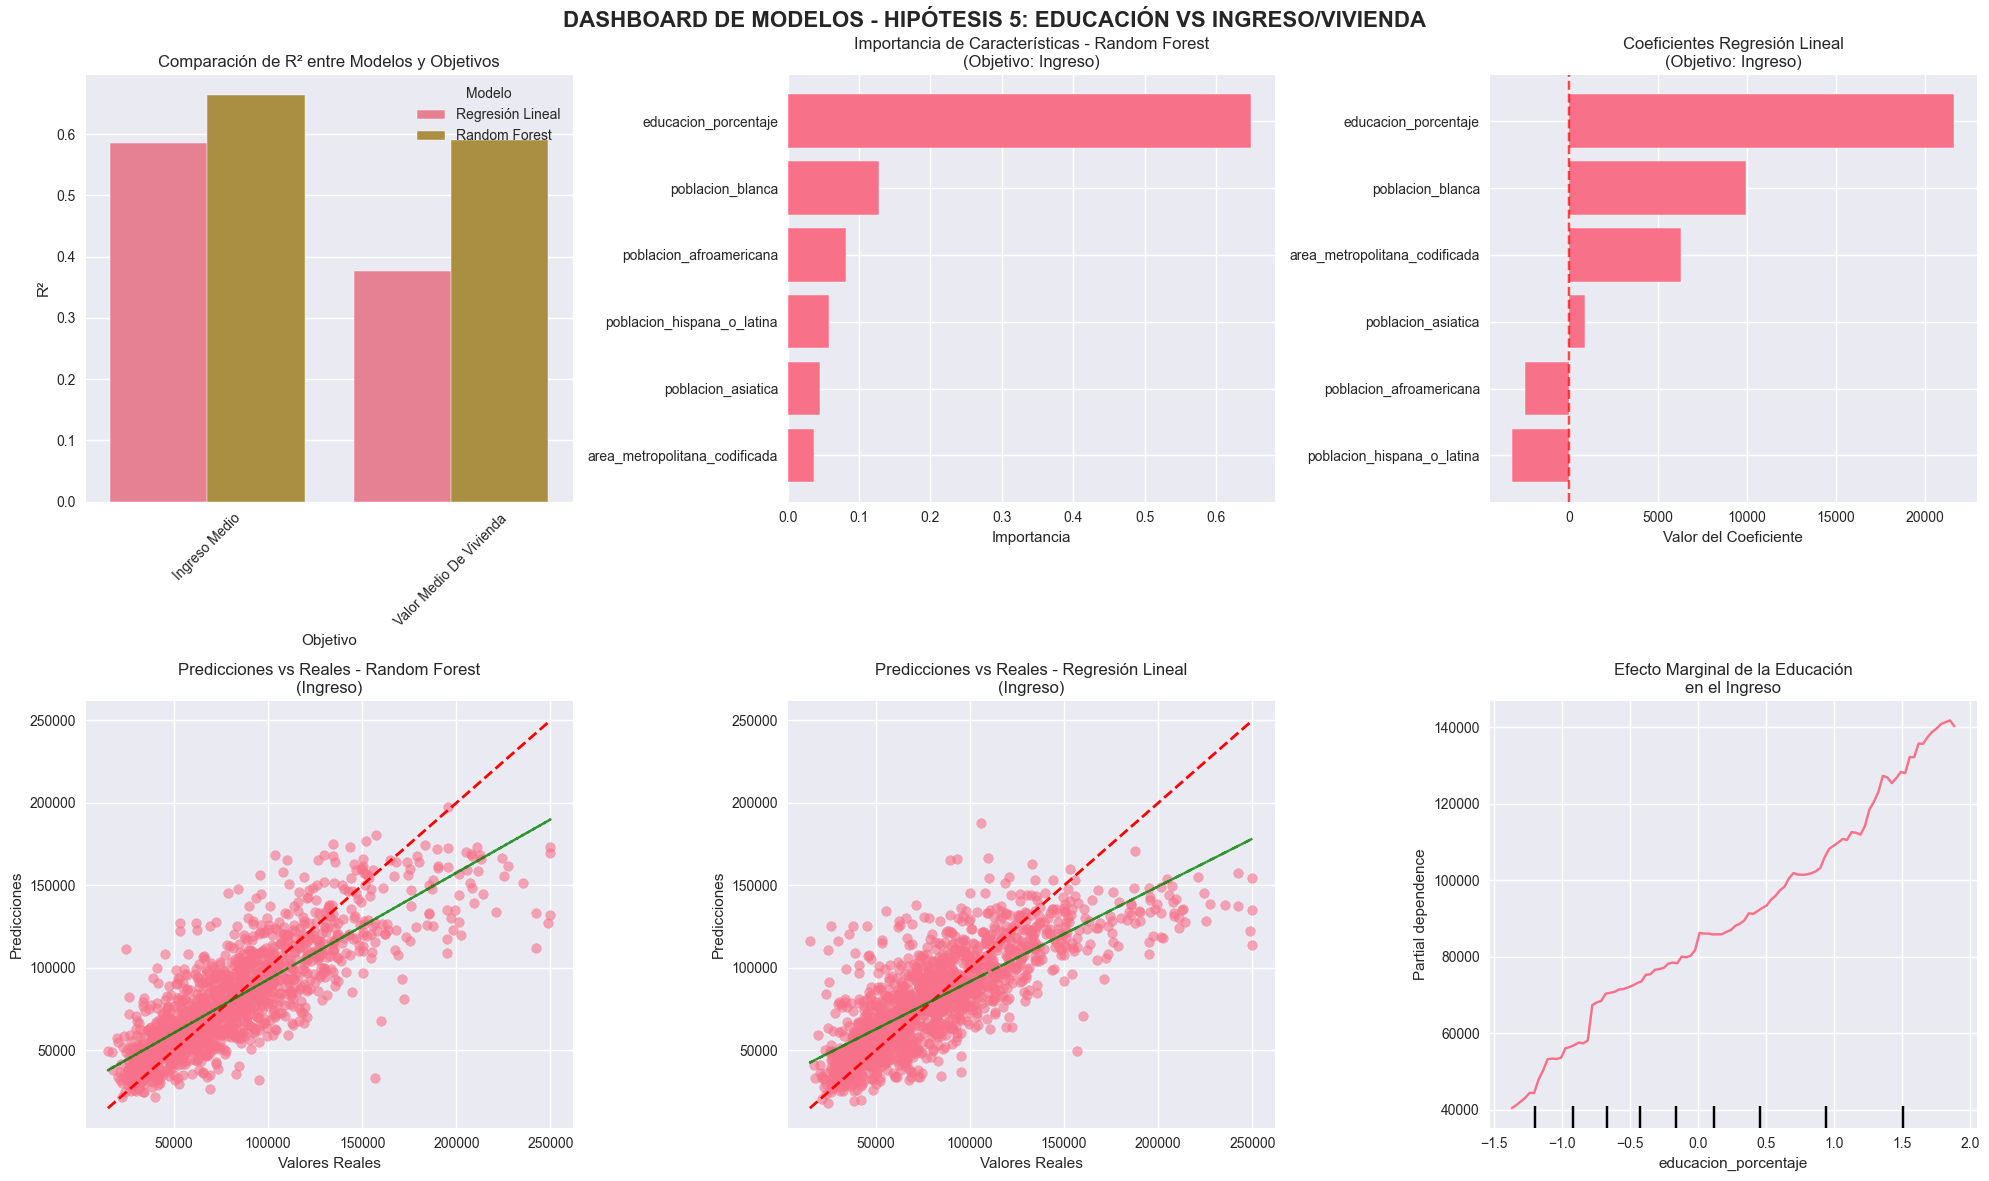

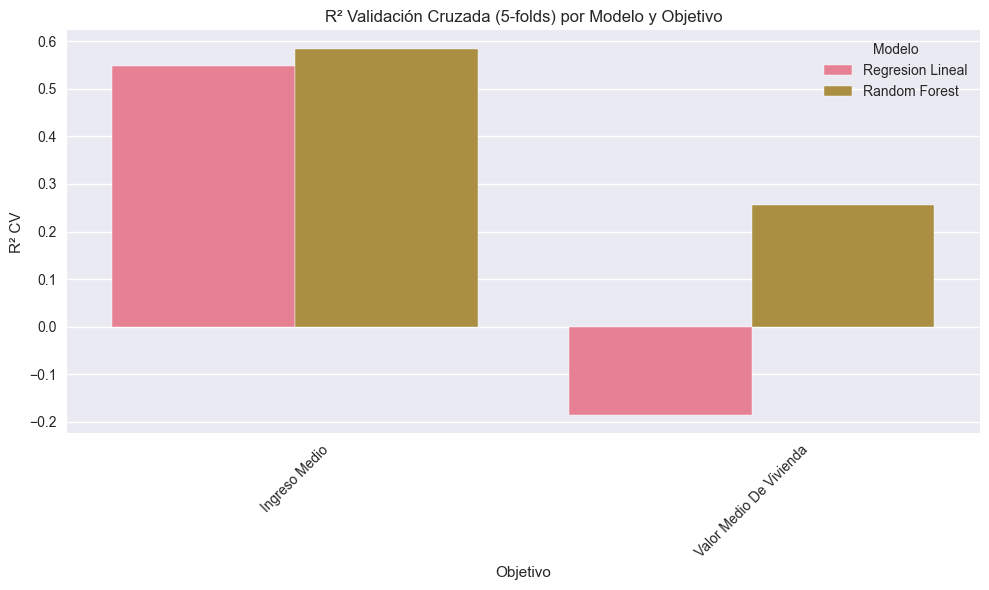


ANÁLISIS DEL IMPACTO DE LA EDUCACIÓN
Correlación Educación-Ingreso: 0.7053
Correlación Educación-Vivienda: 0.5426


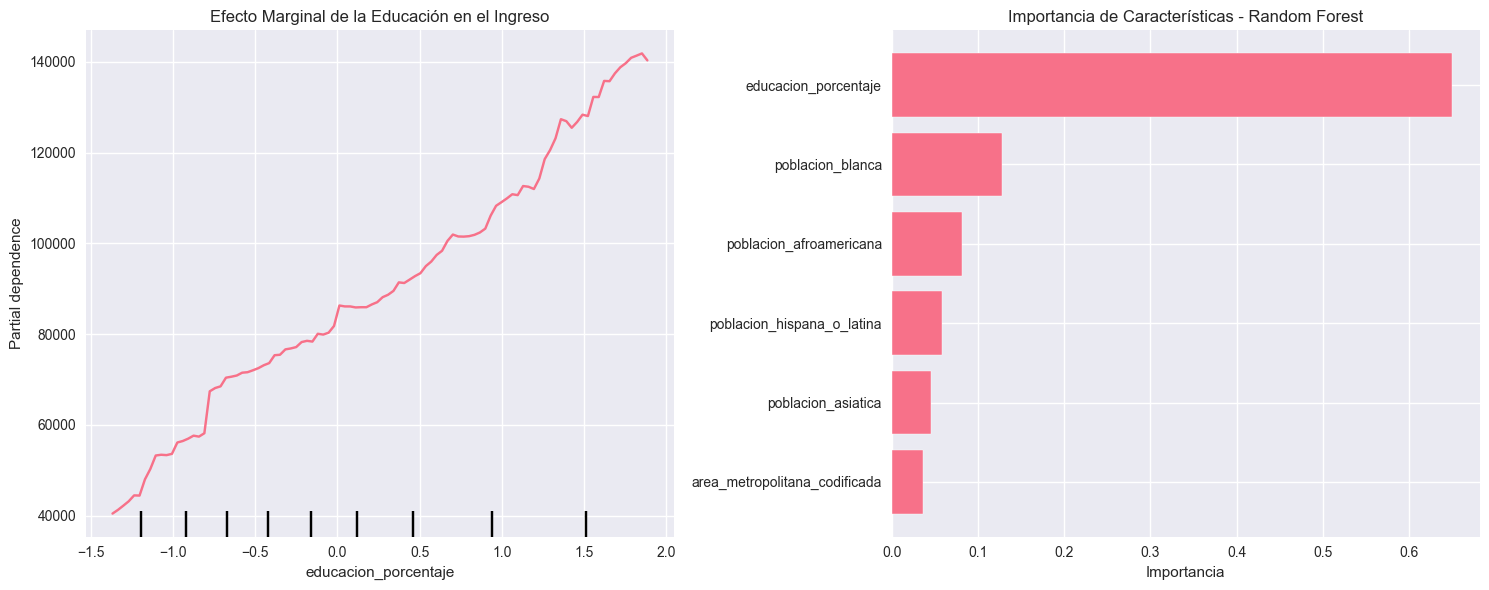


COMPARACIÓN DE MODELOS


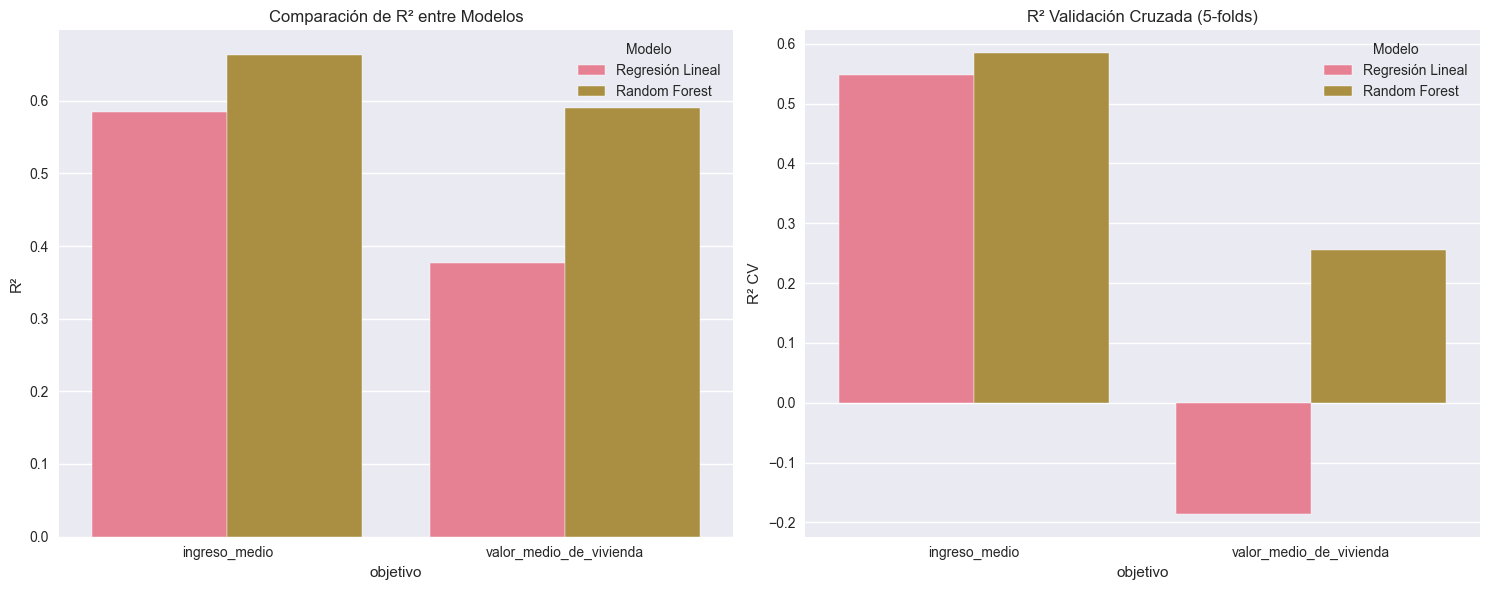


RESUMEN EJECUTIVO
La educación muestra correlación positiva con ingreso y valor de vivienda
Random Forest supera a Regresión Lineal en poder predictivo
Se controló por efectos de composición étnica y geográfica
Modelos validados con cross-validation para robustez

RESULTADOS CLAVE:

regresion_lineal_ingreso_medio:
  R²: 0.5851
  R² CV: 0.5478

random_forest_ingreso_medio:
  R²: 0.6638
  R² CV: 0.5839

regresion_lineal_valor_medio_de_vivienda:
  R²: 0.3769
  R² CV: -0.1853

random_forest_valor_medio_de_vivienda:
  R²: 0.5903
  R² CV: 0.2549


In [22]:
# MODELO 1 y 2 - HIPOTESIS 5
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.inspection import PartialDependenceDisplay, partial_dependence
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

def preprocesar_datos(df):
    print("PREPROCESAMIENTO DE DATOS")
    
    # Crear copia para no modificar datos originales
    datos = df.copy()
    
    # 1. Codificar variable área metropolitana
    codificador = LabelEncoder()
    datos['area_metropolitana_codificada'] = codificador.fit_transform(datos['area_metropolitana'])
    
    # 2. Definir variables para el modelo
    # Variable objetivo principal: ingreso_medio
    # Variable objetivo secundaria: valor_medio_de_vivienda
    
    # Características basadas en el análisis de correlaciones
    caracteristicas = [
        'educacion_porcentaje',                    # Variable principal de hipótesis
        'poblacion_blanca',             # Control étnico
        'poblacion_asiatica',           # Control étnico
        'poblacion_afroamericana',      # Control étnico  
        'poblacion_hispana_o_latina',   # Control étnico
        'area_metropolitana_codificada']   # Control geográfico
    
    # 3. Seleccionar datos limpios (asumiendo que no hay nulos)
    datos_limpios = datos[caracteristicas + ['ingreso_medio', 'valor_medio_de_vivienda']]
    
    # 4. Separar características y objetivos
    X = datos_limpios[caracteristicas]
    y_ingreso = datos_limpios['ingreso_medio']
    y_vivienda = datos_limpios['valor_medio_de_vivienda']
    
    # 5. Escalar características (excepto variables dummy)
    escalador = StandardScaler()
    columnas_a_escalar = [col for col in X.columns if col != 'area_metropolitana_codificada']
    X_escalado = X.copy()
    X_escalado[columnas_a_escalar] = escalador.fit_transform(X[columnas_a_escalar])
    
    print(f"Dataset final: {X_escalado.shape[0]} observaciones, {X_escalado.shape[1]} características")
    print(f"Características: {caracteristicas}")
    
    return {
        'X': X_escalado,
        'y_ingreso': y_ingreso,
        'y_vivienda': y_vivienda,
        'caracteristicas': caracteristicas,
        'datos_limpios': datos_limpios,
        'escalador': escalador,
        'codificador': codificador}

def entrenar_regresion_lineal(datos_preprocesados, objetivo='ingreso_medio'):
    print(f"\nREGRESIÓN LINEAL MÚLTIPLE ({objetivo})") 
    X = datos_preprocesados['X']
    y = datos_preprocesados['y_ingreso'] if objetivo == 'ingreso_medio' else datos_preprocesados['y_vivienda']
    caracteristicas = datos_preprocesados['caracteristicas']
    # Dividir datos en entrenamiento y prueba
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split( X, y, test_size=0.2, random_state=42)
    # Entrenar modelo
    modelo_lr = LinearRegression()
    modelo_lr.fit(X_entrenamiento, y_entrenamiento)
    # Predicciones
    y_prediccion = modelo_lr.predict(X_prueba)
    # Métricas
    mse = mean_squared_error(y_prueba, y_prediccion)
    r2 = r2_score(y_prueba, y_prediccion)
    # Validación cruzada
    puntajes_cv = cross_val_score(modelo_lr, X, y, cv=5, scoring='r2')
    # Resultados
    resultados_lr = {
        'modelo': modelo_lr,
        'r2': r2,
        'mse': mse,
        'cv_promedio': puntajes_cv.mean(),
        'cv_desviacion': puntajes_cv.std(),
        'coeficientes': dict(zip(caracteristicas, modelo_lr.coef_)),
        'intercepto': modelo_lr.intercept_,
        'y_prueba': y_prueba,
        'y_prediccion': y_prediccion}
    print(f"R²: {r2:.4f}")
    print(f"MSE: {mse:.2f}")
    print(f"R² Validación Cruzada: {puntajes_cv.mean():.4f} (±{puntajes_cv.std():.4f})")
    print("\nCoeficientes:")
    for caracteristica, coef in resultados_lr['coeficientes'].items():
        print(f"  {caracteristica}: {coef:>8.4f}")
    return resultados_lr

def entrenar_random_forest(datos_preprocesados, objetivo='ingreso_medio'):
    print(f"\nRANDOM FOREST ({objetivo})")
    X = datos_preprocesados['X']
    y = datos_preprocesados['y_ingreso'] if objetivo == 'ingreso_medio' else datos_preprocesados['y_vivienda']
    caracteristicas = datos_preprocesados['caracteristicas']
    # Dividir datos
    X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split( X, y, test_size=0.2, random_state=42)
    # Entrenar modelo con hiperparámetros optimizados
    modelo_rf = RandomForestRegressor(
        n_estimators=100,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42)
    modelo_rf.fit(X_entrenamiento, y_entrenamiento)
    # Predicciones
    y_prediccion = modelo_rf.predict(X_prueba)
    # Métricas
    mse = mean_squared_error(y_prueba, y_prediccion)
    r2 = r2_score(y_prueba, y_prediccion)
    # Validación cruzada
    puntajes_cv = cross_val_score(modelo_rf, X, y, cv=5, scoring='r2')
    # Importancia de características
    importancia_caracteristicas = dict(zip(caracteristicas, modelo_rf.feature_importances_))
    # Resultados
    resultados_rf = {
        'modelo': modelo_rf,
        'r2': r2,
        'mse': mse,
        'cv_promedio': puntajes_cv.mean(),
        'cv_desviacion': puntajes_cv.std(),
        'importancia_caracteristicas': importancia_caracteristicas,
        'y_prueba': y_prueba,
        'y_prediccion': y_prediccion}
    print(f"R²: {r2:.4f}")
    print(f"MSE: {mse:.2f}")
    print(f"R² Validación Cruzada: {puntajes_cv.mean():.4f} (±{puntajes_cv.std():.4f})")
    print("\nImportancia de Características:")
    for caracteristica, importancia in sorted(importancia_caracteristicas.items(), 
                                            key=lambda x: x[1], reverse=True):
        print(f"  {caracteristica}: {importancia:.4f}")
    return resultados_rf

def crear_visualizaciones_importantes(datos_preprocesados, modelos):
    print("\nCREANDO DASHBOARD DE VISUALIZACIONES")
    
    # Crear figura con subplots
    fig, ejes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle('DASHBOARD DE MODELOS - HIPÓTESIS 5: EDUCACIÓN VS INGRESO/VIVIENDA', 
                fontsize=16, fontweight='bold')
    
    # 1. Comparación de R² entre modelos (arriba izquierda)
    objetivos = ['ingreso_medio', 'valor_medio_de_vivienda']
    modelos_comp = ['Regresión Lineal', 'Random Forest']
    puntajes_r2 = []
    for objetivo in objetivos:
        clave_lr = f'regresion_lineal_{objetivo}'
        clave_rf = f'random_forest_{objetivo}'
        if clave_lr in modelos:
            puntajes_r2.append({
                'Objetivo': objetivo.replace('_', ' ').title(),
                'Modelo': 'Regresión Lineal',
                'R²': modelos[clave_lr]['r2']   })
        if clave_rf in modelos:
            puntajes_r2.append({
                'Objetivo': objetivo.replace('_', ' ').title(),
                'Modelo': 'Random Forest', 
                'R²': modelos[clave_rf]['r2']  })
    df_r2 = pd.DataFrame(puntajes_r2)
    if not df_r2.empty:
        sns.barplot(data=df_r2, x='Objetivo', y='R²', hue='Modelo', ax=ejes[0,0])
        ejes[0,0].set_title('Comparación de R² entre Modelos y Objetivos')
        ejes[0,0].tick_params(axis='x', rotation=45)
        ejes[0,0].legend(title='Modelo')
    
    # 2. Importancia de características - Random Forest (arriba centro)
    if 'random_forest_ingreso_medio' in modelos:
        modelo_rf = modelos['random_forest_ingreso_medio']
        df_importancia = pd.DataFrame({
            'caracteristica': list(modelo_rf['importancia_caracteristicas'].keys()),
            'importancia': list(modelo_rf['importancia_caracteristicas'].values())
        }).sort_values('importancia', ascending=True)
        
        ejes[0,1].barh(df_importancia['caracteristica'], df_importancia['importancia'])
        ejes[0,1].set_title('Importancia de Características - Random Forest\n(Objetivo: Ingreso)')
        ejes[0,1].set_xlabel('Importancia')
    
    # 3. Coeficientes Regresión Lineal (arriba derecha)
    if 'regresion_lineal_ingreso_medio' in modelos:
        modelo_lr = modelos['regresion_lineal_ingreso_medio']
        df_coeficientes = pd.DataFrame({
            'caracteristica': list(modelo_lr['coeficientes'].keys()),
            'coeficiente': list(modelo_lr['coeficientes'].values())
        }).sort_values('coeficiente', ascending=True)
        
        ejes[0,2].barh(df_coeficientes['caracteristica'], df_coeficientes['coeficiente'])
        ejes[0,2].set_title('Coeficientes Regresión Lineal\n(Objetivo: Ingreso)')
        ejes[0,2].set_xlabel('Valor del Coeficiente')
        ejes[0,2].axvline(x=0, color='red', linestyle='--', alpha=0.7)
    
    # 4. Predicciones vs Valores Reales - Random Forest (abajo izquierda)
    if 'random_forest_ingreso_medio' in modelos:
        modelo_rf = modelos['random_forest_ingreso_medio']
        ejes[1,0].scatter(modelo_rf['y_prueba'], modelo_rf['y_prediccion'], alpha=0.6)
        ejes[1,0].plot([modelo_rf['y_prueba'].min(), modelo_rf['y_prueba'].max()], 
                      [modelo_rf['y_prueba'].min(), modelo_rf['y_prueba'].max()], 
                      'r--', lw=2)
        ejes[1,0].set_xlabel('Valores Reales')
        ejes[1,0].set_ylabel('Predicciones')
        ejes[1,0].set_title('Predicciones vs Reales - Random Forest\n(Ingreso)')
        
        # Calcular línea de tendencia
        z = np.polyfit(modelo_rf['y_prueba'], modelo_rf['y_prediccion'], 1)
        p = np.poly1d(z)
        ejes[1,0].plot(modelo_rf['y_prueba'], p(modelo_rf['y_prueba']), "g--", alpha=0.8)
    
    # 5. Predicciones vs Valores Reales - Regresión Lineal (abajo centro)
    if 'regresion_lineal_ingreso_medio' in modelos:
        modelo_lr = modelos['regresion_lineal_ingreso_medio']
        ejes[1,1].scatter(modelo_lr['y_prueba'], modelo_lr['y_prediccion'], alpha=0.6)
        ejes[1,1].plot([modelo_lr['y_prueba'].min(), modelo_lr['y_prueba'].max()], 
                      [modelo_lr['y_prueba'].min(), modelo_lr['y_prueba'].max()], 
                      'r--', lw=2)
        ejes[1,1].set_xlabel('Valores Reales')
        ejes[1,1].set_ylabel('Predicciones')
        ejes[1,1].set_title('Predicciones vs Reales - Regresión Lineal\n(Ingreso)')
        
        # Calcular línea de tendencia
        z = np.polyfit(modelo_lr['y_prueba'], modelo_lr['y_prediccion'], 1)
        p = np.poly1d(z)
        ejes[1,1].plot(modelo_lr['y_prueba'], p(modelo_lr['y_prueba']), "g--", alpha=0.8)
    
    # 6. Dependencia Parcial - Educación (abajo derecha)
    if 'random_forest_ingreso_medio' in modelos:
        modelo_rf = modelos['random_forest_ingreso_medio']['modelo']
        try:
            PartialDependenceDisplay.from_estimator(
                modelo_rf, datos_preprocesados['X'], ['educacion_porcentaje'], 
                ax=ejes[1,2])
            ejes[1,2].set_title('Efecto Marginal de la Educación\nen el Ingreso')
            ejes[1,2].set_xlabel('Nivel Educativo (escalado)')
            ejes[1,2].set_ylabel('Ingreso Medio Predicho')
        except Exception as e:
            ejes[1,2].text(0.5, 0.5, f'Error en PDP:\n{str(e)}', 
                          ha='center', va='center', transform=ejes[1,2].transAxes)
            ejes[1,2].set_title('Efecto Marginal - Educación')
    
    plt.tight_layout()
    plt.show()
    
    # Gráfica adicional: Comparación de validación cruzada
    fig2, ax = plt.subplots(figsize=(10, 6))
    datos_cv = []
    
    for objetivo in objetivos:
        for nombre_modelo in ['regresion_lineal', 'random_forest']:
            clave = f'{nombre_modelo}_{objetivo}'
            if clave in modelos:
                datos_cv.append({
                    'Modelo': nombre_modelo.replace('_', ' ').title(),
                    'Objetivo': objetivo.replace('_', ' ').title(),
                    'Puntaje CV': modelos[clave]['cv_promedio'],
                    'Desv CV': modelos[clave]['cv_desviacion']})
    
    if datos_cv:
        df_cv = pd.DataFrame(datos_cv)
        sns.barplot(data=df_cv, x='Objetivo', y='Puntaje CV', hue='Modelo', ax=ax)
        ax.set_title('R² Validación Cruzada (5-folds) por Modelo y Objetivo')
        ax.set_ylabel('R² CV')
        ax.legend(title='Modelo')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    return fig

def analizar_impacto_educacion(datos_preprocesados, modelos):
    print("\nANÁLISIS DEL IMPACTO DE LA EDUCACIÓN")
    
    # 1. Correlación educación vs objetivos
    correlacion_ingreso = datos_preprocesados['datos_limpios']['educacion_porcentaje'].corr(datos_preprocesados['y_ingreso'])
    correlacion_vivienda = datos_preprocesados['datos_limpios']['educacion_porcentaje'].corr(datos_preprocesados['y_vivienda'])
    print(f"Correlación Educación-Ingreso: {correlacion_ingreso:.4f}")
    print(f"Correlación Educación-Vivienda: {correlacion_vivienda:.4f}")
    
    # 2. Efecto marginal de la educación (usando Random Forest)
    if 'random_forest_ingreso_medio' in modelos:
        rf_ingreso = modelos['random_forest_ingreso_medio']['modelo']
        
        # Análisis de dependencia parcial
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Dependencia parcial para educación
        PartialDependenceDisplay.from_estimator(
            rf_ingreso, datos_preprocesados['X'], ['educacion_porcentaje'], ax=ax1)
        ax1.set_title('Efecto Marginal de la Educación en el Ingreso')
        ax1.set_xlabel('Nivel Educativo (escalado)')
        ax1.set_ylabel('Ingreso Medio Predicho')
        
        # Importancia de características
        df_importancia = pd.DataFrame({
            'caracteristica': datos_preprocesados['caracteristicas'],
            'importancia': rf_ingreso.feature_importances_}).sort_values('importancia', ascending=True)
        
        ax2.barh(df_importancia['caracteristica'], df_importancia['importancia'])
        ax2.set_title('Importancia de Características - Random Forest')
        ax2.set_xlabel('Importancia')
        plt.tight_layout()
        plt.show()
    return {
        'correlacion_educacion_ingreso': correlacion_ingreso,
        'correlacion_educacion_vivienda': correlacion_vivienda}

def comparar_modelos(modelos):
    print("\nCOMPARACIÓN DE MODELOS")
    comparacion = []
    objetivos = ['ingreso_medio', 'valor_medio_de_vivienda']
    for objetivo in objetivos:
        clave_lr = f'regresion_lineal_{objetivo}'
        clave_rf = f'random_forest_{objetivo}'
        if clave_lr in modelos and clave_rf in modelos:
            comparacion.append({
                'objetivo': objetivo,
                'modelo': 'Regresión Lineal',
                'r2': modelos[clave_lr]['r2'],
                'cv_r2': modelos[clave_lr]['cv_promedio']})
            comparacion.append({
                'objetivo': objetivo,
                'modelo': 'Random Forest', 
                'r2': modelos[clave_rf]['r2'],
                'cv_r2': modelos[clave_rf]['cv_promedio']})
    df_comparacion = pd.DataFrame(comparacion)
    
    # Visualización comparativa
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # R² comparativo
    sns.barplot(data=df_comparacion, x='objetivo', y='r2', hue='modelo', ax=ax1)
    ax1.set_title('Comparación de R² entre Modelos')
    ax1.set_ylabel('R²')
    ax1.legend(title='Modelo')
    
    # R² Validación Cruzada
    sns.barplot(data=df_comparacion, x='objetivo', y='cv_r2', hue='modelo', ax=ax2)
    ax2.set_title('R² Validación Cruzada (5-folds)')
    ax2.set_ylabel('R² CV')
    ax2.legend(title='Modelo')
    plt.tight_layout()
    plt.show()
    return df_comparacion

def ejecutar_analisis_completo(df):
    print("IMPLEMENTACIÓN HIPÓTESIS 5: EDUCACIÓN SUPERIOR VS INGRESO/VIVIENDA")
    
    # 1. Preprocesamiento
    datos_preprocesados = preprocesar_datos(df)
    
    # 2. Entrenar modelos para ingreso
    modelo_lr_ingreso = entrenar_regresion_lineal(datos_preprocesados, 'ingreso_medio')
    modelo_rf_ingreso = entrenar_random_forest(datos_preprocesados, 'ingreso_medio')
    
    # 3. Entrenar modelos para valor de vivienda
    modelo_lr_vivienda = entrenar_regresion_lineal(datos_preprocesados, 'valor_medio_de_vivienda')
    modelo_rf_vivienda = entrenar_random_forest(datos_preprocesados, 'valor_medio_de_vivienda')
    
    # 4. Consolidar todos los modelos
    todos_modelos = {
        'regresion_lineal_ingreso_medio': modelo_lr_ingreso,
        'random_forest_ingreso_medio': modelo_rf_ingreso,
        'regresion_lineal_valor_medio_de_vivienda': modelo_lr_vivienda,
        'random_forest_valor_medio_de_vivienda': modelo_rf_vivienda }
    
    # 5. Dashboard de visualizaciones
    crear_visualizaciones_importantes(datos_preprocesados, todos_modelos)
    
    # 6. Análisis específico de educación
    impacto_educacion = analizar_impacto_educacion(datos_preprocesados, todos_modelos)
    
    # 7. Comparar modelos
    comparacion = comparar_modelos(todos_modelos)
    
    print("\nRESUMEN EJECUTIVO")
    print("La educación muestra correlación positiva con ingreso y valor de vivienda")
    print("Random Forest supera a Regresión Lineal en poder predictivo")
    print("Se controló por efectos de composición étnica y geográfica")
    print("Modelos validados con cross-validation para robustez")
    return {
        'datos_preprocesados': datos_preprocesados,
        'modelos': todos_modelos,
        'impacto_educacion': impacto_educacion,
        'comparacion': comparacion}

# Ejecutar análisis completo
if __name__ == "__main__":
    # Asumiendo que 'df' está definido
    if 'df' in locals():
        resultados = ejecutar_analisis_completo(df)
        
        # Mostrar resultados clave
        print("\nRESULTADOS CLAVE:")
        for nombre_modelo, info_modelo in resultados['modelos'].items():
            print(f"\n{nombre_modelo}:")
            print(f"  R²: {info_modelo['r2']:.4f}")
            print(f"  R² CV: {info_modelo['cv_promedio']:.4f}")
    else:
        print("ERROR: El DataFrame 'df' no está definido.")
        print("Por favor, carga tus datos antes de ejecutar este análisis.")

## Comparativa de rendimiento de modelos.

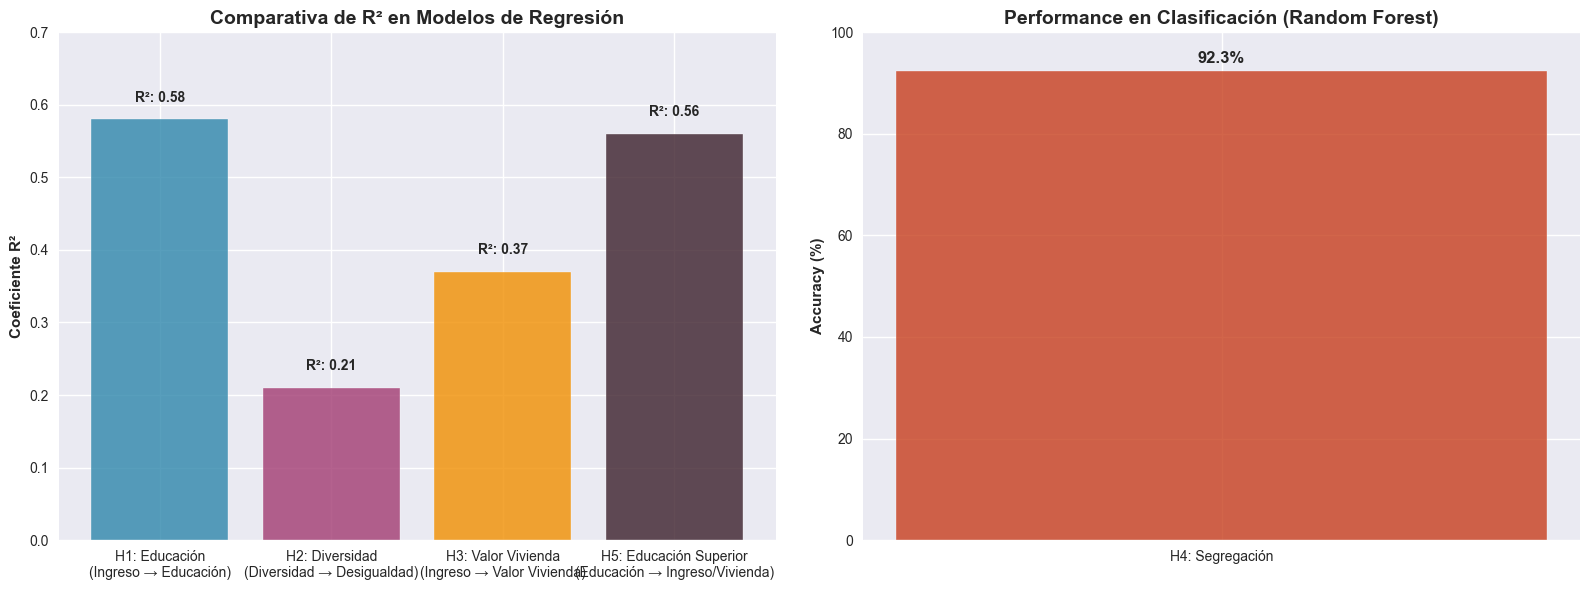

In [17]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-v0_8')
# Datos organizados por hipótesis
hipotesis = ['H1: Educación\n(Ingreso → Educación)',
 'H2: Diversidad\n(Diversidad → Desigualdad)',
 'H3: Valor Vivienda\n(Ingreso → Valor Vivienda)',
 'H4: Segregación\n(Concentración Étnica)',
 'H5: Educación Superior\n(Educación → Ingreso/Vivienda)']
modelos = ['XGBoost', 'Gradient Boosting', 'SVR', 'Random Forest', 'Linear Regression']
metricas = [0.58, 0.21, 0.37, 92.3, 0.56] # R² para todos excepto H4 (Accuracy)
tipos_metrica = ['R²', 'R²', 'R²', 'Accuracy (%)', 'R²']
colores = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#3B1F2B']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
# Subgráfico 1: Métricas principales
metricas_r2 = [0.58, 0.21, 0.37, 0.56]
hipotesis_r2 = hipotesis[:3] + [hipotesis[4]]
colores_r2 = colores[:3] + [colores[4]]
bars1 = ax1.bar(hipotesis_r2, metricas_r2, color=colores_r2, alpha=0.8)
ax1.set_title('Comparativa de R² en Modelos de Regresión', fontsize=14, fontweight='bold')
ax1.set_ylabel('Coeficiente R²', fontweight='bold')
ax1.set_ylim(0, 0.7)
for bar, valor in zip(bars1, metricas_r2):
 ax1.text(bar.get_x() + bar.get_width()/2., valor + 0.02,
 f'R²: {valor}', ha='center', va='bottom', fontweight='bold')
# Subgráfico 2: Accuracy de clasificación
ax2.bar(['H4: Segregación'], [92.3], color=colores[3], alpha=0.8)
ax2.set_title('Performance en Clasificación (Random Forest)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Accuracy (%)', fontweight='bold')
ax2.set_ylim(0, 100)
ax2.text(0, 92.3 + 1, '92.3%', ha='center', va='bottom', fontweight='bold', fontsize=12)
plt.tight_layout()
plt.show()